# A simple crib sheet for loading and plotting Arase satellite and ground-based observation data
(Last updated: March 9, 2025, Author: Kazuhiro Yamamoto)

This notebook demonstrates basic examples of loading and plotting the Arase satellite and ground-based data with PySPEDAS and PyTplot.
Please refer to the following website for the details of the data:

 - https://ergsc.isee.nagoya-u.ac.jp/data_info/erg.shtml.en

## Contents
[1. Get started](#1.-Get-started) <br>
 - [1.1. Installation of PySPEDAS](#1.1.-Installation-of-PySPEDAS) <br>
 - [1.2. Open this crib sheet](#1.2.-Open-this-crib-sheet) <br>
 - [1.3. Install PySPEDAS](#1.3.-Install-PySPEDAS)<br>
 - [1.4. Import modules of PySPEDAS](#1.4.-Import-modules-of-PySPEDAS)<br>

[2. Basic commands of PySPEDAS and PyTplot](#2.-Basic-commands-of-PySPEDAS-and-PyTplot)<br>
 - [2.1. Load and plot Arase data](#2.1.-Load-and-plot-Arase-data)<br>
 - [2.2. Settings for PyTplot](#2.2.-Settings-for-PyTplot)<br>
 - [2.3. Load and plot ground-based data](#2.3.-Load-and-plot-ground-based-data)<br>
 - [2.4. Data-load modules other than ERG/Arase](#2.4.-Data-load-modules-other-than-ERG/Arase)<br>
---<span style='color: red;'>RBSPs</span>, GOES, Dst, Kp, F10.7

[3. Analysis of the data contained in tplot variable](#3.-Analysis-of-the-data-contained-in-tplot-variable)<br>
 - [3.1. Retrieve an actual variable from tplot variable](#3.1.-Retrieve-an-actual-variable-from-tplot-variable)<br>
 - [3.2. Handle numpy.ndarray](#3.2.-Handle-numpy.ndarray)<br>
 - [3.3. Create a tplot variable](#3.3.-Create-a-tplot-variable)<br>
 - [3.4. Useful PySPEDAS tools](#3.4.-Useful-PySPEDAS-tools)<br>
---ERG Part-Products (particle), <span style='color: red;'>Tsyganenko 89 model</span>, <span style='color: red;'>Conversion to Field-Aligned coordinates</span>, <span style='color: red;'>Wave polarization</span><br>
 - [3.5. Plot with Matplotlib](#3.5.-Plot-with-Matplotlib)<br>

[4. Reproduction of figures of EMIC waves in Jun et al. (2025GRL, accepted)](#4.-Reproduction-of-figures-of-EMIC-waves-in-Jun-et-al.-(2025GRL,-accepted))<br>
 - [Exercise 1](#Exercise-1)<br>
 - [Exercise 2](#Exercise-2)<br>



---

## 1. Get started

### 1.1. Installation of PySPEDAS

This subsection briefly explains how to set up the Python virtual environment. You can skip this and go to [Section 1.3.](#1.3.-Install-PySPEDAS) if you are ready to install PySPEDAS. Note that PySPEDAS requires Python > 3.9. (See https://github.com/spedas/pyspedas/blob/master/pyproject.toml)

You can find another installation guide at https://github.com/ergsc-devel/arase_tutorial/blob/main/pyspedas_tranning_course_meterial_20240912.pptx

#### 1.1.1. Installation of Python
 - **Mac**<br>
     To check the version of `homebrew`:
     ~~~bash
     brew -v
     ~~~
     If `homebrew` is not installed, 
     ~~~bash
     /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"
     ~~~
     The following lines install Python and show the version:
     ~~~bash
     brew install python3
     python3 --version
     ~~~
     
 - **Linux, WSL2**<br>
     To check the version of Python, enter `python --version` in your terminal
     ~~~bash
     python --version
     ~~~
     If you have not yet installed Python (if the version of Python is not shown),
     ~~~bash
     sudo apt update -y
     sudo apt upgrade -y
     sudo apt install python3-pip
     ~~~

 - **Windows (Command Prompt)**<br>
     To check the version of Python, enter `python --version` in your command prompt:<br>

     ~~~bash
     python --version
     ~~~

     If you have not yet installed Python (if the version of Python is not shown),
     1. Visit https://pythonlinks.python.jp/ja/index.html.
     2. Download a Windows installer (python-3.12.9, for example) and execute it.
     3. Check the items of `Use admin privileges when installing py.exe` and `Add python.ext to PATH` and click `Install Now`.

#### 1.1.2. Upgrade of pip
Upgrade `pip` before installing something with `pip`. The latest version is pip-25.0.1. `pip` is a Python package management system that installs, updates, and uninstalls Python packages. `pip3` is the version for Python 3.

You can upgrade `pip` on a Mac/Linux/WSL terminal or Windows command prompt:

 - **Mac, Linux, WSL2, Windows (Command Prompt)**<br>
    ~~~bash
    python -m pip install --upgrade pip
    pip3 --version
    ~~~
If you have already installed the latest version, your terminal will return `pip 25.0.1 from .../lib/python3.10/site-packages/pip (python 3.10)`. Try `python3 -m pip install --upgrade pip` if the first line does not work (maybe for Mac/Linux/WSL2).

#### 1.1.3. Setup of Python virtual environment
If you have multiple project coded with Python, creation of Python virtual environment is highly recommended because the confliction of a package version easily cause errors when running PySPEDAS.
To create the virtual environment, use `venv`, which is a standard library of Python (>3.3).

  - **Mac, Linux, WSL2**<br>
    1. Enter following command lines for setting up the Python virtual environment:

        ~~~bash
        python3 -m venv ~/myenv     # create virtual environment at ~/.local/bin/myenv
        source ~/myenv/bin/activate # activate the virtual environment 
        ~~~

    After activating the Python virtual environment, your command prompt will become like `(myenv) username@hostname:~$`.
    
    2. If you have already installed Jupyter Lab/Notebook outside the virtual environment and you want to use it, install only the IPython kernel in the virtual environment:
    
        ~~~bash
        pip3 install ipykernel
        ~~~

        If you have not yet installed Jupyter Lab/Notebook,
    
    - Jupyter Lab
        ~~~bash
        python3 -m pip install jupyterlab
        ~~~
    - Jupyter Notebook
        ~~~bash
        python3 -m pip install notebook
        ~~~
    In installing Jupyter Lab/Notebook, the ipykernel package is also installed.
    3. To use the installed IPython kernel (`ipykernel`),
        ~~~bash
        ipython kernel install --user --name myenv --display-name "Python (myenv)"
        ~~~
    4. Write source ~/myenv/bin/activate in ~/.bashrc to save time.
    5. If needed, install `git`:
        - **Mac**
        ~~~bash
        brew install git
        git --version
        ~~~
        - **Linux, WSL2**
        ~~~bash
        sudo apt install git
        git --version
        ~~~
    6. To exit the virtual environment, enter `deactivate` in your terminal.
        ~~~bash
        deactivate
        ~~~
    
  - **Windows (Command Prompt)**
    1. To set up the Python virtual environment (`python3` possibly works in the same way), 
        ~~~bash
        python -m venv myenv
        .\myenv\Scripts\activate
        ~~~
        To see files and directories in the current directory, use `dir` command.  After activating the Python virtual environment, your command prompt will become like `(myenv) C:\Users\username>`.
    2. If you have already installed Jupyter Lab/Notebook outside the virtual environment and you want to use it, install only IPython kernel into the virtual environment:
        ~~~bash
        pip3 install ipykernel
        ~~~
    If you have not yet installed Jupyter Lab/Notebook, install Jupyter Lab/Notebook in the virtual environment:
        - Jupyter Lab
        ~~~bash
        python -m pip install jupyterlab
        ~~~
    In installing Jupyter Lab/Notebook, the ipykernel package is also installed.
        - Jupyter Notebook
        ~~~bash
        python -m pip install notebook
        ~~~
    3. To use the installed IPython kernel (`ipykernel`),
        ~~~bash
        python -m ipykernel install --user --name myenv --display-name "Python(myenv)"
        ~~~
    4. Install `git` package to install Python packages like `ergpyspedas` from GitHub. Visit https://git-scm.com/downloads/win and download and execute Git-2.48.1-64-bit.exe, for example. If `git` has been installed in your Windows system, check the version of git on your command prompt:
        ~~~bash
        git --version
        ~~~
    5. To exit the virtual environment, enter `deactivate.bat` in your command prompt.
    ~~~bash
    deactivate.bat
    ~~~

---

### 1.2. Open this crib sheet
You can find this notebook at the GitHub repository for ERG-SC/SPEDAS tutorial (https://github.com/ergsc-devel/arase_tutorial).

#### 1.2.1. Colaboratory (Google Colab)
1. Download this notebook from the `Download raw file` button at the top right of https://github.com/ergsc-devel/arase_tutorial/blob/main/PySPEDAS_Training_Course_ERG_SWG_20250312.ipynb.
2. Search "Google Colab" on a web browser.
3. Click "Open notebook" &rarr; click "Upload" &rarr; drag and drop the downloaded file.

#### 1.2.2. Jupyter Lab/Notebook
If you have not yet installed Jupyer Lab/Notebook, please see Section [1.1.3.](#1.1.3.-Setup-of-Python-virtual-environment) Tips below assumes that you have already activated the Python virtual environment.

  - **Mac, Linux, WSL2**
    1. Download this notebook from the `Download raw file` button at the top right of https://github.com/ergsc-devel/arase_tutorial/blob/main/PySPEDAS_Training_Course_ERG_SWG_20250312.ipynb.
    2. Move the downloaded file to the home directory.
        - **WSL2**<br>
        You may find the home directory of WSL2 if you enter `\\wsl.localhost\Ubuntu-22.04\home\username` in Windows Explorer.
    3. Launch Jupyter Lab/Notebook by entering `jupyter lab` or `jupyter notebook` on your terminal (home directory) and then Jupyter Lab/Notebook on Firefox will be launched:
        - **Jupyter Lab**<br>
            Enter the command below:
            ~~~bash
            upyter lab
            ~~~
        - **Jupyter Notebook**<br>
            Enter the command below:
            ~~~bash
            jupyter notebook #jupyter notebook --no-browser may also work
            ~~~        
    4. Select this notebook from the launched Jupyter Lab/Notebook:
        - **Jupyter Lab**<br>From the directories/files shown to the left side of Jupyter Lab, double-click this notebook to open it with Jupyter Notebook if you moved this notebook to the WSL2 home directory.
        - **Jupyter Notebook**<br>Double-click this notebook in the home directory.
    5. Select IPython Kernel named as `Python (myenv)` at the top right of Jupyter Notebook.
 - **Windows (Command Prompt)**<br>
    1. Download this notebook from the `Download raw file` button at the top right of https://github.com/ergsc-devel/arase_tutorial/blob/main/PySPEDAS_Training_Course_ERG_SWG_20250312.ipynb.
    2. Launch Jupyter Lab by entering `jupyter lab` or `jupyter notebook` on your command prompt (home directory):
    - **Jupyter Lab**<br>
        Enter the command below:
        ~~~bash
        jupyter lab
        ~~~
    - **Jupyter Notebook**<br>
        Enter the command below:
        ~~~bash
        jupyter notebook
        ~~~
    3. From the directories on the left side of Jupyter Lab, you can find the download directory (probably `Downloads`) and this notebook if you launch Jupyter Lab at the home directory (`C:\Users\username`).
    4. Select this notebook from the launced Jupyter Lab/Notebook:
        - **Jupyter Lab**<br>From the directories/files shown to the left side of Jupyter Lab, double-click this notebook to open it with Jupyter Notebook if you moved this notebook to the WSL2 home directory.
        - **Jupyter Notebook**<br>Double-click this notebook in the home directory.
    5. Select IPython Kernel named as `Python (myenv)` at the top right of Jupyter Notebook.

---

### 1.3. Install PySPEDAS

#### 1.3.1. Install PySPEDAS from Terminal/Command Prompt (Windows, Mac, Linux, WSL2)
If this is the first time installing PySPEDAS or PySPEDAS in your environment is not latest, please install packages of PySPEDAS and PyTplot (the 1st line) and the development version of the ERG-SC plugin (the 2nd line) by using `pip3` command in your terminal before you open a source code editor.

~~~bash
pip3 install pyspedas
pip3 install --upgrade --force-reinstall git+https://github.com/ergsc-devel/pyspedas_plugin.git 
~~~

You can check the directory where PySPEDAS is installed:

~~~bash
pip3 show pyspedas | grep Location
~~~

The result is like

~~~bash
Location: /home/uername/.local/lib/python3.10/site-pakages
~~~

#### 1.3.2. Install PySPEDAS in Jupyter Notebook/Colaboratory (Google Colab)
The following `pip` commands install PySPEDAS and ERG-SC plugin when running in Jupyter/Google Colab. You can skip or comment out them if you have already installed PySPEDAS.

In [ ]:
!pip install pyspedas
!pip install --upgrade --force-reinstall git+https://github.com/ergsc-devel/pyspedas_plugin.git

 - `--upgrade`: An option for update of a package
 - `--force-reinstall`: An option for overwriting a pre-existing package

The GitHub repository of ERG-SC plugin (https://github.com/ergsc-devel/pyspedas_plugin.git) distributes the bleeding-edge of the ERG-SC plugin package `ergpyspedas`: it always delivers the latest development version of modules some of which may still be in an experimental phase and possibly contain unknown bugs. You should use it at your own risk. `pyspedas` package also contain a stable version of the ERG-SC plugin modules. You can import the ERG-SC plugin modules from either `pyspedas` or `ergpyspedas`.
 
 The main package of PySPEDAS is distributed at https://github.com/spedas/pyspedas.git. The original source of PyTplot package is MAVEN Science Data Center (https://github.com/MAVENSDC/PyTplot.git).

---

### 1.4. Import modules of PySPEDAS
The following commands import some necessary modules of PySPEDAS, PyTplot, and the ERG-SC plugin for loading and plotting the data.

In [2]:
import pyspedas                 # import pyspedas modules
import ergpyspedas              # import modules of the bleeding-edge of the ERG-SC plugin
import pytplot                  # import modules of pyTplot for plotting
from pytplot.tplot import tplot # shortcut for pytplot.tplot
import matplotlib.pyplot as plt # imprt modules of Matplotlib for plotting
# show the path to the imported PySPEDAS package
print(pyspedas.__file__)
print(ergpyspedas.__file__)
print(pytplot.__file__)

/home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pyspedas/__init__.py
/home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/ergpyspedas/__init__.py
/home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pytplot/__init__.py


`tplot` is a function defined in a file/module of (package directory)/pytplot/tplot.py. You can shorten the syntax for plotting data  if you import this function by using `from import`. Of course you can also use `pytplot.tplot` for plotting, but the author recommened importing frequently-used modules with `from import`.

 - function: a function is defined with `def` statement:
     ~~~python
        # an example of function
        def func(x,y):
        return, x+y
    ~~~
 - module: a set of functions and/or classes defined in a python script file (***.py)
 - package: a directory that contains a set of modules (.py files) as well as `__init__.py`
 - library: a set of package

---
## 2. Basic commands of PySPEDAS and PyTplot

### 2.1. Load and plot Arase data
`ergpyspedas` (and `pyspedas`) package contains data-load modules for the Arase and ground-based data. To load the magnetic field data measured by the fluxgate magnetometer onboard ERG/Arase (ERG/Arase-MGF), use `ergpyspedas.erg.mgf`:

In [71]:
from ergpyspedas.erg import mgf   # import a function of mgf in (package directory)/pyspedas/projects/erg/satellite/erg/mgf/mgf.py
trange  = ['20230423','20230425'] # trange is a list type specifying the period for data loading
uname   = ''                      # username is a string required for downloading recent data
passwd  = ''                      # password is a string required for downloading recent data 
var_mgf = mgf(level='l2',datatype='8sec',coord='',trange=trange,uname=uname,passwd=passwd) #var_mgf contains names of loaded tplot-variables of MGF 

09-Mar-25 03:45:38: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2023/04/
09-Mar-25 03:45:38: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/04/erg_mgf_l2_8sec_20230423_v04.05.cdf
09-Mar-25 03:45:38: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/04/erg_mgf_l2_8sec_20230424_v04.05.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


 - `datatype`: this option allows '8sec' (default), '64hz', '128hz', and '256hz'.
     - If '64hz', '128hz', or '256hz' is set, another option `coord` can be set to specify the coordinate system of the magnetic field data.
 - `coord`: 'dsi', 'gse', 'gsm', and 'sm' are acceptable.
 
You can make a stacked plot of the time series of the loaded tplot variables using `tplot`:

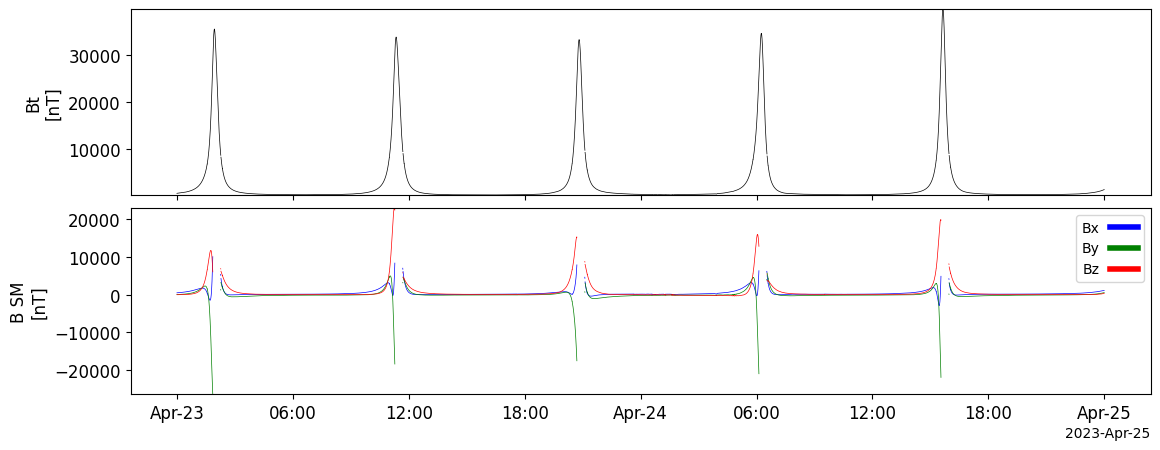

In [4]:
tplot(['erg_mgf_l2_magt_8sec','erg_mgf_l2_mag_8sec_sm'])

 - `erg_mgf_l2_magt_8sec`: 8-sec averaged magnitude of the magnetic field in nT
 - `erg_mgf_l2_mag_8sec_sm`: 8-sec averaged magnetic field vector in the Solar Magnetic (SM) coordinates in nT

To confirm what tplot-variables have been loaded, you can show the all names of the loaded tplot variables by using `pytplot.tplot_names`:

In [5]:
vars = pytplot.tplot_names()

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm


The table below shows all load modules for the data of the plasma and electromagnetic field measurements by Arase:

<center>Table of load modules for Arase</center>

|Instrument|Description (recent paramters)|Load Module|Level|Datatype|IDL/SPEDAS Counterpart
|:-------|:-------|:-------|:-------|:-------|:-------
|ORB|orbit of Arase|ergpyspedas.erg.orb|'l2'<br>'l3'|'def'<br>model:'op','t89','ts04'|erg_load_prb(_l3)
|XEP|SSD: 546.5 to 3129 keV electron|ergpyspedas.erg.xep|'l2'|'omniflux','2dflux'|erg_load_xep
|HEP|HEP-L: 60.2 to 1591 keV electron <br> HEP-H: 579.4 to 2124 keV electron|ergpyspedas.erg.hep|'l2'<br>'l3'|'omniflux','3dflux'<br>'pa'|erg_load_hep
|MEPe|7.0 to 87.5 keV electron|ergpyspedas.erg.mepe|'l2'<br>'l3'|'omniflux','3dflux'<br>'3dflux','pa'|erg_load_mepe
|LEPe|67.0 eV to 19.1 keV electron|ergpyspedas.erg.lepe|'l1'<br>'l2'<br>'l3|NA<br>'omniflux','3dflux','3dflu_finech'<br>'pa'|erg_load_lepe
|MEPi normal-mode|9.6 to 184.2 keV/q H+, He++, He+, O++, O+, O2+|ergpyspedas.erg.mepi_nml|'l2'<br>'l3'|'omniflux','3dflux','tof'<br>'3dflux','pa'|erg_load_mepi_nml
|MEPi TOF-mode|9.6 to 184.2 keV/q H+, He++, He+, O++, O+, O2+|ergpyspedas.erg.mepi_tof|'l2'|'fulx'|erg_load_mepi_tof
|LEPi|35.8 eV/q to 25.4 keV/q H+, He+, O+|ergpyspedas.erg.lepi|'l2'<br>'l3'|'omniflux','3dflux'<br>'pa'|erg_load_lepi_nml
|MGF|DC B-field vector of 8 sec, 64, 128, 256 Hz|ergpyspedas.erg.mgf|'l2'|'8sec','64hz','128hz','256hz'<br>coord:'dsi','gse','gsm','sm'|erg_load_mgf
|EFD|DC E-field vector of 8 sec, 64, 256 Hz as well as 1 sec spectra and 8 Hz SC potential|ergpyspedas.erg.pwe_efd|'l2'|'spin','64','256','spec','pot','pot8Hz'|erg_load_pwe_efd
|OFA|64.0 Hz to 19.5 kHz AC B&E-fields|ergpyspedas.erg.pwe_ofa|'l2'<br>'l3'|'spec','complex','matrix'<br>'property'|erg_load_pwe_ofa
|HFA|2.4 kHz to 10.1 MHz E-field|ergpyspedas.erg.pwe_hfa|'l2'<br>'l3'|mode:'low','high','monit'<br>NA|erg_load_pwe_hfa
|WFC|waveforms of 10 Hz-20 kHz(E)/1 Hz-20 kHz(B)|ergpyspedas.erg.pwe_wfc|'l2'|'waveform','spec'|erg_load_pwe_wfc

Each load module can be imported all at once:

09-Mar-25 03:37:58: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230423_v04.cdf
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230424_v04.cdf
09-Mar-25 03:37:59: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepi/l2/omniflux/2023/04/
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/mepi/l2/omniflux/2023/04/erg_mepi_l2_omniflux_20230423_v02_01.cdf
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/mepi/l2/omniflux/2023/04/erg_mepi_l2_omniflux_20230424_v02_01.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


09-Mar-25 03:37:59: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepi/l2/omniflux/2023/04/
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/lepi/l2/omniflux/2023/04/erg_lepi_l2_omniflux_20230423_v03_00.cdf
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/lepi/l2/omniflux/2023/04/erg_lepi_l2_omniflux_20230424_v03_00.cdf
09-Mar-25 03:37:59: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/efd/l2/spec/2023/04/
09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/pwe/efd/l2/spec/2023/04/erg_pwe_efd_l2_spec_20230423_v02_03.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - ion mass analyzer (MEP-i) 3D ion omni flux data']

PI:  ['Shoichiro Yokota']
Affiliation:  ['Osaka University']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-i data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepi

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Low Energy Particle Ion (LEPi) Experiment 3D ion flux data']

Information about ERG LEPi

PI:  ['Kazushi Asamura']
Affiliation:  ['ISAS, Jaxa']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.sh

09-Mar-25 03:37:59: File is current: erg_data/satellite/erg/pwe/efd/l2/spec/2023/04/erg_pwe_efd_l2_spec_20230424_v02_03.cdf


 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (EFD) Level 2 spectrum data']

Information about ERG PWE EFD

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/EFD: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Efd

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************
0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8s

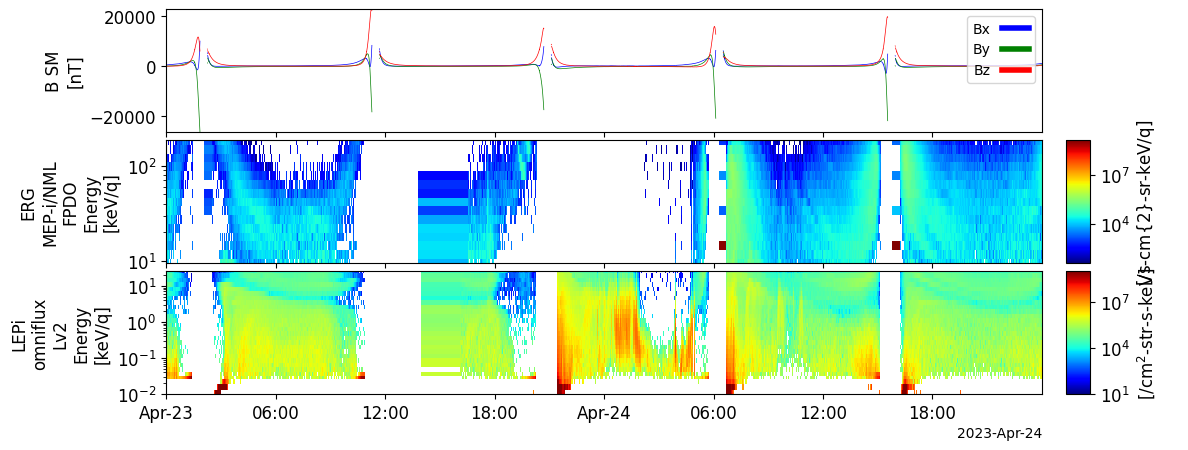

In [6]:
# import necessary modules
from pyspedas.erg import pwe_hfa, pwe_ofa, pwe_efd, xep, hep, mepe, lepe, mepi_nml, mepi_tof, lepi, orb
# load data
orb(trange=trange)
mepi_nml(trange=trange,uname=uname,passwd=passwd)
lepi(trange=trange,uname=uname,passwd=passwd)
pwe_efd(trange=trange,uname=uname,passwd=passwd,datatype='spec') #datatype='spec': load dynamic power spectrum
# show loaded tplot variables
pytplot.tplot_names()
# plot
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

 - `erg_mepi_l2_omniflux_FPDO`: Omnidirectional number differential flux of H+ measured by MEP-i in counts/s/cm$^2$/keV/sr [time x energy]
 - `erg_lepi_l2_omniflux_FPDO`: Omnidirectional number differential flux of H+ measured by LEP-i in counts/s/cm$^2$/keV/sr [time x energy]

---

### 2.2. Settings for PyTplot
PyTplot provides a lot of useful commands and options to create beautiful plots. Here this crib sheet demonstrates how basic commands and options work when making a figure.

#### 2.2.1. Time range
To change the interval of the time series data to be shown, use `pytplot.timespan`:

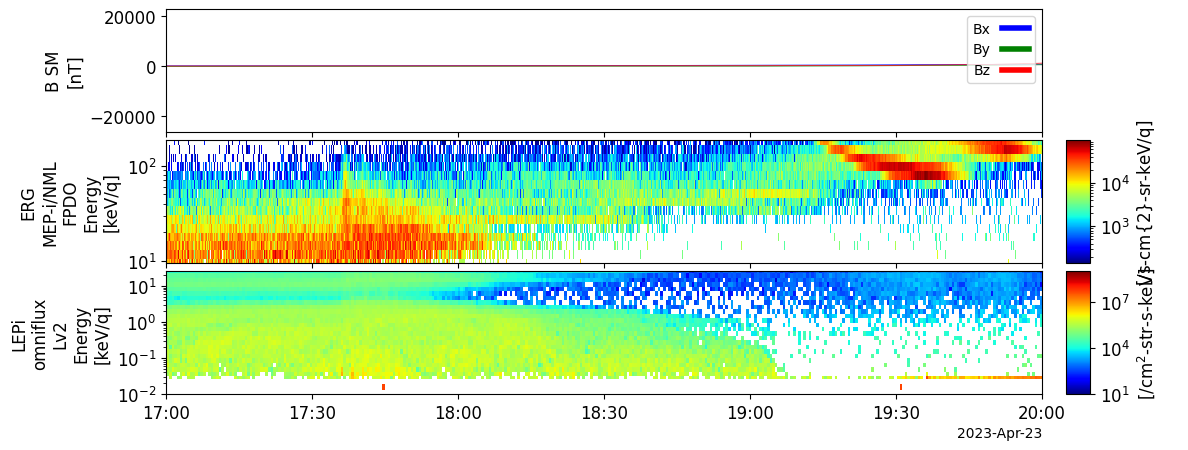

In [7]:
pytplot.timespan('2023-04-23/17:00:00',3,keyword='hours') # plot for 4:30-6:30 UT. keyword should be 'seconds', 'minutes', 'hours', or 'days'
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

#### 2.2.2. Vertical scale
The vertical (y-axis) scale of the magnetic field at the top panel is too large to see the variations. To change the vertical scale, use `pytplot.options` with `yrange`:

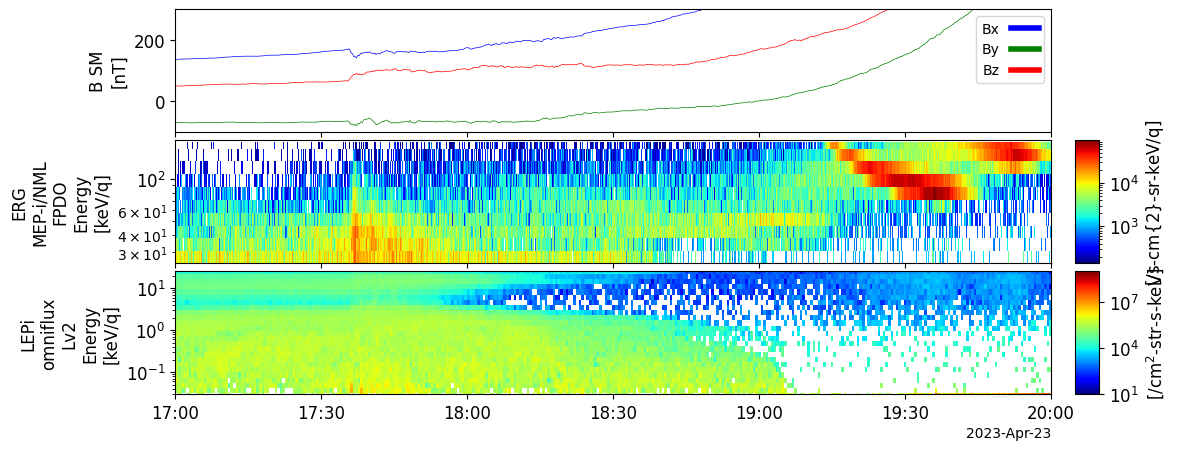

In [8]:
pytplot.options('erg_mgf_l2_mag_8sec_sm','yrange',[-100,300])
pytplot.options('erg_lepi_l2_omniflux_FPDO','yrange',[0.03,25]) # hide invalid energy bins
pytplot.options('erg_mepi_l2_omniflux_FPDO','yrange',[25,190])
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

<u>Tips of import</u><br>
If you frequently use `pytplot.timespan`, `pytplot.options`, and other functions, it might be work importing it like
~~~python
  from pytplot import tplot, options, timespan, tplot_names 
~~~

To set the y-axis to a logarithmic scale, use `pytplot.options` with `ylog` option:

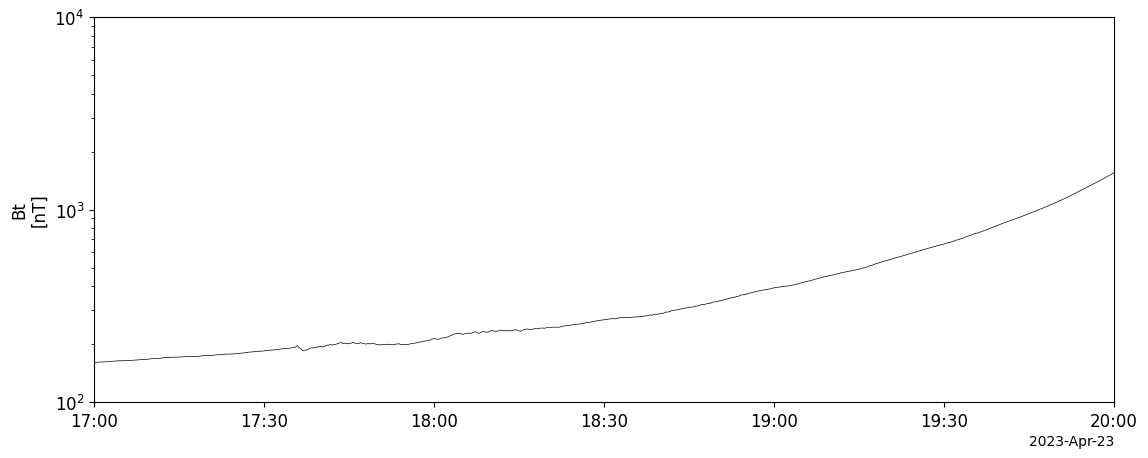

In [9]:
pytplot.options('erg_mgf_l2_magt_8sec','ylog',1) # 1: log, 0: linear, True/False is also acceptable.
pytplot.options('erg_mgf_l2_magt_8sec','yrange',[1.e2,1.e4])
tplot('erg_mgf_l2_magt_8sec')

#### 2.2.3. Color scale
To change the color scale in the contour plot, use `pytplot.options` with `zrange`:

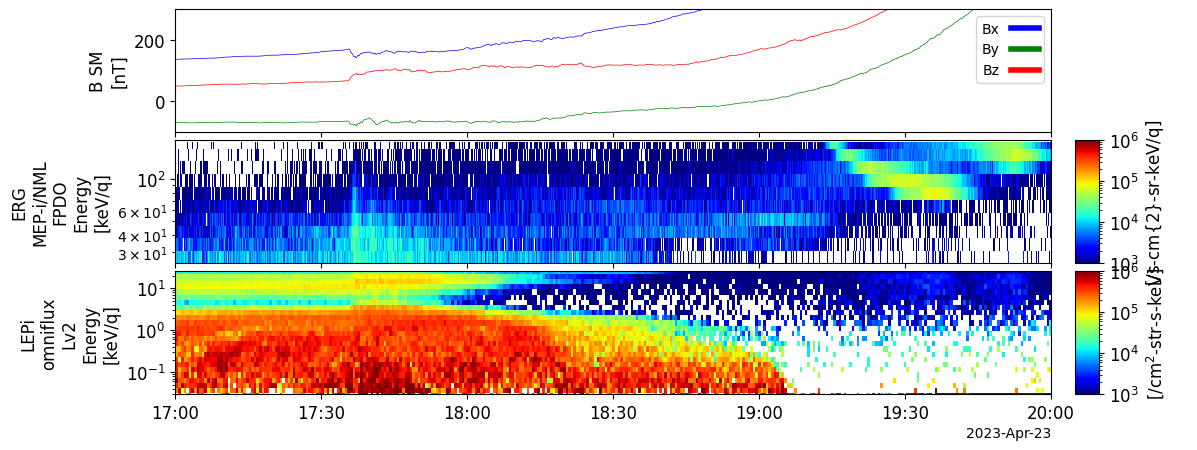

In [10]:
pytplot.options(['erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'],'zrange',[1.e3,1.e6]) # MEP-i and LEP-i fluxes in the same color scale
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

#### 2.2.4. Titles in X, Y, and Z axes
To change the main titles in the X, Y, and Z axes, use `pytplot.options` with `xtitle`, `ytitle`, and `ztitle`. Subtitles can be set for the unit of the Y and Z axes (`ysubtitle` and `zsubtitle`).

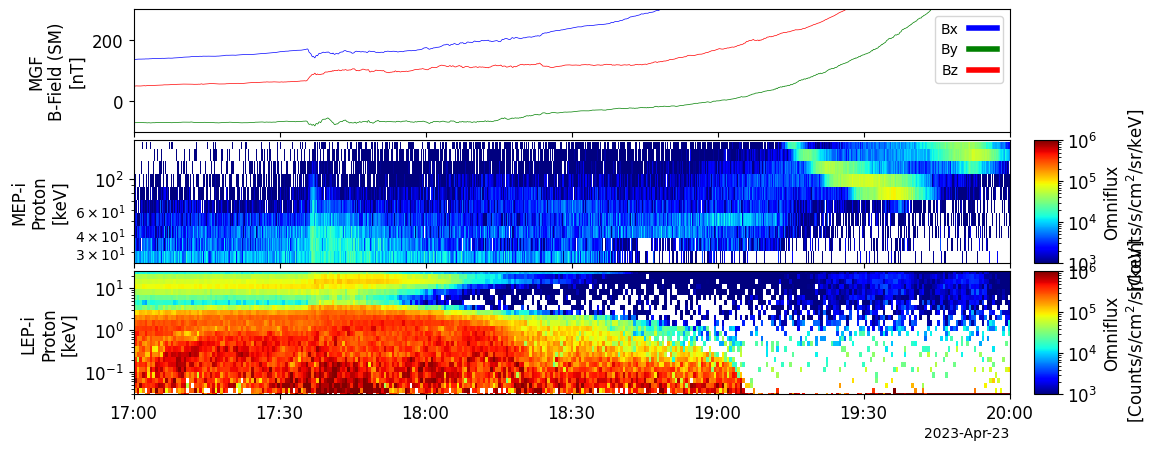

In [11]:
# title of the magnetic field
pytplot.options('erg_mgf_l2_mag_8sec_sm','ytitle','MGF\nB-Field (SM)') # \n means a forced line break
# titles of the MEP-i and LEP-i proton fluxes
# x-axis
pytplot.options('erg_mepi_l2_omniflux_FPDO','ytitle','MEP-i\nProton') 
pytplot.options('erg_lepi_l2_omniflux_FPDO','ytitle','LEP-i\nProton')
# y-axis
pytplot.options('erg_mepi_l2_omniflux_FPDO','ysubtitle','[keV]')
pytplot.options('erg_lepi_l2_omniflux_FPDO','ysubtitle','[keV]')
# z-axis
pytplot.options('erg_mepi_l2_omniflux_FPDO','ztitle','Omniflux')
pytplot.options('erg_lepi_l2_omniflux_FPDO','ztitle','Omniflux')
pytplot.options('erg_mepi_l2_omniflux_FPDO','zsubtitle','[Counts/s/cm$^2$/sr/keV]') # zsubtitle does not exist in IDL/SPEDAS
pytplot.options('erg_lepi_l2_omniflux_FPDO','zsubtitle','[Counts/s/cm$^2$/sr/keV]') # ^ means superscript in the math mode ($$) of Matplotlib
# plot again
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])


The size of characters in the X and Y axis labels can be changed by using `pytplot.options` with `charsize` option:

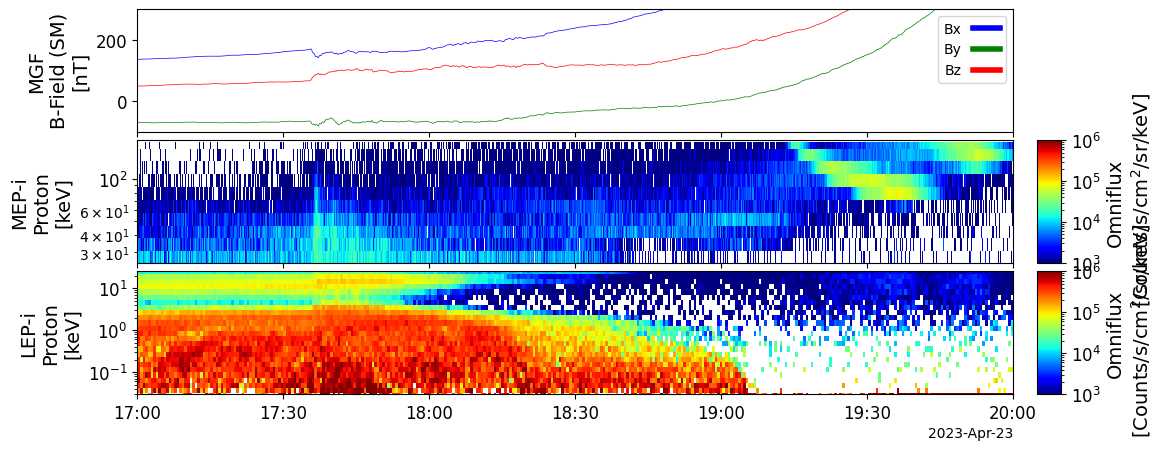

In [12]:
pytplot.options(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'],'charsize',14)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

#### 2.2.5. Other options of pytplot.options
The table below summarizes other options of `pytplot.options`. This table was copied from doc comments of https://github.com/MAVENSDC/PyTplot/blob/master/pytplot/options.py. 

&nbsp;
 <center>Table: Options of pytplot.options </center> 

|Options|Value Type|Notes|IDL-SPEDAS/options Counterpart
|:----|:----|:----|:----|
|Color|str/list|red, green, blue, etc.  Also takes in RGB tuples, i.e. (0,255,0) for green|colors|colors
|Colormap|str/list|https://matplotlib.org/examples/color/colormaps_reference.html|color_table
|Spec|int|1 sets the Tplot Variable to spectrogram mode, 0 reverts.|spec
|Alt                 |int|1 sets the Tplot Variable to altitude plot mode, 0 reverts.|
|Map                 |int|1 sets the Tplot Variable to latitude/longitude mode, 0 reverts.|
|link                |list|Allows a user to reference one tplot variable to another.|
|ylog                |int|1 sets the y axis to log scale, 0 reverts.|ylog
|zlog                |int|1 sets the z axis to log scale, 0 reverts (spectrograms only).|zlog
|legend_names        |list|A list of strings that will be used to identify the lines.|labels
|xlog_slice          |bool|Sets x axis on slice plot to log scale if True.|
|ylog_slice          |bool|Sets y axis on slice plot to log scale if True.|
|line_style          |str|scatter (to make scatter plots), or solid_line, dot, dash, dash_dot, dash_dot_dot_dot, long_dash.|linestyles
|char_size           |int|Defines character size for plot labels, etc.|chrasize
|name                |str|The title of the plot.|title
|panel_size          |flt|Number between (0,1], representing the percent size of the plot.|panel_size
|basemap             |str|Full path and name of a background image for "Map" plots.|
|alpha               |flt|Number between [0,1], gives the transparency of the plot lines.|
|thick               |flt|Sets plot line width.|thick
|yrange              |flt list|Two numbers that give the y axis range of the plot.|yrange
|zrange              |flt list|Two numbers that give the z axis range of the plot.|zrange
|xrange_slice        |flt list|Two numbers that give the x axis range of spectrogram slicing plots.|
|yrange_slice        |flt list|Two numbers that give the y axis range of spectrogram slicing plots.|
|ytitle              |str|Title shown on the y axis.  Use backslash for new lines.|ytitle
|ztitle              |str|Title shown on the z axis.  Spec plots only.  Use backslash for new lines.|ztitle
|ysubtitle           |str|Subtitle shown on the y axis.|ysubtitle
|zsubtitle           |str|Subtitle shown on the z axis.  Spec plots only.|
|plotter             |str|Allows a user to implement their own plotting script in place of the ones herein.|
|crosshair_x         |str          |Title for x-axis crosshair.|
|crosshair_y         |str          |Title for y-axis crosshair.|
|crosshair_z         |str          |Title for z-axis crosshair.|
|static              |str          |Datetime string that gives desired time to plot y and z values from a spec plot.|
|static_tavg         |str          |Datetime string that gives desired time-averaged y and z values to plot from a spec plot.|
|t_average           |int          |Seconds around which the cursor is averaged when hovering over spectrogram plots.|
|spec_plot_dim       |int/str      |If variable has more than two dimensions, this sets which dimension the variable will display on the y axis in spectrogram plots. All other dimensions are summed into this one, unless "spec_slices_to_use" is also set for this variable.|
|spec_dim_to_plot    |int/str      |Same as spec_plot_dim, just with a slightly more descriptive name|
|spec_slices_to_use  |str          |Must be a dictionary of coordinate:values.  If a variable has more than two dimensions, spectrogram plots will plot values at that particular slice of that dimension.  See examples for how it works.|
|border              |bool         |Turns on or off the top/right axes that would create a box around the plot|axis
|var_label_ticks     |int          |Sets the number of ticks if this variable is displayed as an alternative x axis|

#### 2.2.6. Extra X-axis at the bottom of the plot
To draw extra X-axes (labels of the spacecraft positions, for example), use `ergpyspedas.util.tplot_vl`. `ergpyspedas.util.tplot.vl` has an option `var_label`, which contains strings of tplot variable names whose values will be shown at the bottom of the plot.

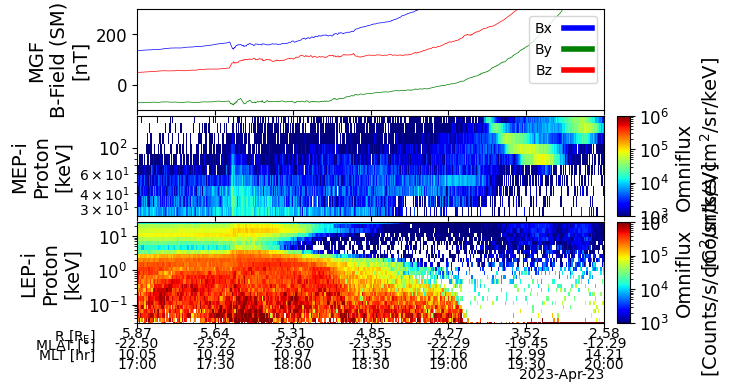

In [13]:
from ergpyspedas.util import tplot_vl
# preparation for adding extra X-axes
var_label = pytplot.split_vec('erg_orb_l2_pos_rmlatmlt') # separate into three tplot-variables of radial distance, magnetic local time, and magnetic latitude
# set ytitles
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_x', 'ytitle', 'R [R$\mathrm{_E}$]' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'MLAT [\N{degree sign}]' ) # \N{degree sign} is the symbol of degree
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT [hr]' )
fig = tplot_vl(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'],var_label=var_label)

#### 2.2.7. Size of plot
There is overlapping text in the X, Y, and Z axes after the modification of plot settings. To resolve it, the height of the plot should be higher. In the case of `ergpyspedas.util.tplot_vl`, use `ysize` (`xsize`) options of `pytplot` to change the height (width).


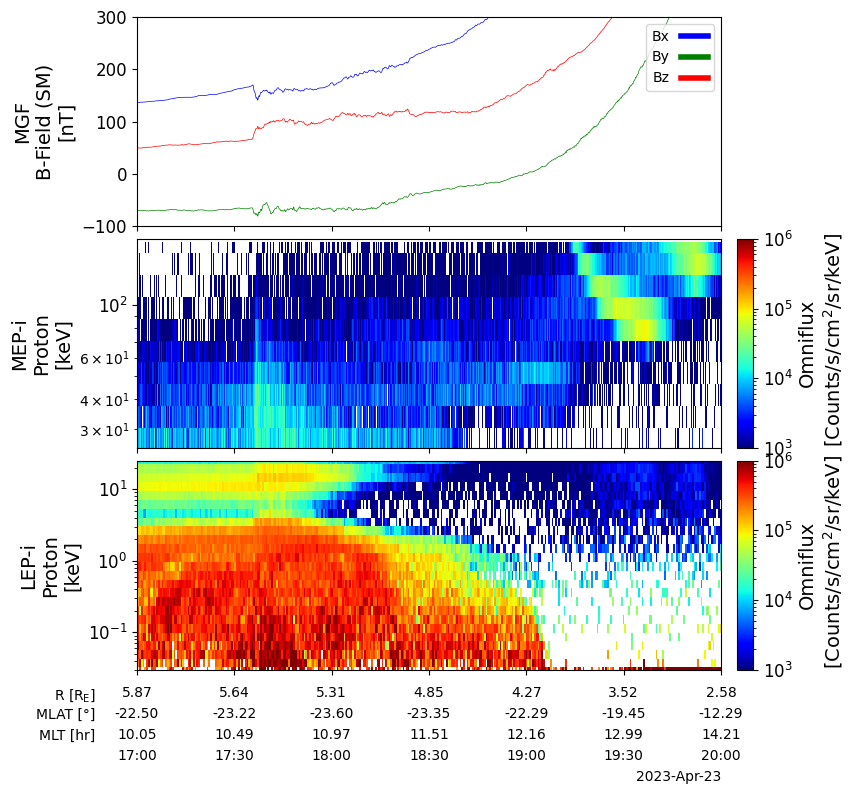

In [14]:
fig  = plt.figure(figsize=(8,10)) # use matplotlib.pyplot to set up the figure object (fig)
plot = tplot_vl(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'],fig=fig,var_label=var_label)

#### 2.2.8. General settings for PyTplot
Some general settings for PyTplot can be changed using `pytplot.tplot_options` with a lot of options.
The lines below show some examples of this function:

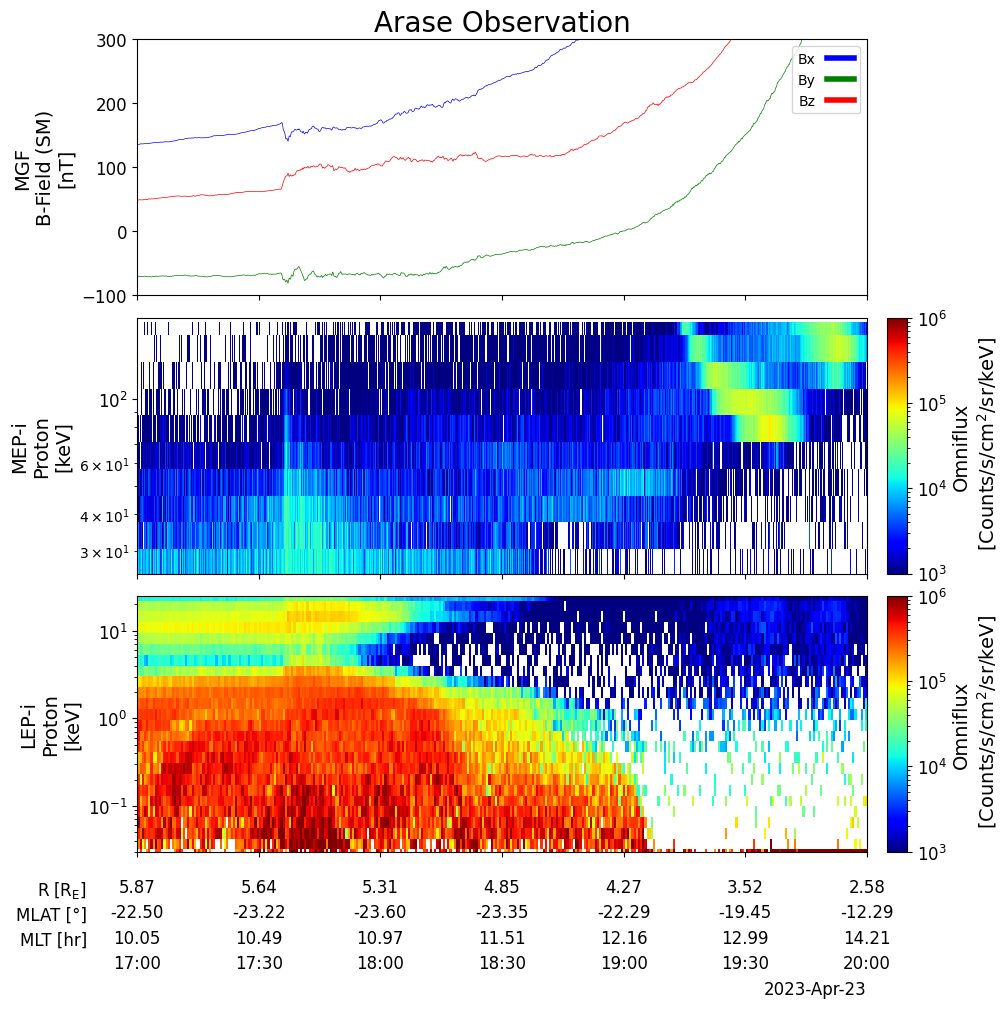

In [15]:
pytplot.tplot_options('axis_font_size',12)         # change the size of digits in the X and Y axes
pytplot.tplot_options('title','Arase Observation') # set the title of plot at the top
pytplot.tplot_options('title_size',20)             # size of the title
pytplot.tplot_options('vertical_spacing',0.1)      # spacing between each panel
fig   = plt.figure(figsize=(10,12.5)) # use matplotlib.pyplot to set up the figure object
plot2 = tplot_vl(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'],fig=fig,var_label=var_label,font_size=12) #font_size: font size of the extra x-axis

Other options are summarized in the blow table:

<center>Table: Options of pytplot.tplot_options</center>

|Options|Value Type|Notes|IDL/tplot_options Counterpart|
|:----|:----:|:----|:----|
|title|str|Title of the entire output|title
|title_size|int|Font size of the entire output|!x(y).charsize
|xmargin|list|margin in the X-direction (obsolete?)|xmargin
|ymargin|list|margin in the Y-direction (obsolete?)|ymargin
|var_label|str|Name of the tplot variable to be used as another X-axis|var_label
|data_gap|int|Number of seconds with consecutive nan values allowed before no interp should occur|datagap in options
|vertical_spacing|float|The space in pixels between two plots|ygap
|axis_font_size|int|The font size of the axis ticks.  Default is 10.|!p.charsize

#### 2.2.9. Colormaps in Matplotlib for contour plot
Colormaps options can be specified for each tplot variable. Pytplot supports all colormaps available in Matplotlib (https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html). PySPEDAS also supports IDL/SPEDAS colormap ('spedas') and it is the default colormap.

To change colormaps, use `pytplot.options` with `colormap` option:

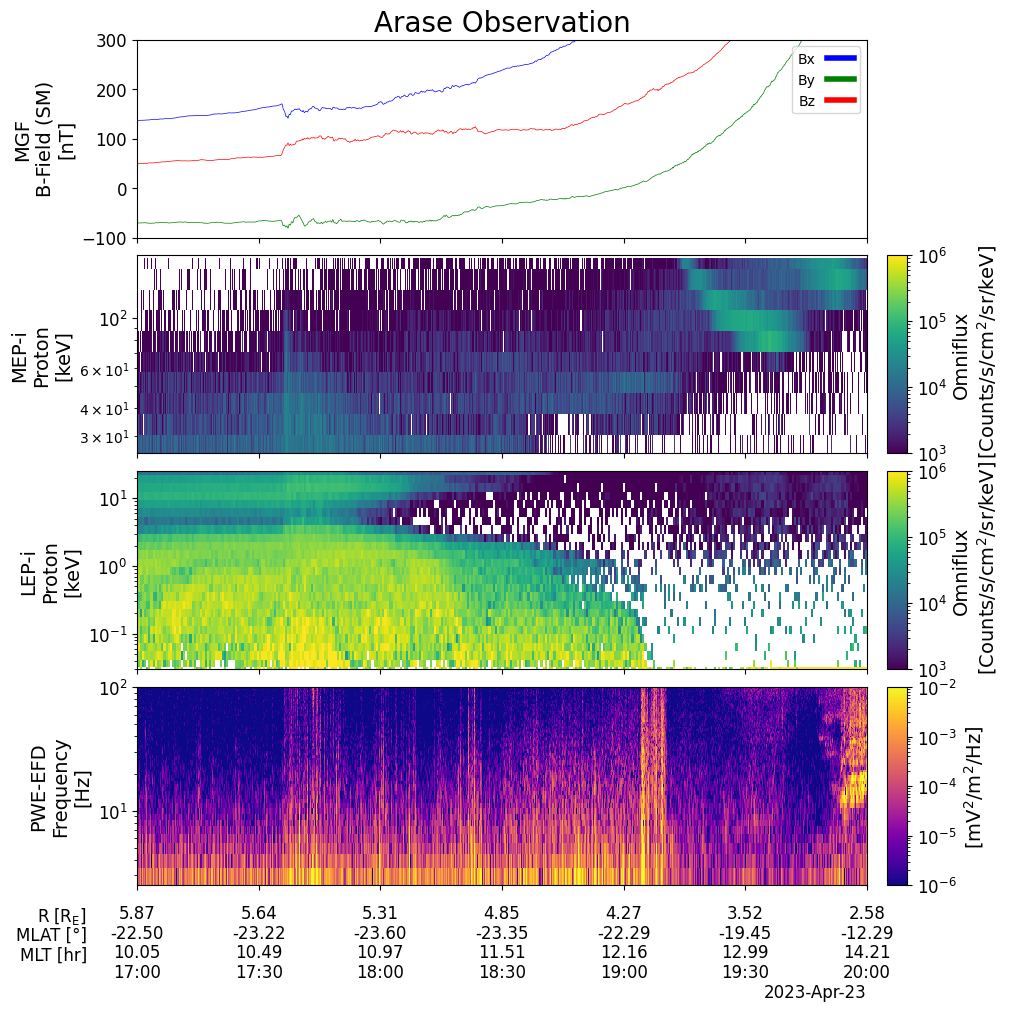

In [16]:
pytplot.options('erg_mepi_l2_omniflux_FPDO','colormap','viridis') # 'viridis' is a name of colormap
pytplot.options('erg_lepi_l2_omniflux_FPDO','colormap','viridis')
pytplot.options('erg_pwe_efd_l2_spec_spectra','colormap','plasma') # 'plasma' is a name of colormap
pytplot.options('erg_pwe_efd_l2_spec_spectra','yrange',[2.5e0,1.0e2])
pytplot.options('erg_pwe_efd_l2_spec_spectra','ytitle','PWE-EFD\nFrequency')
pytplot.options('erg_pwe_efd_l2_spec_spectra','charsize',14)
fig   = plt.figure(figsize=(10,12.5)) # use matplotlib.pyplot to set up the figure object
plot3 = tplot_vl(['erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO','erg_pwe_efd_l2_spec_spectra'],fig=fig,var_label=var_label,font_size=12)

---
### 2.3. Load and plot ground-based data

#### 2.3.1. Induction magnetometer
`ergpyspedas.erg.gmag_isee_induction` is a data load function for ISEE induction magnetometers.

Recently, the data of the induction magnetometer at KAG (Kagoshima, Japan; MLAT = 21.9$^\circ$, MLON = 200.6$^\circ$) have been added to the data repository (https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/geomag/isee/induction/kag/). 

In [17]:
trange_ind = ['2024-10-10/18:00:00','2024-10-11/19:00:00']
pytplot.timespan('2024-10-10/18:00:00',1,keyword='hours')
from ergpyspedas.erg import gmag_isee_induction
pyspedas.omni.data(trange=trange_ind)
gmag_isee_induction(trange=trange_ind, site='kag')
# caluclate dynamic power spectra by using pytplot.tdpwrspc
pyspedas.split_vec('isee_induction_db_dt_kag') #z component does not have any finite values
pytplot.tdpwrspc('isee_induction_db_dt_kag_x',nboxpoints=512, nshiftpoints=256,bin=1)
pytplot.tdpwrspc('isee_induction_db_dt_kag_y',nboxpoints=512, nshiftpoints=256,bin=1)

09-Mar-25 03:38:08: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2024/
09-Mar-25 03:38:09: File is current: omni_data/hro_1min/2024/omni_hro_1min_20241001_v01.cdf
09-Mar-25 03:38:10: Integer data values for variable AE_INDEX are all fillval (99999).
09-Mar-25 03:38:10: Integer data values for variable AL_INDEX are all fillval (99999).
09-Mar-25 03:38:10: Integer data values for variable AU_INDEX are all fillval (99999).
09-Mar-25 03:38:10: Floating point data values for variable PC_N_INDEX are all fillval (9.999900e+02)
09-Mar-25 03:38:10: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/geomag/isee/induction/kag/2024/10/
09-Mar-25 03:38:11: File is current: erg_data/ground/geomag/isee/induction/kag/2024/10/isee_induction_kag_2024101018_v01.cdf
09-Mar-25 03:38:11: File is current: erg_data/ground/geomag/isee/induction/kag/2024/10/isee_induction_kag_2024101019_v01.cdf
09-Mar-25 03:38:11: File is current: erg_data/gr

**************************************************************************
['ISEE Ground-Based Induction Magnetometer Data']

Information about ['KAG']
PI and Host PI(s):
['Kazuo Shiokawa']

Affiliation: 
['Institute for Space-Earth Environmental Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for ISEE Induction Magnetometer Data Use:
1. Please contact Kazuo Shiokawa (shiokawa at nagoya-u.jp) before using the data for any publications and/or presentations.
2. References: Shiokawa, K., R. Nomura, K. Sakaguchi, Y. Otsuka, Y. Hamaguchi, M. Satoh, Y. Katoh, Y. Yamamoto, B. M. Shevtsov, S. Smirnov, I. Poddelsky, and M. Connors, The STEL induction magnetometer network for observation of high-frequency geomagnetic pulsations, Earth Planets Space, 62(6), 517-524, doi:10.5047/eps.2010.05.003, 2010.
3. For frequencies below ~1Hz, use the following equation to obtain amplitude values in units of nT/s: dB/dt (nT/s) = data (V) / quick_sensitivit

'isee_induction_db_dt_kag_y_dpwrspc'

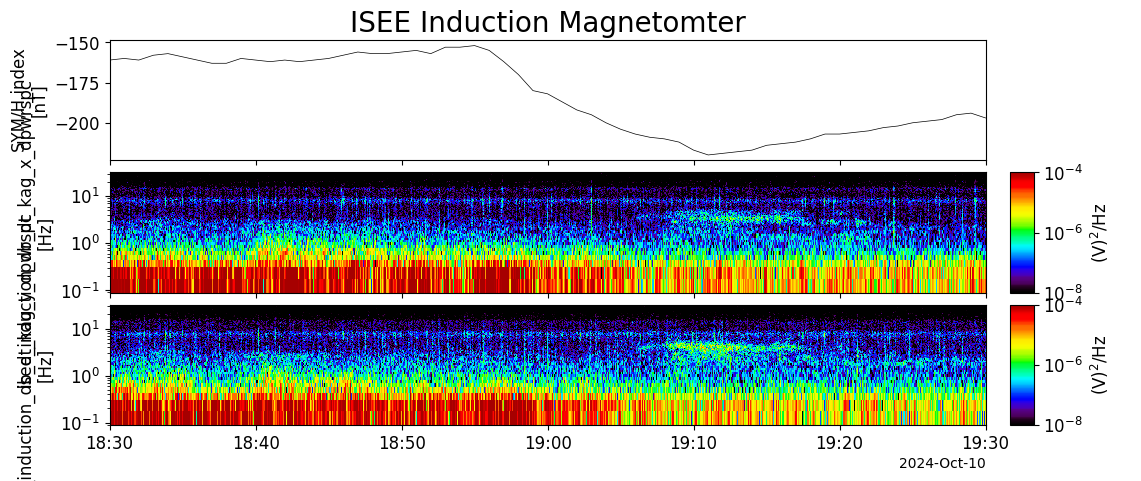

In [18]:
# plot
pytplot.timespan('2024-10-10/18:30:00',1,keyword='hours')
pytplot.options('isee_induction_db_dt_kag_x_dpwrspc','zrange',[1.0e-8,1.0e-4])
pytplot.options('isee_induction_db_dt_kag_y_dpwrspc','zrange',[1.0e-8,1.0e-4])
pytplot.tplot_options('title','ISEE Induction Magnetomter')
tplot(['SYM_H','isee_induction_db_dt_kag_x_dpwrspc','isee_induction_db_dt_kag_y_dpwrspc'])

The information of ISEE Magnetometer Network can be found at https://stdb2.isee.nagoya-u.ac.jp/magne/. The table below shows the locations of the observatories of ISEE magnetometers. 

<center> Table: Location of each VLF data site taken from https://stdb2.isee.nagoya-u.ac.jp/magne/ </center>

|Site  |GLAT  |GLON     |MLAT    |MLON       |Inclination|Declination|Collaborators
|:-----|:-----|:--------|:-------|:----------|:----------|:----------|:------------
|IST   |70.03 |88.01    |60.6    |166.6      |83.79      |19.30      |ISTP (SB, RAS)
|HUS   |64.67 |338.97   |64.9    | 66.2      |75.78      |-14.34     |NIPR/U.Iceland
|GAK   |62.39 |214.78   |63.6    |268.51     |75.80      | 18.31     |NICT, GI-UAF, UNH 
|MGD   |60.05 |150.73   |51.9    |213.2      |71.56      |-11.02     |IKIR (FEB, RAS)
|NAI   |56.54 |298.269  |65.8    |14.8       |75.36      |-22.92     |NICT, Augsburg College
|ATH   |54.71 |246.69   |61.7    |306.2      |76.57      | 17.4      |U.Athabasca/U.Calgary (AUGO-I, before 161024)
|ATH   |54.60 |246.36   |61.1    |307.8      |76.00      | 15.1      |U.Athabsca (AUGSO, after 161025)
|LCL   |51.0  |252.9    |58.2    |317.3      |74.3       | 10.4      |U.Athabasca, GADC project 
|ZGN   |66.78 |123.37   |57.23   |191.64     |80.7       |-15.6      |IKFIA/YSC (SB, RAS) 
|PTK   |52.97 |158.248  |45.8    |221.4      |64.6       |-6.5       |IKIR (FEB, RAS)
|KAP   |49.39 |277.81   |58.7    |347.6      |74.17      |-10.19     |NICT, Virginia Tech.
|MSR   |44.37 |142.27   |35.6    |209.5      |58.58      |  -9.5     |ISEE Observatory (MOS)
|RIK   |43.46 |143.77   |34.7    |210.8      |57.8       |  -9.1     |ISEE Observatory 
|KAG   |31.48 |130.72   |21.9    |200.6      |45.1       |  -6.1     |ISEE Observatory
|STA   |31.02 |130.68   |21.2    |200.5      |44.8       |  -5.8     |Kagoshima University 
|KNG   |26.76 |128.21   |17.8    |199.6      |39.0       |  -5.6     |Ryukyu University 
|MUT   |14.37 |121.02   |5.3     |193.30     |16.8       |  -2.6     |NAMRIA
|KTB   |-0.20 |100.32   |-10.63  |171.93     |-20.10     |  -0.6     |RISH(Kyoto U.)/LAPAN
|KDU   |-12.69|132.47   |-20.87  |206.31     |-39.9      |   2.6     |Geoscience Australia 
|MDM   |-45.60|170.09   |-52.81  |255.55     |-70.9      |  24.8     |i-SPES, Kyushu University
|TEW   |-41.18|175.83   |-47.11  |259.50     |-66.5      |  22.4     |i-SPES, Kyushu University
|WAI   |-40.56|175.21   |-43.26  |255.71     |-65.8      |  22.6     |i-SPES, Kyushu University

#### 2.3.2. VLF antenna
`ergpyspedas.erg.isee_vlf` is a data load function for ISEE VLF data.
Recently, the VLF data at ANG (Angeli, Finland; MLAT = 65.8 deg, MLON = 119.5 deg) have been added to the data repository (https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/vlf/ang/). 

In [19]:
# Note that the data load module in pyspedas does not work for ANG
trange_vlf = ['2024-10-11/07:00:00','2024-10-11/09:00:00']
ergpyspedas.erg.isee_vlf(trange=trange_vlf,site=['ang','ouj'])

09-Mar-25 03:38:24: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/vlf/ouj/2024/10/
09-Mar-25 03:38:24: File is current: erg_data/ground/vlf/ouj/2024/10/isee_vlf_ouj_2024101107_v01.cdf
09-Mar-25 03:38:25: File is current: erg_data/ground/vlf/ouj/2024/10/isee_vlf_ouj_2024101108_v01.cdf
09-Mar-25 03:38:27: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/vlf/ang/2024/10/
09-Mar-25 03:38:27: File is current: erg_data/ground/vlf/ang/2024/10/isee_vlf_ang_2024101107_v01.cdf


**************************************************************************
['ISEE Ground-Based Loop Antenna ELF/VLF Wave Data']

Information about ['OUJ']
PI ['Kazuo Shiokawa']

Affiliations: ['Institute for Space-Earth Environmenal Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for ISEE VLF Data Use:

1. Please contact Kazuo Shiokawa (shiokawa at nagoya-u.jp) before using the data for any publications and/or presentations.
2. References: Shiokawa, K., Y. Yokoyama, A. Ieda, Y. Miyoshi, R. Nomura, S. Lee, N. Sunagawa, Y. Miyashita, M. Ozaki, K. Ishizaka, S. Yagitani, R. Kataoka, F. Tsuchiya, I. Schofield, and M. Connors, Ground-based ELF/VLF chorus observations at subauroral latitudes - VLF-CHAIN Campaign, J. Geophys. Res., 119, doi:10.1029/2014JA020161, 2014. 
3. Data are obtained by a VLF/ELF crossed loop antenna.  Antenna is 10turn, 5-m height with a sensitivity peak at 8kHz. The sampling rate was 100 kHz at Athabasca before 05:3

09-Mar-25 03:38:28: File is current: erg_data/ground/vlf/ang/2024/10/isee_vlf_ang_2024101108_v01.cdf


**************************************************************************
['ISEE Ground-Based Loop Antenna ELF/VLF Wave Data']

Information about ['OUJ']
PI ['Kazuo Shiokawa']

Affiliations: ['Institute for Space-Earth Environmenal Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for ISEE VLF Data Use:

1. Please contact Kazuo Shiokawa (shiokawa at nagoya-u.jp) before using the data for any publications and/or presentations.
2. References: Shiokawa, K., Y. Yokoyama, A. Ieda, Y. Miyoshi, R. Nomura, S. Lee, N. Sunagawa, Y. Miyashita, M. Ozaki, K. Ishizaka, S. Yagitani, R. Kataoka, F. Tsuchiya, I. Schofield, and M. Connors, Ground-based ELF/VLF chorus observations at subauroral latitudes - VLF-CHAIN Campaign, J. Geophys. Res., 119, doi:10.1029/2014JA020161, 2014. 
3. Data are obtained by a VLF/ELF crossed loop antenna.  Antenna is 10turn, 5-m height with a sensitivity peak at 8kHz. The sampling rate was 100 kHz at Athabasca before 05:3

['isee_vlf_ouj_ch1',
 'isee_vlf_ouj_ch2',
 'isee_vlf_ouj_freq_vlf',
 'isee_vlf_ang_ch1',
 'isee_vlf_ang_ch2',
 'isee_vlf_ang_freq_vlf']

The information of ISEE VLF/ELF Network can be found at https://stdb2.isee.nagoya-u.ac.jp/vlf/vlf_stations.html.  

<center> Table: Location of each VLF data site taken from https://stdb2.isee.nagoya-u.ac.jp/vlf/vlf_stations.html </center>

|Site  |GLAT  |GLON     |MALT   |MLON       |Inclination|Declination|Collaborators
|:-----|:-----|:--------|:------|:----------|:----------|:----------|:------------
|IST   |70.03 |88.01    |60.6   |166.6      |83.79      |19.30      |ISTP
|ANG   |69.02 |25.82    |65.8   |119.5      |78.38      |14.13      |SGO/U. Oulu
|HUS   |64.67 |338.97   |64.9   | 66.2      |75.78      |-14.34     |NIPR/U.Iceland
|OUJ   |64.51 |27.23    |61.3   |117.4      |76.11      |12.33      |SGO/U. Oulu 
|MAM   |63.06 |129.56   |58.0   |202.0      |77.38      |-15.93     |IKFIA
|GAK   |62.39 |214.78   |63.6   |268.51     |75.80      |18.31      |GI-UAF/Kanazawa U.
|NAI   |56.54 |298.269  |65.8   |14.8       |75.36      |-22.92     |NICT, Augsburg College
|ATH   |54.60 |246.36   |61.2   |307.2      |76.15      |15.7       |U.Athabasca/Kanazawa U.
|KAP   |49.39 |277.81   |58.7   |347.6      |74.17      |-10.19     |Virginia Tech.
|MSR   |44.37 |142.27   |35.6   |209.5      |58.58      |-9.5       |ISEE Observatory/Chiba U.  

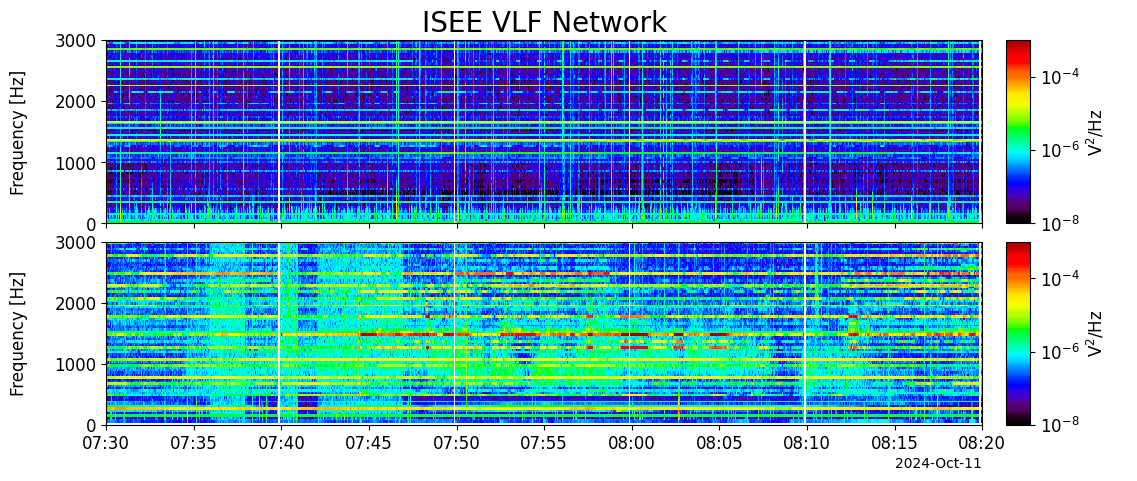

In [20]:
# plot dynamic power spectra
pytplot.timespan('2024-10-11/07:30:00',50,keyword='minutes')
pytplot.options('isee_vlf_ang_ch2','yrange',[0,3000])
pytplot.options('isee_vlf_ang_ch2','zrange',[1.e-8,1.e-3])
pytplot.options('isee_vlf_ouj_ch2','yrange',[0,3000])
pytplot.options('isee_vlf_ouj_ch2','zrange',[1.e-8,1.e-3])
pytplot.tplot_options('title','ISEE VLF Network')
tplot(['isee_vlf_ang_ch2','isee_vlf_ouj_ch2'])

#### 2.3.3. OMTI (ground optical imager)
The Optical Mesosphere Thermosphere Imagers (OMTIs) operated by ISEE provide all-sky images of nocturnal airglow emissions. To load the two-dimensional images, use `ergpyspedas.erg.camera_omti_asi`. There are related modules for calculation and plot:
 - calculate the emission intensity in Rayleigh from count data: `tabsint`
 - make a table of field line mapping: `tmake_amp_table`
 - map the intensity data along a field line: `tasi2gmap`

In [21]:
# import data-load and calculation modules for OMTI
from ergpyspedas.erg import camera_omti_asi as omti, tabsint, tmake_map_table, tasi2gmap, plot_omti_gmap
# set parameters for data-loading
trange_omti = ['2024-01-01/18:00:00','2024-01-01/19:00:00']
site        = 'nyr'              # site: name of OMTI station, 'nyr' = Nyrola in Finland, GLAT = 62.34 deg, GLON = 25.51 deg 
wavelength  = [6300,5725]        # wavelength 630.0 or 572.5 nm
wl          = str(wavelength[0]) # convert to string
# data load and calculation
omti(trange=trange_omti,site=site,wavelength=wavelength)                                  #load OMTI data
tabsint(site=site,wavelength=wavelength)                                                  #convert from count to Rayleigh
tmake_map_table('omti_asi_'+site+'_'+wl+'_image_abs',mapping_alt=400,grid=0.04)           #mapping table to 400 km altitude
tasi2gmap('omti_asi_'+site+'_'+wl+'_image_abs','omti_asi_'+site+'_'+wl+'_gmap_table_400') #mapping

09-Mar-25 03:38:46: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/camera/omti/asi/nyr/2024/01/01/
09-Mar-25 03:38:46: File is current: erg_data/ground/camera/omti/asi/nyr/2024/01/01/omti_asi_ci2_nyr_6300_2024010118_v01.cdf


**************************************************************************
['Optical Mesosphere Thermosphere Imagers All-Sky Imager Data']

Information about ['NYR']
PI: ['Kazuo Shiokawa and Yuichi Otsuka']

Affiliations: ['Institute for Space-Earth Environmental Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for OMTI ASI Data Use:
1. Please contact the Principal Investigator (PI), K. Shiokawa (shiokawa at nagoya-u.jp) or Y. Otsuka, ISEE, Nagoya University before using the data at any publications and/or presentations.
2. Please cite Shiokawa et al. (1999) and/or Shiokawa et al. (2009) in the publication. The detailed citation is:
    * Shiokawa et al., Earth Planets Space, 51, p.887-896, 1999.
    * Shiokawa et al., Earth Planets Space, 61, p.479-491, 2009.
['For more information, see http://stdb2.isee.nagoya-u.ac.jp/omti/']
**************************************************************************


09-Mar-25 03:38:47: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/camera/omti/asi/nyr/2024/01/01/
09-Mar-25 03:38:47: File is current: erg_data/ground/camera/omti/asi/nyr/2024/01/01/omti_asi_ci5_nyr_5725_2024010118_v01.cdf
09-Mar-25 03:38:47: File is current: erg_data/ergsc/ground/camera/omti/asi/calibrated_files/calibrated_files.zip


**************************************************************************
['Optical Mesosphere Thermosphere Imagers All-Sky Imager Data']

Information about ['NYR']
PI: ['Kazuo Shiokawa and Yuichi Otsuka']

Affiliations: ['Institute for Space-Earth Environmental Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for OMTI ASI Data Use:
1. Please contact the Principal Investigator (PI), K. Shiokawa (shiokawa at nagoya-u.jp) or Y. Otsuka, ISEE, Nagoya University before using the data at any publications and/or presentations.
2. Please cite Shiokawa et al. (1999) and/or Shiokawa et al. (2009) in the publication. The detailed citation is:
    * Shiokawa et al., Earth Planets Space, 51, p.887-896, 1999.
    * Shiokawa et al., Earth Planets Space, 61, p.479-491, 2009.
['For more information, see http://stdb2.isee.nagoya-u.ac.jp/omti/']
**************************************************************************
0 : erg_mgf_l2_epoch_8sec
1 : er

09-Mar-25 03:38:49: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/ergpyspedas/erg/ground/camera/omti/tabsint.py:212: RuntimeWarning: divide by zero encountered in divide
  bg_int = (mod_bg - dc_bg) * transmission_background / (cal_bg * exp_bg * bandwidth_background)

09-Mar-25 03:38:49: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/ergpyspedas/erg/ground/camera/omti/tabsint.py:212: RuntimeWarning: invalid value encountered in divide
  bg_int = (mod_bg - dc_bg) * transmission_background / (cal_bg * exp_bg * bandwidth_background)

09-Mar-25 03:38:49: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/ergpyspedas/erg/ground/camera/omti/tabsint.py:227: RuntimeWarning: divide by zero encountered in divide
  ag_int = (img_ag - cal_ag * exp_ag * bg_int * bandwidth_airglow / transmission_airglow - dc_ag) \



now converting...: 2024-01-01 18:00:21.000000


09-Mar-25 03:38:50: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/ergpyspedas/erg/ground/camera/omti/tabsint.py:227: RuntimeWarning: invalid value encountered in divide
  ag_int = (img_ag - cal_ag * exp_ag * bg_int * bandwidth_airglow / transmission_airglow - dc_ag) \



now converting...: 2024-01-01 18:01:50.000000
now converting...: 2024-01-01 18:03:20.000000
now converting...: 2024-01-01 18:04:50.000000
now converting...: 2024-01-01 18:06:20.000000
now converting...: 2024-01-01 18:07:50.000000
now converting...: 2024-01-01 18:10:21.000000
now converting...: 2024-01-01 18:11:50.000000
now converting...: 2024-01-01 18:13:20.000000
now converting...: 2024-01-01 18:14:50.000000
now converting...: 2024-01-01 18:16:20.000000
now converting...: 2024-01-01 18:17:50.000000
now converting...: 2024-01-01 18:20:21.000000
now converting...: 2024-01-01 18:21:50.000000
now converting...: 2024-01-01 18:23:20.000000
now converting...: 2024-01-01 18:24:50.000000
now converting...: 2024-01-01 18:26:20.000000
now converting...: 2024-01-01 18:27:50.000000
now converting...: 2024-01-01 18:30:21.000000
now converting...: 2024-01-01 18:31:50.000000
now converting...: 2024-01-01 18:33:20.000000
now converting...: 2024-01-01 18:34:50.000000
now converting...: 2024-01-01 18:3

To plot the OMTI data on a geograpic latitude-longitude map, use `plot_omti_gmap`. Options are like these:
 - `time` : option for time to be shown. The nearest time is shown.
 - `z_min`: option for minimum value of contour
 - `z_max`: option for maximum value of contour

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_orb_l2_pos_llr
20 : erg_orb_l2_pos_gse
21 : erg_orb_l2_pos_gsm
22 : erg_orb_l2_pos_sm
23 : erg_orb_l2_pos_rmlatmlt
24 : erg_orb_l2_pos_eq
25 : erg_orb_l2_pos_iono_north
26 : erg_orb_l2_pos_iono_south
27 : erg_orb_l2_pos_blocal
28 : erg_orb_l2_pos_blocal_mag
29 : erg_orb_l2_pos_beq
30 : erg_orb_l2_pos_beq_mag
31 : erg_orb_l2_pos_Lm
32 : erg_orb_l2_vel_gse
33 : erg_orb_l2_vel_gsm
34 : erg_orb_l2_vel_sm
35 : erg_orb_l2_spn_num
36 : erg_orb_l2_man_pre

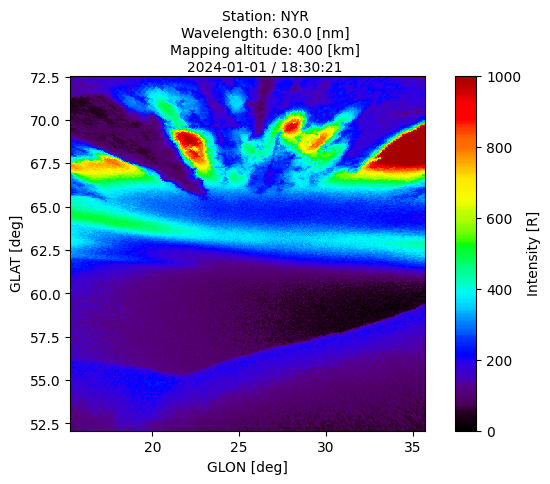

In [22]:
plot_omti_gmap('omti_asi_'+site+'_'+wl+'_image_abs_gmap_400',time=pytplot.time_double('2024-01-01/18:30:00'),z_min=0,z_max=1000)

The POES-19 satellite was located near Nyrola around 18:30 UT. To load the electron and proton fluxes measured by a suite of instruments (Space Environment Monitor, SEM) onboard the POES satellites, use `pyspedas.poes.sem`:

09-Mar-25 03:39:21: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2024/
09-Mar-25 03:39:22: File is current: poes_data/noaa19/sem2_fluxes-2sec/2024/noaa19_poes-sem2_fluxes-2sec_20240101_v01.cdf


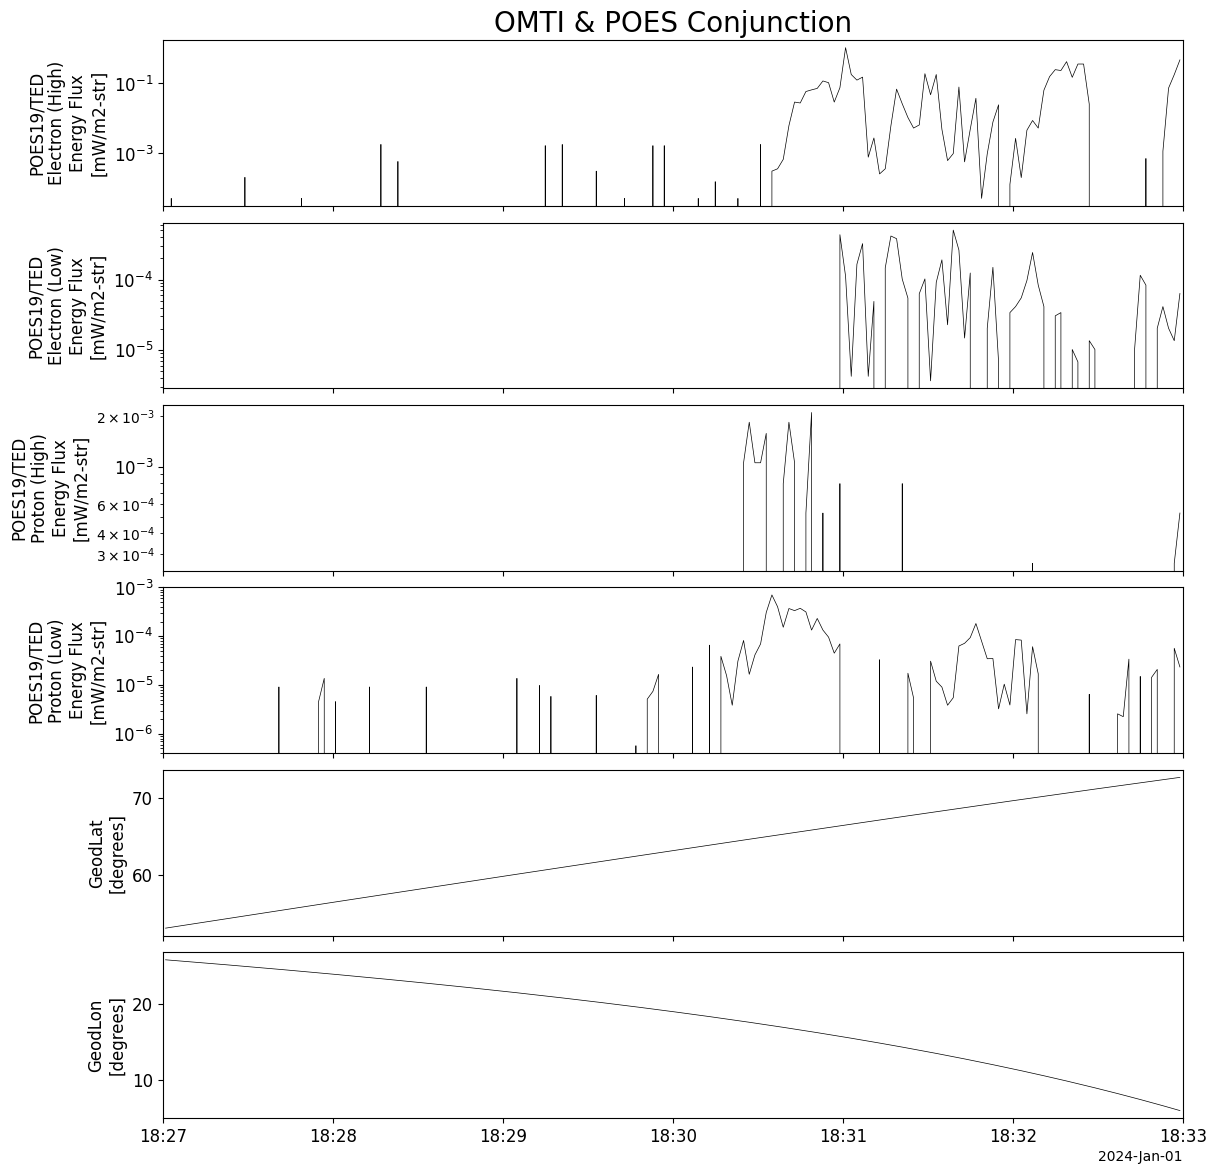

In [23]:
trange_omti = ['2024-01-01/18:00:00','2024-01-01/19:00:00']
probe = 'noaa19'
prefix = probe+'_'
# load data
pyspedas.poes.sem(trange=trange_omti,probe=probe,prefix=prefix)
# setting for plot
pytplot.timespan('2024-01-01/18:27:00',6,keyword='minutes')
pytplot.options(prefix+'ted_ele_tel0_hi_eflux','ytitle','POES19/TED\nElectron (High)\nEnergy Flux')
pytplot.options(prefix+'ted_ele_tel0_low_eflux','ytitle','POES19/TED\nElectron (Low)\nEnergy Flux')
pytplot.options(prefix+'ted_pro_tel0_hi_eflux','ytitle','POES19/TED\nProton (High)\nEnergy Flux')
pytplot.options(prefix+'ted_pro_tel0_low_eflux','ytitle','POES19/TED\nProton (Low)\nEnergy Flux')
pytplot.tplot_options('title','OMTI & POES Conjunction')
# plot
tplot([prefix+'ted_ele_tel0_hi_eflux',
       prefix+'ted_ele_tel0_low_eflux',
       prefix+'ted_pro_tel0_hi_eflux',
       prefix+'ted_pro_tel0_low_eflux',
       prefix+'lat',prefix+'lon'],
      ysize=14)

---
### 2.4. Data-load modules other than ERG/Arase 
PySPEDAS provides load modules for projects other than ERG (For more details about data-load modules of other projects, please visit https://github.com/spedas/pyspedas/tree/master/pyspedas/projects).

#### 2.4.1. OMNI Database (solar wind & geomagnetic indices)
Solar wind parameters and geomagnetic indices (AE and SYM/AYM indices) from the OMNI database can be loaded with `pyspedas.omni.load`:

09-Mar-25 03:39:23: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2023/
09-Mar-25 03:39:24: File is current: omni_data/hro_1min/2023/omni_hro_1min_20230401_v01.cdf
09-Mar-25 03:39:24: Integer data values for variable AE_INDEX are all fillval (99999).
09-Mar-25 03:39:24: Integer data values for variable AL_INDEX are all fillval (99999).
09-Mar-25 03:39:24: Integer data values for variable AU_INDEX are all fillval (99999).


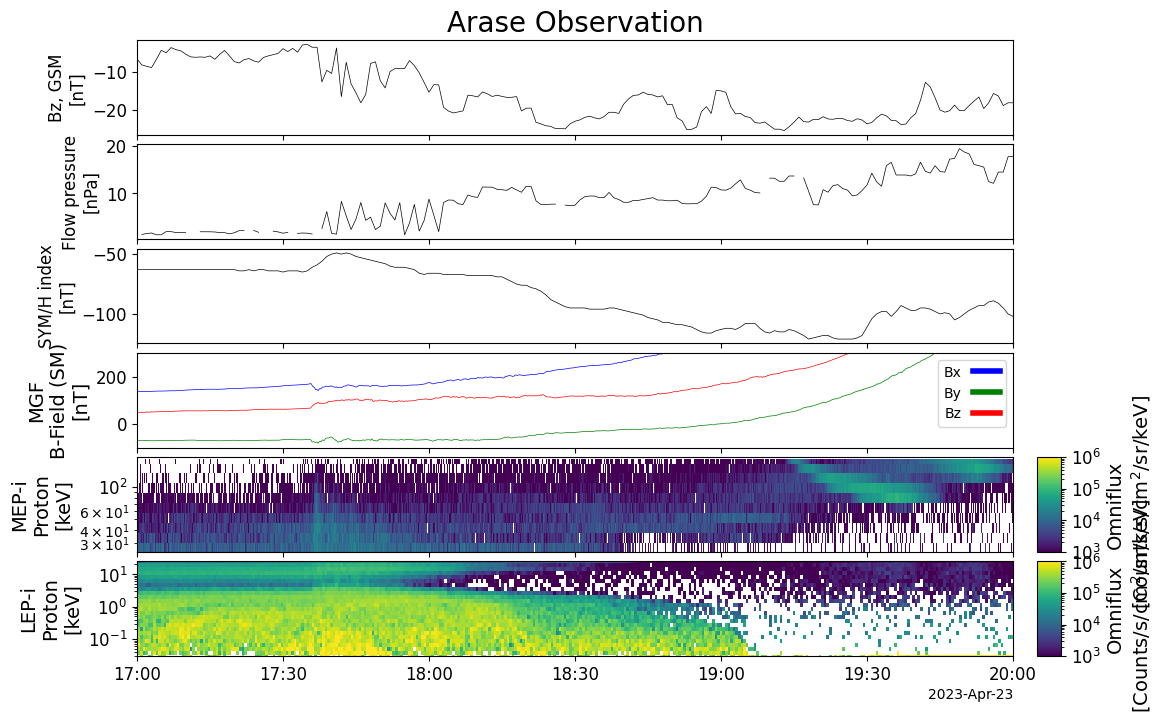

In [24]:
pyspedas.omni.load(trange=trange) # pyspedas.omni.data is the same function (data is another name of load defined in __init__.py)
pytplot.timespan('2023-04-23/17:00:00',3,keyword='hours')
pytplot.tplot_options('title','Arase Observation')
tplot(['BZ_GSM','Pressure','SYM_H','erg_mgf_l2_mag_8sec_sm','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO'])

 - `BZ_GSM`: Z-component of the interplanetary (L1 point) magnetic field in the Geocentric Solar Magnetic (GSM) coordinates in nT [time]
 - `SYM_H`: The SYM-H index, which is a proxy of geomagnetic activity in nT [time]
 
#### 2.4.2. Geomagnetic indices
You can also load the Dst and AE indices from World Data Center for Geomagnetism, Kyoto, using `pyspedas.kyoto`:

09-Mar-25 03:39:26: File is current: pydata/geom_indices/kyoto/dst_final/201709/index.html
09-Mar-25 03:39:26: 
            ******************************
            The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
            are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
            the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
            [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
            make the Dst index available.
            ******************************
        


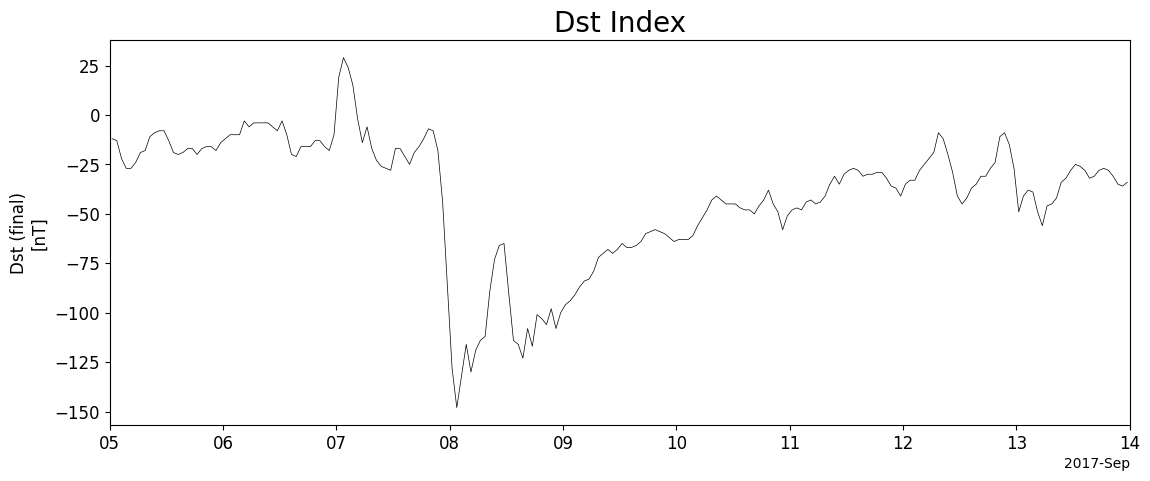

In [25]:
from pyspedas import kyoto
pytplot.timespan('2017-09-05',9,keyword='days')
kyoto.dst(trange=['2017-09-05','2017-09-14'])
#kyoto.load_ae(trange=['2017-09-05','2017-09-14')
pytplot.tplot_options('title','Dst Index')
pytplot.options('kyoto_dst','ysubtitle','[nT]')
tplot(['kyoto_dst']) 

 - Data of the AE indices seem to include bad time labels. Plots are not correctly shown.
 
 The Kp index (geomagnetic disturbance at sub-auroral latitudes) and the F10.7 index (a proxy of the solar radiation) can be loaded with `pyspedas.noaa_load_kp`.

09-Mar-25 03:39:26: Loading geomagnetic index data from ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/KP_AP/
09-Mar-25 03:39:28: File '2017' has not been modified since last download


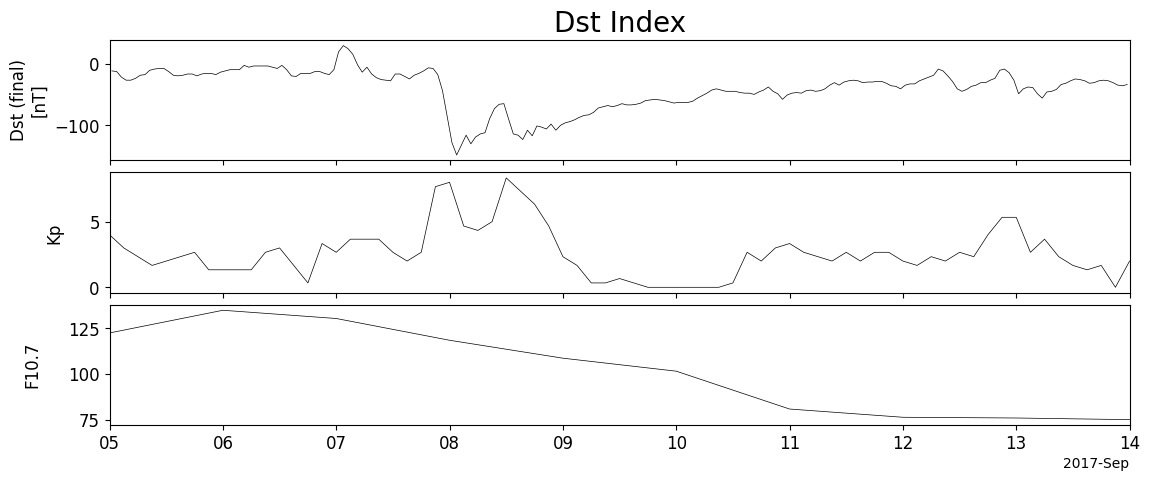

In [26]:
pyspedas.noaa_load_kp(trange=['2017-09-05','2017-09-14'])
tplot(['kyoto_dst','Kp','F10.7'])
pytplot.tplot_options('title','Indices')

  - The Kp index is provided by GeoForschungsZentrum (GFZ) Potzdam.
      - ap index: a linear scale version of the Kp index.
      - Ap index: an averaged value of the ap index over a day.
      - Cp, Cp9 indices: corresponding to summation of the ap index over a day.
  - The F10.7 index is provided by National Research Council of Canada in partnership with the Natural Resources Canada.

#### 2.4.3. Van Allen Probes (RBSPs)
Van Allen Probes are twin spacecraft that explore the radiation belts in the inner magnetosphere (https://vanallenprobes.jhuapl.edu/).
 - CDF files of EMFISIS can be directly downloaded from https://emfisis.physics.uiowa.edu/data/index. 
 - CDF files of EFW can be directly downloaded from https://www.space.umn.edu/rbspefw-data/.
 - CDF files of ECT can be directly downloaded from https://rbsp-ect.newmexicoconsortium.org/science/DataDirectories.php.
 - CDF files of RBSPICE can be directly downloaded from (probe A) https://rbspicea.ftecs.com/ and (probe B) https://rbspiceb.ftecs.com/.

In [27]:
import pytplot
import pytplot.tplot as tplot
from pyspedas.rbsp import emfisis, efw, hope, mageis,rept
trange_rbsp = ['2015-03-17','2015-03-19']
pytplot.timespan('2015-03-17',2,keyword='days')
# load OMNI data
pyspedas.omni.load(trange=trange_rbsp)
# load RBSP data
emfisis(trange=trange_rbsp,probe='a',prefix='rbspa_emfisis_',level='l3')                 # 4-sec averaged magnetic fields and spacecraft positions
efw(trange=trange_rbsp,probe='a',prefix='rbspa_efw_',level='l2',datatype='spec')         # E and B power spectra in the VLF range
hope(trange=trange_rbsp,probe='a',prefix='rbspa_hope_',level='l3',datatype='pitchangle') # electron and ion flux[time x energy x pitch angle]
mageis(trange=trange_rbsp,probe='a',prefix='rbspa_mageis_',level='l3')                   # electron flux[time x pitch angle x energy]
rept(trange=trange_rbsp,probe='a',prefix='rbspa_rept_',level='l3')                       # electron flux[time x pitch angle x energy]

09-Mar-25 03:39:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2015/
09-Mar-25 03:39:29: File is current: omni_data/hro_1min/2015/omni_hro_1min_20150301_v01.cdf
09-Mar-25 03:39:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2015/
09-Mar-25 03:39:31: File is current: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2015/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20150317_v1.3.4.cdf
09-Mar-25 03:39:32: File is current: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2015/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20150318_v1.3.4.cdf
09-Mar-25 03:39:32: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l2/efw/spec/2015/
09-Mar-25 03:39:33: File is current: rbsp_data/rbspa/l2/efw/spec/2015/rbspa_efw-l2_spec_20150317_v02.cdf
09-Mar-25 03:39:34: File is current: rbsp_data/rbspa/l2/efw/spec/2015/rbspa_efw-l2_spec_20150318_v02.cdf
09-Mar-25 03:39:35: Downloading remote index

['rbspa_rept_FEDU',
 'rbspa_rept_FPDU',
 'rbspa_rept_FEDU_0to180',
 'rbspa_rept_FEDU_180to360',
 'rbspa_rept_FPDU_0to180',
 'rbspa_rept_FPDU_180to360',
 'rbspa_rept_FEDU_Unbinned_0to180',
 'rbspa_rept_FEDU_Unbinned_0to360',
 'rbspa_rept_FPDU_Unbinned_0to180',
 'rbspa_rept_FPDU_Unbinned_0to360',
 'rbspa_rept_FPDU_Unbinned_LightMask_0to360',
 'rbspa_rept_FPDU_Unbinned_Light_Flag',
 'rbspa_rept_L_star',
 'rbspa_rept_L',
 'rbspa_rept_I',
 'rbspa_rept_B_Calc',
 'rbspa_rept_B_Eq',
 'rbspa_rept_MLT',
 'rbspa_rept_MLAT',
 'rbspa_rept_Position']

09-Mar-25 03:39:51: Length of trace options (1) smaller than number of traces (12)
09-Mar-25 03:39:51: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pytplot/MPLPlotter/lineplot.py:235: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = this_axis.legend(loc=legend_location, fontsize=legend_size, shadow=legend_shadow, title=legend_title,

09-Mar-25 03:39:51: Length of trace options (1) smaller than number of traces (25)
09-Mar-25 03:39:51: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pytplot/MPLPlotter/lineplot.py:235: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = this_axis.legend(loc=legend_location, fontsize=legend_size, shadow=legend_shadow, title=legend_title,



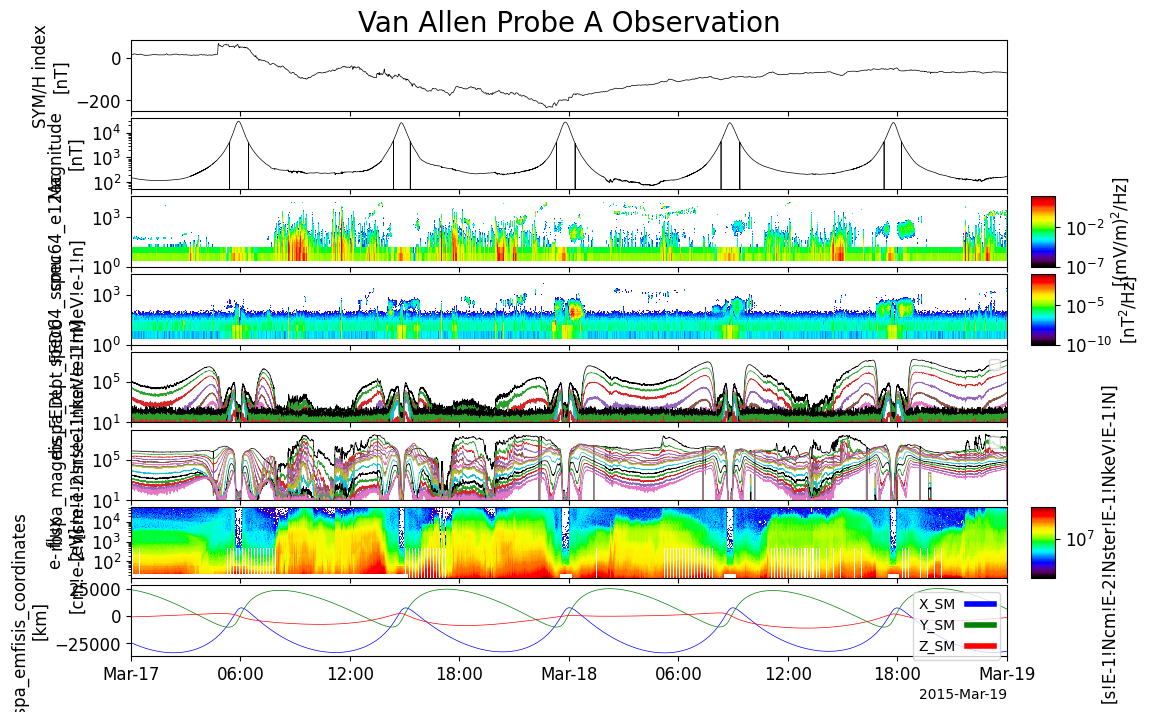

In [28]:
# setting for plot of RBSP data
from pyspedas.rbsp import rbspice
pytplot.options('rbspa_emfisis_Magnitude','ylog',1)
pytplot.options('rbspa_mageis_FEDU','labels','')
pytplot.options('rbspa_mageis_FEDU','yrange',[1.e1,1.e8])
pytplot.options('rbspa_rept_FEDU','labels','')
pytplot.options('rbspa_rept_FEDU','yrange',[1.e1,1.e8])
pytplot.options('rbspa_efw_spec64_e12ac','ylog',1)
pytplot.options('rbspa_efw_spec64_e12ac','yrange',[1.e0,2.e4])
pytplot.options('rbspa_efw_spec64_e12ac','zrange',[1.e-7,1e2])
pytplot.options('rbspa_efw_spec64_scmu','ylog',1)
pytplot.options('rbspa_efw_spec64_scmu','yrange',[1.e0,2.e4])
pytplot.options('rbspa_efw_spec64_scmu','zrange',[1.e-10,1e-1])
pytplot.tplot_options('title','Van Allen Probe A Observation')
# plot
# Note that the second dimension of the flux array (pitch angle) is integrated in the plot
tplot(['SYM_H','rbspa_emfisis_Magnitude','rbspa_efw_spec64_e12ac','rbspa_efw_spec64_scmu','rbspa_rept_FEDU','rbspa_mageis_FEDU','rbspa_hope_FEDO','rbspa_emfisis_coordinates'])

 - Note that the second dimension of the REPT and MagEIS 3-D flux data [time x pitch angle x energy] is integrated and the 2-D integrated fluxes [time x energy] will be shown if you use tplot module for them. 
 - Conversion of the EFW electric field from the mGSE coordinates to the GSE coordinates is discussed in [Apendix](#Conversion-from-mGSE-to-GSE).

#### 2.4.4. GOES satellite (geosynchronous satellite)
GOES series are geosynchronous satellites operated by NOAA. You can load data from the instruments onboard GOES using `pyspedas.goes.load` with the `instrument` option. The orbit data can be obtained using `pyspedas.goes.load_orb`.
- To load the magnetic field data measured by GOES-15 or older, use `pyspedas.goes.load` with the `instrument` option of 'fgm' and the `datatype` option of '512ms'/'full', '5min' and '1min' ('1min' only for GOES 13 and 15).
- `pyspedas.goes.load` accepts `instrument` of 'fgm', 'eps', 'epead', 'maged', 'magpd', 'hepad', and 'xrs' for GOES =<15. 
- To load the magnetic field data measured by GOES-16 or newer (https://www.ngdc.noaa.gov/stp/satellite/goes-r.html), use `pyspedas.goes.load` with the `instrument` option of 'mag' and the `datatype` option of 'hi'/'full'/'0.1sec'/'hires' or 'low'/'avg'.
- `pyspedas.goes.load` accepts `instrument` of 'mag', 'euvs', 'mpsh', 'sgps', and 'xrs' for GOES =>16.


09-Mar-25 03:39:55: Downloading remote index: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/avg/2015/03/goes15/netcdf/
09-Mar-25 03:40:00: File is current: goes_data/avg/2015/03/goes15/netcdf/g15_magneto_1m_20150301_20150331.nc
09-Mar-25 03:40:01: Downloading remote index: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/avg/2015/03/goes15/netcdf/
09-Mar-25 03:40:03: File is current: goes_data/avg/2015/03/goes15/netcdf/g15_magneto_1m_20150301_20150331.nc
09-Mar-25 03:40:04: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/goes/goes15/orbit/2015/
09-Mar-25 03:40:05: File is current: goes_data/goes15/orbit/2015/goes15_ephemeris_ssc_20150101_v01.cdf


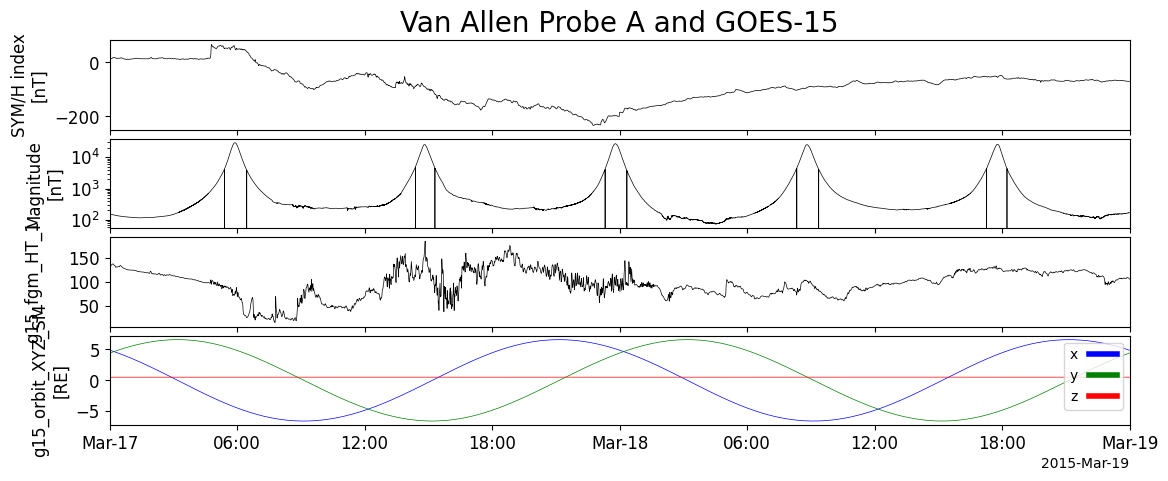

In [29]:
pyspedas.goes.load(instrument='fgm',trange=trange_rbsp,datatype='1min',probe=15)
pyspedas.goes.load(instrument='fgm',trange=trange_rbsp,datatype='1min',probe=15)
pyspedas.goes.load_orbit(trange=trange_rbsp,probe=15)
pytplot.tplot_options('title','Van Allen Probe A and GOES-15')
tplot(['SYM_H','rbspa_emfisis_Magnitude','g15_fgm_HT_1','g15_orbit_XYZ_SM']) #g15_fgm_HT_1: magnitude of the magnetic field measured by outboard fluxgate magnetometer


 - Earthward Poleward Normal (EPN) coordinates: E = earthward, P = northward, N = eastward.
 - Body Reference Frame (BRF) coordinates: spacecraft coordinates.
 - Vehicle Dipole Horizon (VDH) coordinates: V = D x H direction (outward), D = H x R direction (eastward), where R is the position vector , H = anti-parallel to the dipole moment (Z direction in the SM coordinates)

#### Tips for how to learn the usage of data-load and other modules

1. You can show the details of modules or functions by using `?` or `help` command.
2. A command line is possibly and automatically filled with the `Tab` key. You can see some options are suggested.
3. You can show a tooltip with `Shift`+`Tab`+`Tab` key.

In [30]:
# show help message
pyspedas.omni?
help(pyspedas.omni)

Help on package pyspedas.projects.omni in pyspedas.projects:

NAME
    pyspedas.projects.omni

PACKAGE CONTENTS
    config
    load
    tests (package)

DATA
    datasets = functools.partial(<function find_datasets at 0x7f84d6d889d0...

FILE
    /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pyspedas/projects/omni/__init__.py




---

## 3. Analysis of the data contained in tplot variable
In the above tutorial, we have plotted "tplot variable" to visualize the Arase data. Actually tplot variable is an <u>Xarray-DataArray</u> object with standardized attributes that PyTtplot knows how tot work with them.

 - `Xarray`: Xarray is a library for handling a multi-dimensional array. (an extension of `pandas`, which can handle only 1D or 2D array). From a Xarray object, you can retrieve numpy.ndarray and then you can use functions for numpy.ndarray.
 - `DataArray` class: DataArray provides a wrapper around numpy ndarrays that uses labeled dimensions and coordinates to support metadata aware operations.


### 3.1. Retrieve an actual variable from tplot variable
To obtain the actual variable, there is a helper function `pytplot.get_data` that extracts data (a <u>named tuple</u> of numpy.ndarrays) from the tplot variables. The named tuple retrieved from tplot variable has attribute-names (field) like 'times', 'y', 'v', 'v1', 'v2', 'v3' according to the dimension of the data. You can confirm the attribute names from the `_fields` attribute of the named tuple.

In [31]:
data = pytplot.get_data('erg_pwe_efd_l2_spec_spectra') # data is a tuple containing a couple of numpy.ndarrays
# extract numpy.ndarrays from each element of the named tuple
time = data[0]    # UNIX time labels in sec
spec = data[1]    # values of the power spectral density of 2-D array [time x frequency] in mV^2/m^2/Hz 
freq = data[2]    # frequency label for y-axis in Hz
# or you can also use attribute names:
print(data._fields) #confirm the attribute names
time = data.times
spec = data.y
freq = data.v
# check size of the numpy.ndarray
print(time.shape) #shape method returns a tuple containing the size of each dimension
print(spec.shape)
print(freq.shape)

('times', 'y', 'v')
(172793,)
(172793, 100)
(100,)


The time label is a numpy.ndarray of seconds since 1970 (UNIX time) in the data type of `float64`. The UNIX time can be converted to a readable text format by using `pytplot.time_string`:

In [32]:
print(time[0])                      # show the first time label in the float64 data type
print(pytplot.time_string(time[0])) # show the first time label in the sting data type
print(pytplot.time_string(time[0],fmt='%Y%B%d')) # format of output like '%Y-%m-%d %H:%M:%S.%f' same with the format specifier of the C-language.

1682208008.968672
2023-04-23 00:00:08.968672
2023April23


#### 3.1.1. For PySPEDAS freaks
You can directly access the actual variable (numpy.ndarray), which is stored in a global OrderedDict object called "data_quants":

In [33]:
pytplot.data_quants['erg_pwe_efd_l2_spec_spectra']

<xarray.DataArray 'erg_pwe_efd_l2_spec_spectra' (time: 172793, v_dim: 100)> Size: 69MB
array([[7.6214492e-02, 7.7452892e-03, 5.5595243e-05, ..., 3.6986015e-04,
        4.4569492e-04, 2.6548347e-03],
       [1.0765585e+00, 3.0834548e-02, 4.4160869e-04, ..., 2.9379036e-04,
        5.0007791e-04, 2.6548348e-04],
       [2.1480165e+00, 5.4832447e-02, 1.2446223e-04, ..., 6.5771473e-04,
        8.8927831e-04, 8.3953241e-04],
       ...,
       [5.3955731e+00, 2.1829189e-01, 2.4833480e-05, ..., 3.6986015e-04,
        1.7743434e-04, 2.9787736e-04],
       [1.7062299e+00, 8.6903572e-02, 7.8530356e-06, ..., 5.2244135e-04,
        6.2956085e-04, 5.9434341e-04],
       [7.6214499e+00, 2.4492753e-01, 1.2446223e-04, ..., 6.5771473e-04,
        2.8121448e-04, 4.7210377e-04]], shape=(172793, 100), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1MB 2023-04-23T00:00:08.968672 ... 2023-...
    spec_bins  (v_dim) float32 400B 1.0 2.0 3.0 4.0 ... 196.5 204.5 212.5 220.5
    v          (v_dim) float32 400B 1.0 2.0 3.0 4.0 ... 196.5 204.5 212.5 220.5
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'spectra', 'CATDESC': 'EFD onboard s...
    data_att:      {'coord_sys': '', 'units': '(mV/m)^2/Hz', 'depend_1_units'...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In the output above, we can find three kind of the coordinates ('time', 'spec_bin', 'v'), which correspond to the time and frequency of the dynamic power spectra of EFD. You can access the pure underlying numpy.ndarrays using `pytplot.data_quants`:

In [34]:
# directly obtain numpy.ndarray from tplot variable
time = pytplot.data_quants['erg_pwe_efd_l2_spec_spectra'].coords['time'].values
spec = pytplot.data_quants['erg_pwe_efd_l2_spec_spectra'].values
freq = pytplot.data_quants['erg_pwe_efd_l2_spec_spectra'].coords['v'].values
# type of the variables
print(type(time))
print(type(spec))
print(type(freq))
# size of the numpy.ndarray
print(time.shape) #shape method returns a tuple containing the size of each dimension
print(spec.shape)
print(freq.shape)
# data type of the numpy.ndarray
print(time.dtype)
print(spec.dtype)
print(freq.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(172793,)
(172793, 100)
(100,)
datetime64[ns]
float32
float32


---
### 3.2. Handle numpy.ndarray
If you are familiar with numpy.ndarray, you can skip this subsection 3.2.

numpy.ndarray is a multi-dimensional array supported  by Numpy with a single data type (e.g., `int64`, `float64`, `complex128`). Below examples demonstrate how to handle numpy.ndarrays.

In [35]:
# import necessary modules
import numpy as np

# create test data
A  = np.arange(2*3)                 # create a 1D array of 0, 1, 2, ..., 5. Same with x  = np.linspace(0,5,6)
B  = A.reshape([2,3])               # create a 2D array by transforming A
C  = np.zeros([2,10],dtype='int64') # create a 2D array with all elements 0 (int64)
D  = np.ones_like(C)                # create an array of 1 with the same shape with C
D2 = np.stack([D,D,D])              # concatenate arrays with a new dimension created
D3 = np.concatenate([D,D,D])        # concatenate arrays in the first dimension 
E  = np.array([0.0,0.0,0.1,0.2,0.3,0.2,0.1]) # creates numpy.ndarray with numpy.array()
F  = np.array([np.inf,np.nan,0.1,0.2,0.3])   # np.inf = infinity, np.nan = NaN
print('A: ' ,A )
print('B: ' ,B ) 
print('C: ' ,C )
print('D: ' ,D )
print('D2: ',D2)
print('D3: ',D3)
print('E: ' ,E )

# check the propety of numpy.ndarray
print('type(A): ',type(A)) # type function of Python returns the type of the object
print('A.size : ',A.size)  # size attribute : the total number of the elements in the array
print('B.shape: ',B.shape) # shape attribute: a tuple of the data length of each dimension 
print('C.dtype: ',C.dtype) # dtype attribute: data type
print('D.dtype: ',D.dtype)
print('D.shape: ',D.shape)
print('D2.shape: ',D2.shape)
print('D3.shape: ',D3.shape)
print('E.dtype: ',E.dtype)
# Note that the definition of index of arrays in IDL is different:
# IDL> a = [[0,1,2],[3,4,5]]
# IDL> help, a
# A           INT = Array[3,2]
# IDL> print, a
#             0  1  2
#             3  4  5

# index and slicing
# create a view of original array
A_slice = A[2:5] # only indices of 2-4
print(A,A_slice)
A_slice[0:2] = 0 # only indices of 0-1
print('A,A_slice: ',A,A_slice) # A is changed

# masking
A2 = A[A < 4] # A < 4 is an array of the bool type
print('A<4: ',A<4)
print('A,A2: ',A,A2)

# where statement
print('A,np.where((A > 0) a (A < 8)):',A,np.where((A > 0) & (A < 8)))

# index of max and min values
print('E,E.max(),E.argmax(): ',E, E.max(), E.argmax())
print('E,E.min(),E.argmin(): ',E, E.min(), E.argmin())

# finite values
print(F, np.isfinite(F))

# universal function
print('sqrt(A): '    ,np.sqrt(A))
print('abs(A): '     ,np.abs([-1.0,-2.0,-3.0]))
print('sin(A): '     ,np.sin(A))
print('cos(A): '     ,np.cos(A))
print('atan(-1,-1): ',np.arctan2(-1,-1) * 180/np.pi)
print('exp(1): '     ,np.exp(1.0))
print('log(e): '     ,np.log(np.exp(1)))
print('1og10(10): '  ,np.log10(10.0))

# calculation of array
G1 = np.array([[1,2,3,4],
               [5,6,7,8]])
G2 = np.array([[1,1,1,1],
               [2,2,2,2]])
G3 = np.array([[1,1],
               [2,2],
               [3,3],
               [4,4]])
print('G1+G2 : ',G1+G2)
print('G1*G2 : ',G1*G2)
print('G1/G2 : ',G1/G2)
print('G1*100: ',G1*100)
print('G1@G3 : ',G1@G3)

A:  [0 1 2 3 4 5]
B:  [[0 1 2]
 [3 4 5]]
C:  [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
D:  [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
D2:  [[[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]]

 [[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]]

 [[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]]]
D3:  [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
E:  [0.  0.  0.1 0.2 0.3 0.2 0.1]
type(A):  <class 'numpy.ndarray'>
A.size :  6
B.shape:  (2, 3)
C.dtype:  int64
D.dtype:  int64
D.shape:  (2, 10)
D2.shape:  (3, 2, 10)
D3.shape:  (6, 10)
E.dtype:  float64
[0 1 2 3 4 5] [2 3 4]
A,A_slice:  [0 1 0 0 4 5] [0 0 4]
A<4:  [ True  True  True  True False False]
A,A2:  [0 1 0 0 4 5] [0 1 0 0]
A,np.where((A > 0) a (A < 8)): [0 1 0 0 4 5] (array([1, 4, 5]),)
E,E.max(),E.argmax():  [0.  0.  0.1 0.2 0.3 0.2 0.1] 0.3 4
E,E.min(),E.argmin():  [0.  0.  0.1 0.2 0.3 0.2 0.1] 0.0 0
[inf nan 0.1 0.2 0.3] [False False  Tr

---
### 3.3. Create a tplot variable
To create a new tplot variable, use `pytplot.store_data`. Input data should be passed to `pytplot.store_data` as a dictionary in the 'data' option with appropriate keys:
 - y = 1-D array &rarr; 'pytplot.store_data('new name',data={'x':x,'y':y})'
 - y = 2-D array &rarr; 'pytplot.store_data('new name',data={'x':x,'y':y,'v':v})'
 - y = 3-D array &rarr; 'pytplot.store_data('new name',data={'x':x,'y':y,'v1':v1,'v2':v2})'
 
 An example of creating a tplot variable of a 1-D array is shown below:   

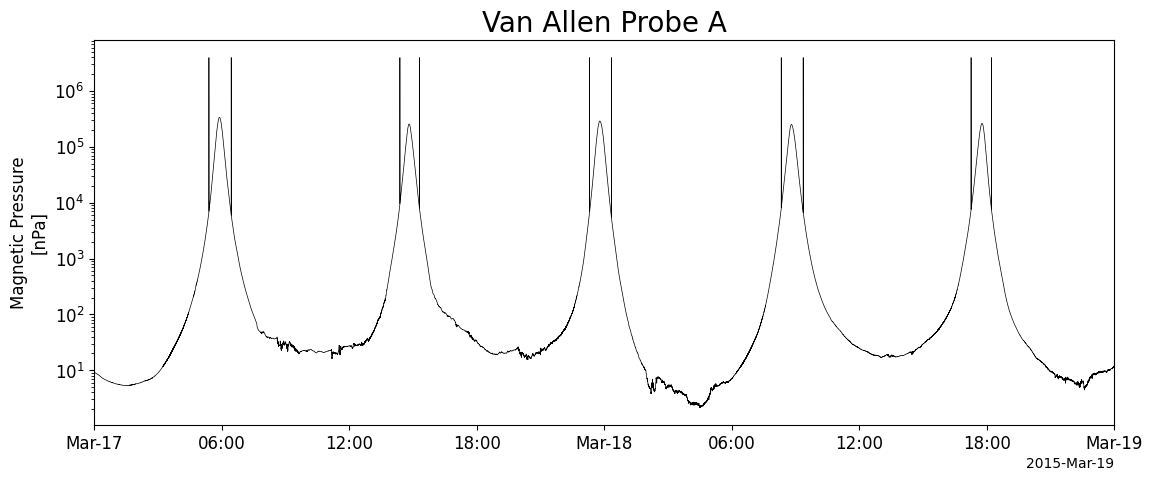

In [36]:
# import necessary module
import scipy.constants as const
# get numpy.array
dat  = pytplot.get_data('rbspa_emfisis_Magnitude')
time = dat.times
bt   = dat.y #magnitude of the magnetic field in nT
# calculate the magnetic pressure
Pmag = (bt*1.0e-9)**2.0 / 2.0 / const.mu_0 * 1.0e9 # in nPa
pytplot.store_data('Pmag',data={'x':time,'y':Pmag})
# set plot options
pytplot.options('Pmag','ylog',1)
pytplot.options('Pmag','ytitle','Magnetic Pressure')
pytplot.options('Pmag','ysubtitle','[nPa]')
# plot
pytplot.tplot_options('title','Van Allen Probe A')
tplot('Pmag')

 - {'key1':value1, 'key2':,value2, ...} is the dictionary type in Python.
 - Physical and mathematical constants and units obtained from `scipy.constants`: https://docs.scipy.org/doc/scipy/reference/constants.html

Another example creating a tplot varialbe of a 2-D array: 

09-Mar-25 03:40:09: <>:14: DeprecationWarning: invalid escape sequence '\c'

09-Mar-25 03:40:09: <>:17: DeprecationWarning: invalid escape sequence '\c'

09-Mar-25 03:40:09: <>:14: DeprecationWarning: invalid escape sequence '\c'

09-Mar-25 03:40:09: <>:17: DeprecationWarning: invalid escape sequence '\c'

09-Mar-25 03:40:09: /tmp/ipykernel_240094/2180677096.py:14: DeprecationWarning: invalid escape sequence '\c'
  pytplot.options('rbspa_rept_FEDU_pa08','ytitle','RBSP-A\nECT-REPT\nElectron\n\u03B1 = '+str(pa[8])+'$^\circ$')

09-Mar-25 03:40:09: /tmp/ipykernel_240094/2180677096.py:17: DeprecationWarning: invalid escape sequence '\c'
  pytplot.options('rbspa_rept_FEDU_pa08','ytitle','RBSP-A\nECT-REPT\nElectron\n\u03B1 = '+str(pa[8])+'$^\circ$')



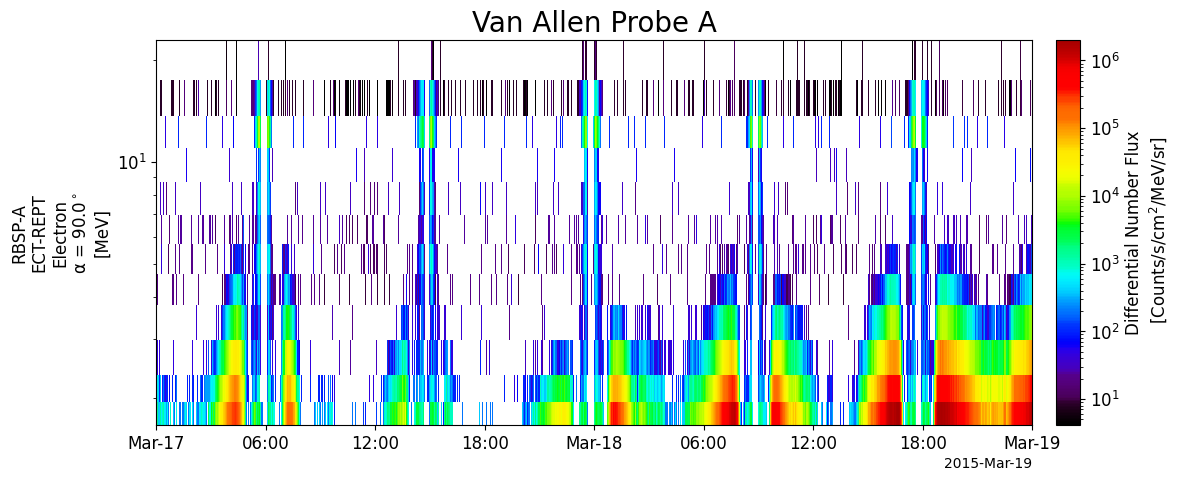

Pitch angle [deg]:  90.0
Unit of flux: cm!e-2!ns!e-1!nsr!e-1!nMeV!e-1!n


In [37]:
# Plot RBSP-A/ECT-REPT energy spectra
# extract data of PA = 90 deg 
dat    = pytplot.get_data('rbspa_rept_FEDU')
mdat   = pytplot.get_data('rbspa_rept_FEDU',metadata=True) # get a dictionary of meta data
time   = dat.times
flux   = dat.y  # electron differential number flux in Counts/s/cm^2/MeV/sr
pa     = dat.v1 # pitch angle in degree
energy = dat.v2 # energy in MeV
pytplot.store_data('rbspa_rept_FEDU_pa08',data={'x':time,'y':flux[:,8,:],'v':energy})
# setting for plot
pytplot.options('rbspa_rept_FEDU_pa08','spec',1)
pytplot.options('rbspa_rept_FEDU_pa08','ylog',1)
pytplot.options('rbspa_rept_FEDU_pa08','zlog',1)
pytplot.options('rbspa_rept_FEDU_pa08','ytitle','RBSP-A\nECT-REPT\nElectron\n\u03B1 = '+str(pa[8])+'$^\circ$')
pytplot.options('rbspa_rept_FEDU_pa08','ysubtitle','[MeV]')
pytplot.options('rbspa_rept_FEDU_pa08','zlog',1)
pytplot.options('rbspa_rept_FEDU_pa08','ytitle','RBSP-A\nECT-REPT\nElectron\n\u03B1 = '+str(pa[8])+'$^\circ$')
pytplot.options('rbspa_rept_FEDU_pa08','ztitle','Differential Number Flux')
pytplot.options('rbspa_rept_FEDU_pa08','zsubtitle','[Counts/s/cm^2/MeV/sr]')
# plot
tplot('rbspa_rept_FEDU_pa08')
print('Pitch angle [deg]: ',pa[8])
print('Unit of flux:', mdat['CDF']['VATT']['UNITS']) # ['key'] returns the value of 'key'

---
### 3.4. Useful PySPEDAS tools

Useful tools of PySPEDAS, PyTplot, and ERG-SC Plugin can be found in below links:
 - https://github.com/spedas/pyspedas/tree/master/pyspedas/analysis
 - https://github.com/spedas/pyspedas/tree/master/pyspedas/cotrans_tools
 - https://github.com/spedas/pyspedas/tree/master/pyspedas/geopack
 - https://github.com/MAVENSDC/PyTplot/tree/master/pytplot
 - https://github.com/MAVENSDC/PyTplot/tree/master/pytplot/tplot_math
 - https://github.com/ergsc-devel/pyspedas_plugin/tree/master/ergpyspedas/erg/satellite/erg/particle
 - https://github.com/ergsc-devel/pyspedas_plugin/tree/master/ergpyspedas/util

Here examples of some useful tools in above links are shown.

#### 3.4.1. Particle spectrum
`ergpyspedas` provides the ERG part-products to calculate energy and pitch angle spectra of particle fluxes and calculate particle moment values.
 - `erg_xep_part_products`
 - `erg_hep_part_products`
 - `erg_mep_part_products`: for MEP-e and MEP-i Normal mode data. Note that the acceptable ion species are H+ and O+ only.
 - `erg_lep_part_products`: for LEP-e and LEP-i Normal mode data. Note that the acceptable ion species are H+, He+, and O+

These modules have been merged to the main distribution of PySPEDAS [(link)](https://github.com/spedas/pyspedas/tree/master/pyspedas/projects/erg/satellite/erg/particle). They can be used with common arguments and options, similar to those of the (original) IDL version. Several spectrum plots using part_products are demonstrated below to show how to use the package for Arase's particle data.

In [38]:
# import modules
import pytplot
from pytplot import tplot, options, tplot_options, tplot_names, del_data, timespan
from ergpyspedas.erg import mgf, orb, mepi_nml, erg_mep_part_products
import numpy as np
# delete previous data
del_data('erg_*')
del_data('rbspa_*')
del_data('g15_*')
del_data('isee_vlf*')
del_data('isee_induction*')
# settings
trange = ['2023-04-24/07:40:00','2023-04-24/09:20:00']
timespan('2023-04-24/07:40:00',100,keyword='minutes')
# load data
var_orb  = orb(trange=trange)
var_mgf  = mgf(trange=trange)
var_mepi = mepi_nml(trange=trange,datatype='3dflux') #load 3d velocity distributions of ions

09-Mar-25 03:40:10: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
09-Mar-25 03:40:10: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230424_v04.cdf
09-Mar-25 03:40:10: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2023/04/
09-Mar-25 03:40:10: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/04/erg_mgf_l2_8sec_20230424_v04.05.cdf
09-Mar-25 03:40:10: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepi/l2/3dflux/2023/04/
09-Mar-25 03:40:10: File is current: erg_data/satellite/erg/mepi/l2/3dflux/2023/04/erg_mepi_l2_3dflux_20230424_v01_03.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac

09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FPDU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FHE2DU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FHEDU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FOPPDU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FODU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_FO2PDU contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - ion mass analyzer (MEP-i) Level-2 3D flux data']

PI:  ['Shoichiro Yokota']
Affiliation:  ['Osaka University']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-i data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepi

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


09-Mar-25 03:40:32: erg_mepi_l2_3dflux_count_raw_OPP contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_count_raw_O contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
09-Mar-25 03:40:32: erg_mepi_l2_3dflux_count_raw_O2P contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.


The part-product requires 3-D velocity distributions of particle fluxes (Level-2 3dflux data), the magnetic field in the DSI coordinates, and the spacecraft position in the GSE coordinates. Here MEP-i particle spectra and moment will be shown using the following data: 
 - `erg_mepi_l2_3dflux_FPDU`: 3-D velocity distributions of H+ measured by MEP-i.
 - `erg_mepi_l2_3dflux_FODU`: 3-D velocity distributions of O+ measured by MEP-i.
 - `erg_mgf_l2_mag_8sec_dsi`: magnetic field vectors in the DSI coordinates. The definition of DSI can be found [here](https://ergsc.isee.nagoya-u.ac.jp/assets/howto/ERG_Coordinate_System_202004.pdf).
 - `erg_orb_l2_pos_gse`: Arase's positions in the GSE coordinates.
 
 ##### Energy spectra for a limited range of the pitch angle 

In [39]:
# calculate energy spectra for limited pitch angles
# proton
var_mepi_et = erg_mep_part_products('erg_mepi_l2_3dflux_FPDU',          # 3-D velocity distributions of differential number flux
                                    species='hplus',                    # ion species ('hplus' or 'oplus')
                                    outputs='energy',                   # 'energy' = create energy spectra
                                    pitch=[80,110],                     # range of pitch angle for calculation in degree
                                    mag_name='erg_mgf_l2_mag_8sec_dsi', # magentic field in the DSI coordinate
                                    pos_name='erg_orb_l2_pos_gse',      # spacecraft position in the GSE coordinates
                                    trange=trange)
# oxygen
var_mepi_et = erg_mep_part_products('erg_mepi_l2_3dflux_FODU',
                                    species='oplus',
                                    outputs='energy',
                                    pitch=[80,110],
                                    mag_name='erg_mgf_l2_mag_8sec_dsi',
                                    pos_name='erg_orb_l2_pos_gse',
                                    trange=trange)

09-Mar-25 03:40:32: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:32: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:32: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:32: erg_orb_l2_pos_gse_pgs_temp copied to pos_pgs_temp
09-Mar-25 03:40:32: ['gse', 'gsm', 'sm']
09-Mar-25 03:40:32: Running transformation: subgse2gsm
09-Mar-25 03:40:32: Running transformation: subgsm2sm
09-Mar-25 03:40:32: Output variable: pos_pgs_temp
09-Mar-25 03:40:32: ['sm', 'gsm', 'gse', 'gei', 'j2000']
09-Mar-25 03:40:32: Running transformation: subsm2gsm
09-Mar-25 03:40:32: Running transformation: subgsm2gse
09-Mar-25 03:40:32: Running transformation: subgse2gei
09-Mar-25 03:40:32: Running transformation: subgei2j2000
09-Mar-25 03:40:32: Output variable: phism_tmp
09-Mar-25 03:40:32: wildcard_expand: No match

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************
J2000 --> DSI


09-Mar-25 03:40:36: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:36: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:36: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:36: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:36: erg_orb_l2_pos_gse_pgs_temp copied to pos_pgs_temp
09-Mar-25 03:40:36: ['gse', 'gsm', 'sm']
09-Mar-25 03:40:36: Running transformation: subgse2gsm
09-Mar-25 03:40:36: Running transformation: subgsm2sm
09-Mar-25 03:40:36: Output variable: pos_pgs_temp
09-Mar-25 03:40:36: ['sm', 'gsm', 'gse', 'gei', 'j2000']
09-Mar-25 03:40:36: Running transformation: subsm2gsm
09-Mar-25 03:40:36: Running transformation: subgsm2gse
09-Mar-25 03:40:36: Running transformation: subgse2gei
09-Mar-25 03:40:36: Running transformation: subgei2j2000
09-Mar-25 03:40:36: Output variable: phism_tmp
09-Mar-25 03:40:36: Downloading remote index:

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************
J2000 --> DSI


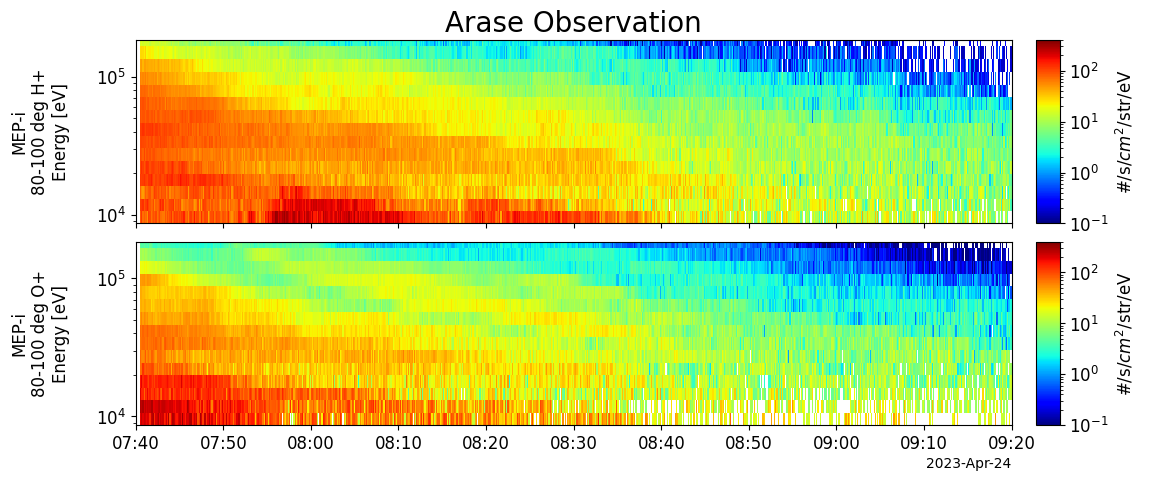

In [40]:
# plot the energy spectra
# setting for plot
# proton
options('erg_mepi_l2_3dflux_FPDU_energy_mag','ytitle','MEP-i\n80-100 deg H+\nEnergy [eV]')
options('erg_mepi_l2_3dflux_FPDU_energy_mag','zrange',[1.e-1,4.e2])
# oxygen
options('erg_mepi_l2_3dflux_FODU_energy_mag','ytitle','MEP-i\n80-100 deg O+\nEnergy [eV]')
options('erg_mepi_l2_3dflux_FODU_energy_mag','zrange',[1.e-1,4.e2])
# plot
tplot_options('title','Arase Observation')
tplot(['erg_mepi_l2_3dflux_FPDU_energy_mag','erg_mepi_l2_3dflux_FODU_energy_mag'])

##### Pitch angle distributions for a limited range of energy

In [41]:
# calculate pitch angle distributions
# proton
var_mepi_pad = erg_mep_part_products('erg_mepi_l2_3dflux_FPDU',
                                     species='hplus',
                                     outputs='pa',          # 'pa' = create pitch agnle distributions
                                     energy=[20000.,60000], # energy range for calculation in eV
                                     fac_type='xdsi',       #from DSI to FAC
                                     mag_name='erg_mgf_l2_mag_8sec_dsi',
                                     pos_name='erg_orb_l2_pos_gse',
                                     trange=trange)
# oxygen
var_mepi_pad = erg_mep_part_products('erg_mepi_l2_3dflux_FODU',
                                     species='oplus',
                                     outputs='pa',
                                     energy=[20000.,60000],
                                     fac_type='xdsi',
                                     mag_name='erg_mgf_l2_mag_8sec_dsi',
                                     pos_name='erg_orb_l2_pos_gse',
                                     trange=trange)

09-Mar-25 03:40:40: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:40: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:40: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:40: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:43: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:43: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
09-Mar-25 03:40:43: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
09-Mar-25 03:40:43: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp


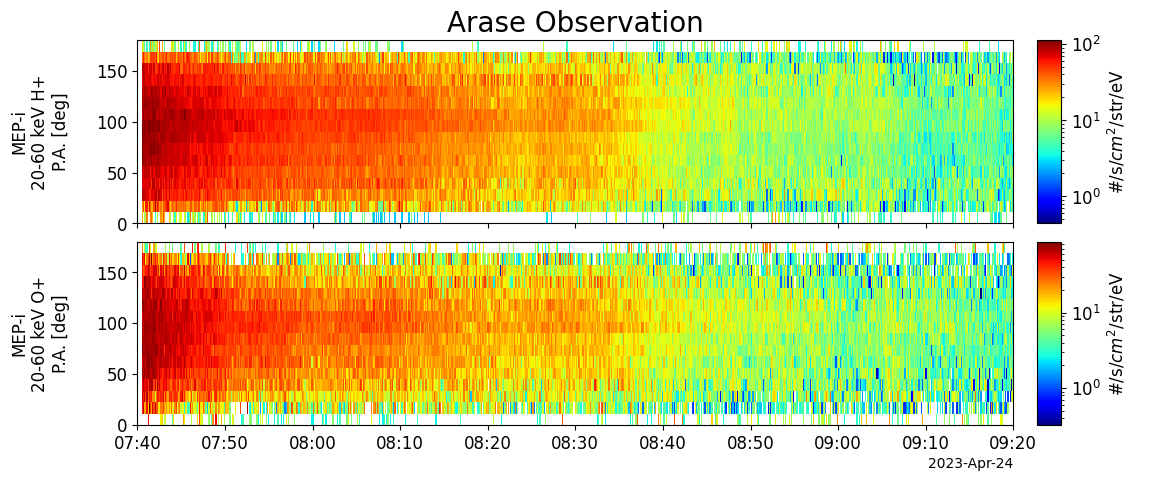

In [42]:
# plot the pitch angle distributions
# proton
options('erg_mepi_l2_3dflux_FPDU_pa','ytitle','MEP-i\n20-60 keV H+\nP.A. [deg]')
# oxygen
options('erg_mepi_l2_3dflux_FODU_pa','ytitle','MEP-i\n20-60 keV O+\nP.A. [deg]')
# plot
tplot(['erg_mepi_l2_3dflux_FPDU_pa','erg_mepi_l2_3dflux_FODU_pa'])

##### Particle moment for a limited range of energy 

In [43]:
# calculate particle density, velocity, pressure tensor, and temperature tensor



# xx, yy, zzの定義が不明



# proton
var_mepi_mom = erg_mep_part_products('erg_mepi_l2_3dflux_FPDU',
                                     species='hplus',                    # ion species ('hplus' or 'proton' or 'oplus')
                                     outputs='moments',                  # 'moments' = calculate ion moment
                                     mag_name='erg_mgf_l2_mag_8sec_dsi', # magnetic field in the DSI coordinate
                                     pos_name='erg_orb_l2_pos_gse',      # spacecraft position in the GSE fcoordinates
                                     energy=[20000,200000],              # energy range for calculation in eV
                                     trange=trange)
# oxygen
var_mepi_mom = erg_mep_part_products('erg_mepi_l2_3dflux_FODU',
                                     species='oplus',
                                     outputs='moments',
                                     mag_name='erg_mgf_l2_mag_8sec_dsi',
                                     pos_name='erg_orb_l2_pos_gse',
                                     energy=[20000,200000],
                                     trange=trange)

09-Mar-25 03:40:46: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted
09-Mar-25 03:40:48: erg_mepi_l2_3dflux_FPDU_eflux is currently not in pytplot.
09-Mar-25 03:40:48: erg_mepi_l2_3dflux_FPDU_eflux is currently not in pytplot.
09-Mar-25 03:40:48: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted
09-Mar-25 03:40:50: erg_mepi_l2_3dflux_FODU_eflux is currently not in pytplot.
09-Mar-25 03:40:50: erg_mepi_l2_3dflux_FODU_eflux is currently not in pytplot.


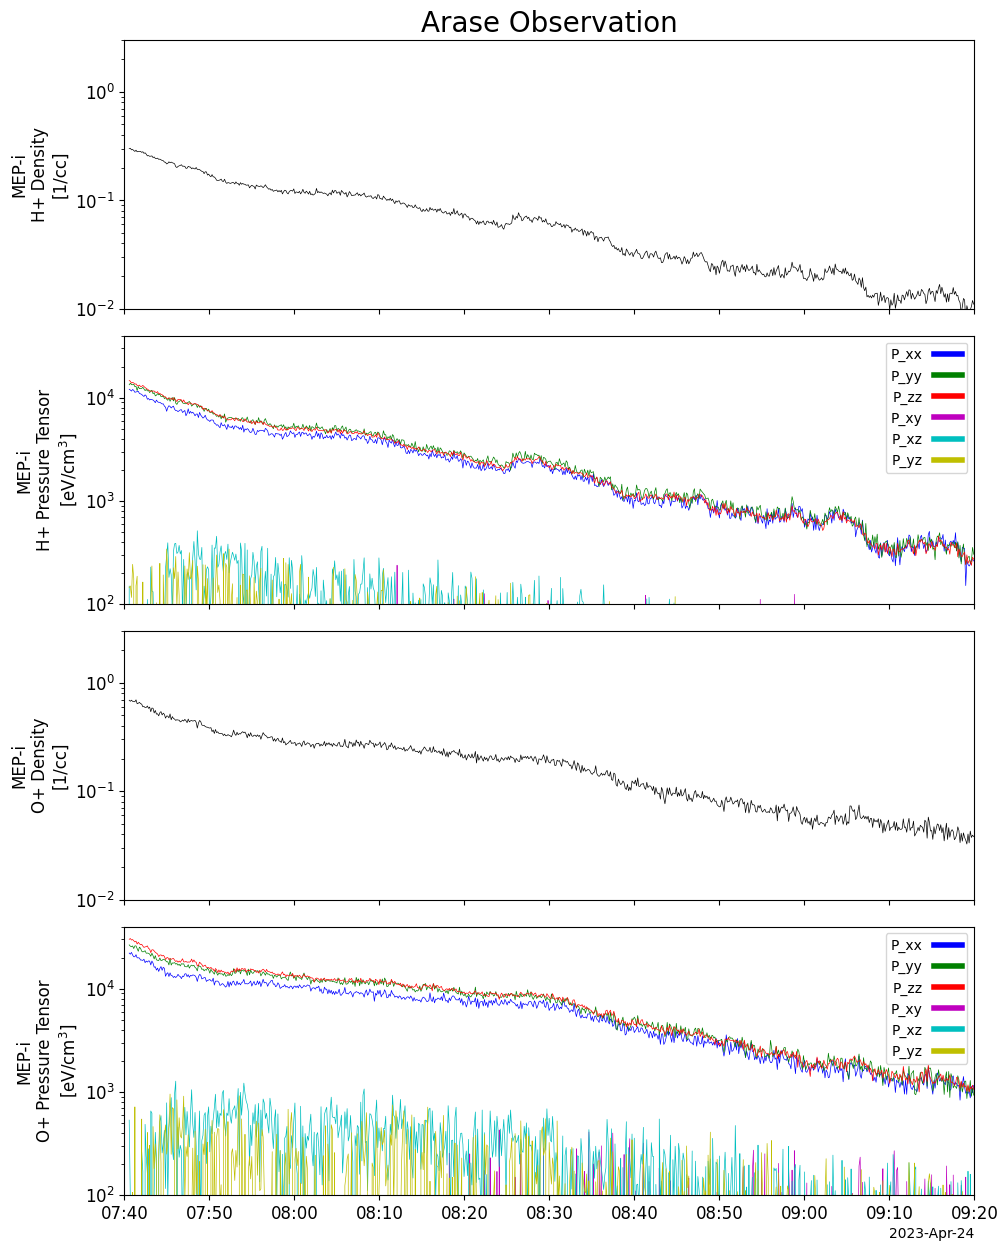

In [44]:
# plot the moment values
timespan(trange[0],100,keyword='minutes')
# setting for plot
# proton
options('erg_mepi_l2_3dflux_FPDU_density','ytitle','MEP-i\nH+ Density')
options('erg_mepi_l2_3dflux_FPDU_density','yrange',[1.e-2,3.e0])
options('erg_mepi_l2_3dflux_FPDU_ptens','ytitle','MEP-i\nH+ Pressure Tensor')
options('erg_mepi_l2_3dflux_FPDU_ptens','yrange',[1.e2,4.e4])
# oxygen
options('erg_mepi_l2_3dflux_FODU_density','ytitle','MEP-i\nO+ Density')
options('erg_mepi_l2_3dflux_FODU_density','yrange',[1.e-2,3.e0])
options('erg_mepi_l2_3dflux_FODU_ptens','ytitle','MEP-i\nO+ Pressure Tensor')
options('erg_mepi_l2_3dflux_FODU_ptens','yrange',[1.e2,4.e4])
# plot
tplot(['erg_mepi_l2_3dflux_FPDU_density',
       'erg_mepi_l2_3dflux_FPDU_ptens',
       'erg_mepi_l2_3dflux_FODU_density',
       'erg_mepi_l2_3dflux_FODU_ptens'
      ],
      xsize=10,ysize=15)

In [45]:
# show tplot variables
tplot_names()

0 : IMF
1 : PLS
2 : IMF_PTS
3 : PLS_PTS
4 : percent_interp
5 : Timeshift
6 : RMS_Timeshift
7 : RMS_phase
8 : Time_btwn_obs
9 : F
10 : BX_GSE
11 : BY_GSE
12 : BZ_GSE
13 : BY_GSM
14 : BZ_GSM
15 : RMS_SD_B
16 : RMS_SD_fld_vec
17 : flow_speed
18 : Vx
19 : Vy
20 : Vz
21 : proton_density
22 : T
23 : Pressure
24 : E
25 : Beta
26 : Mach_num
27 : Mgs_mach_num
28 : x
29 : y
30 : z
31 : BSN_x
32 : BSN_y
33 : BSN_z
34 : AE_INDEX
35 : AL_INDEX
36 : AU_INDEX
37 : SYM_D
38 : SYM_H
39 : ASY_D
40 : ASY_H
41 : PC_N_INDEX
42 : omti_asi_nyr_6300_epoch_image
43 : omti_asi_nyr_6300_exposure_time
44 : omti_asi_nyr_6300_image_raw
45 : omti_asi_nyr_6300_epoch_cloud
46 : omti_asi_nyr_cloud
47 : omti_asi_nyr_5725_epoch_image
48 : omti_asi_nyr_5725_exposure_time
49 : omti_asi_nyr_5725_image_raw
50 : omti_asi_nyr_5725_epoch_cloud
51 : omti_asi_nyr_6300_image_abs
52 : omti_asi_nyr_6300_gmap_table_400
53 : omti_asi_nyr_6300_image_abs_gmap_400
54 : noaa19_ted_ele_tel0_low_eflux
55 : noaa19_ted_ele_tel30_low_eflux
56 

['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H',
 'PC_N_INDEX',
 'omti_asi_nyr_6300_epoch_image',
 'omti_asi_nyr_6300_exposure_time',
 'omti_asi_nyr_6300_image_raw',
 'omti_asi_nyr_6300_epoch_cloud',
 'omti_asi_nyr_cloud',
 'omti_asi_nyr_5725_epoch_image',
 'omti_asi_nyr_5725_exposure_time',
 'omti_asi_nyr_5725_image_raw',
 'omti_asi_nyr_5725_epoch_cloud',
 'omti_asi_nyr_6300_image_abs',
 'omti_asi_nyr_6300_gmap_table_400',
 'omti_asi_nyr_6300_image_abs_gmap_400',
 'noaa19_ted_ele_tel0_low_eflux',
 'noaa19_ted_ele_tel30_low_eflux',
 'noaa19_ted_ele_tel0_low_eflux_error',
 'noaa19_

#### 3.4.2. IGRF&Tsyganenko-89 model field
PySPEDAS provides tools for calculation of the magnetic field of the IGRF and the Tsyganenko models. Here a calculation with the T89 model is demonstrated. The unit of the input orbit data should be km.

In [46]:
# import necessary modules
from ergpyspedas.erg import mgf, orb
from pytplot import tplot, options, tplot_options, timespan, tplot_names, del_data, get_data, store_data, subtract
from pyspedas.geopack.t89_trace_equator import trace_equator_89
from pyspedas.geopack.t89 import tt89
# setting
re      = 6371.2 # radius of the Earth
trange  = ['2023-04-24','2023-04-25']
timespan('2023-04-24',1,keyword='days')
# load data
var_orb = orb(trange=trange)
var_mgf = mgf(trange=trange)
dat     = get_data("erg_orb_l2_pos_gsm") # dat is namedtuple containing numpy.ndarray
store_data("erg_orb_l2_pos_gsm_km", data={'x':dat[0],'y':dat[1]*re})
# calculation
Bmodel  = tt89("erg_orb_l2_pos_gsm_km",iopt=1,igrf_only=False) # ipot: 1:Kp=0,0+, 2:Kp=1-,1,1+, ...
subtract('erg_mgf_l2_mag_8sec_gsm','erg_orb_l2_pos_gsm_km_bt89',newname='dif_Bgsm')

09-Mar-25 03:40:51: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
09-Mar-25 03:40:51: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230424_v04.cdf
09-Mar-25 03:40:51: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2023/04/


Load IGRF coefficients ...
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


09-Mar-25 03:40:51: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/04/erg_mgf_l2_8sec_20230424_v04.05.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


'dif_Bgsm'

 - `pyspedas.subtract(var1,var2,newname=newname)`: Subtract var2 from var1. Same with dif_data.pro of IDL/SPEDAS. 

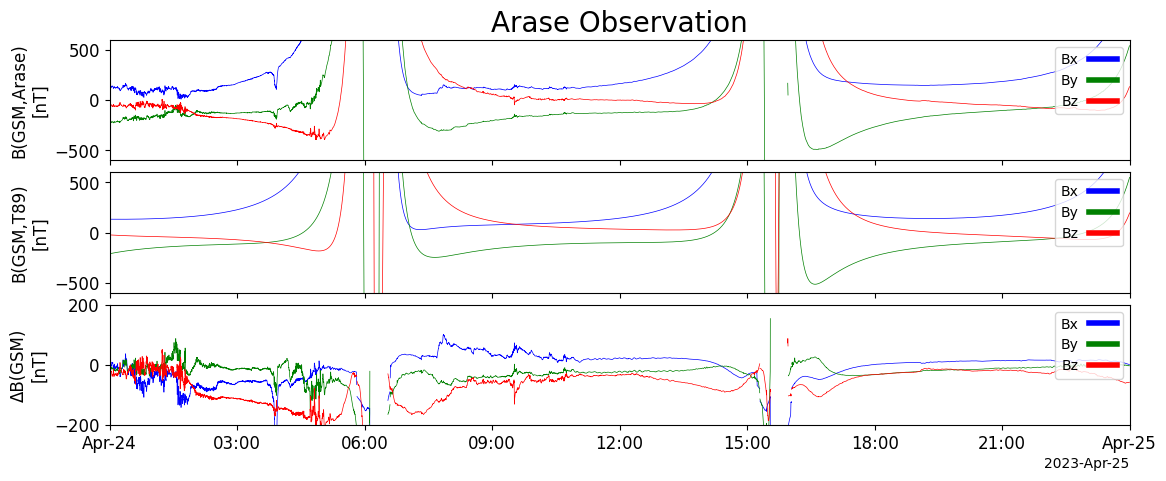

In [47]:
# plot the calculated model field
# setting 
# observational values
options('erg_mgf_l2_mag_8sec_gsm','yrange',[-600,600])
options('erg_mgf_l2_mag_8sec_gsm','ytitle','B(GSM,Arase)')
# model
options('erg_orb_l2_pos_gsm_km_bt89','yrange',[-600,600])
options('erg_orb_l2_pos_gsm_km_bt89','ytitle','B(GSM,T89)')
options('erg_orb_l2_pos_gsm_km_bt89','ysubtitle','[nT]')
options('erg_orb_l2_pos_gsm_km_bt89','labels',['Bx','By','Bz'])
# difference
options('dif_Bgsm','yrange',[-200,200])
options('dif_Bgsm','ytitle','\u0394B(GSM)')
# plot
tplot(['erg_mgf_l2_mag_8sec_gsm','erg_orb_l2_pos_gsm_km_bt89','dif_Bgsm'])

#### 3.4.3. Dynamic power spectrum
 PySPEDAS provides both FFT and wavelet analysis methods (`pyspedas.tdpwrspc` and `pyspedas.wavelet`).
 
 - `pyspedas.tdpwrspc('var',nboxpoints=nboxpoints,nshiftpoints=nshiftpoints,bin=bin)`
     - nboxpoints: number of box width for FFT
     - nshiftpoints: number of shift width of the box 
     - bin: number of FFT segments in each box
 - `pyspedas.wavelet('var',wavename=wavename,sampling_period=sampling_period)`
     - wavename: The name of the continuous wavelet function to apply.
     - sampling_period: The sampling period for the frequencies output.

09-Mar-25 03:40:55: wavelet was applied to: mag_x_pow
09-Mar-25 03:40:55: wavelet was applied to: mag_y_pow
09-Mar-25 03:40:55: wavelet was applied to: mag_z_pow


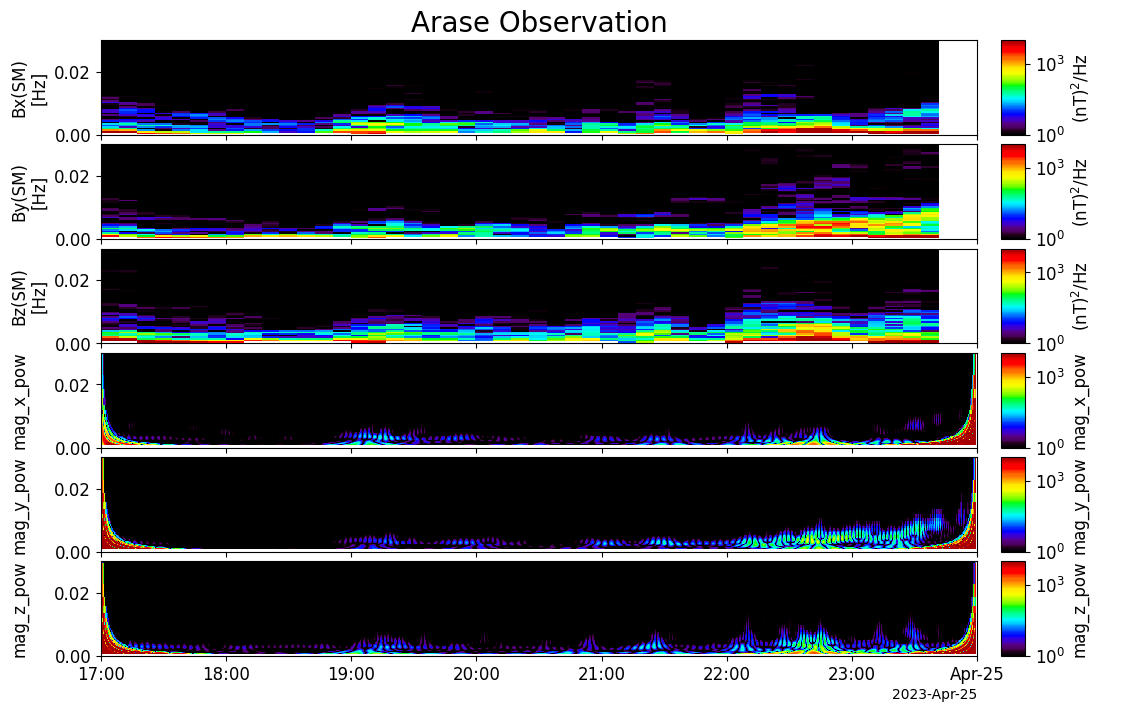

In [48]:
var_fft = pyspedas.tdpwrspc('erg_mgf_l2_mag_8sec_sm',nboxpoints=256,nshiftpoints=64,bin=1)
# create short data
dat  = pytplot.get_data('erg_mgf_l2_mag_8sec_sm')
mag  = dat.y
time = dat.times
ids  = np.abs(time - pytplot.time_double('2023-04-24/17:00:00')).argmin()
ide  = np.abs(time - pytplot.time_double('2023-04-24/24:00:00')).argmin()
new_var = pytplot.store_data('mag',data={'x':time[ids:ide],'y':mag[ids:ide,:]})
var_wav = pyspedas.wavelet('mag',sampling_period=8.0) # sampling_period: sampling period for the frequencies output
# setting for plot
options(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'],'ylog',0)
options(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'],'zrange',[1.0e0,1.0e4])
options(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'],'yrange',[0,0.03])
options('erg_mgf_l2_mag_8sec_sm_x_dpwrspc','ytitle','Bx(SM)')
options('erg_mgf_l2_mag_8sec_sm_y_dpwrspc','ytitle','By(SM)')
options('erg_mgf_l2_mag_8sec_sm_z_dpwrspc','ytitle','Bz(SM)')
options(['mag_x_pow','mag_y_pow','mag_z_pow'],'zrange',[1.0e0,1.0e4])
options(['mag_x_pow','mag_y_pow','mag_z_pow'],'zlog',1)
options(['mag_x_pow','mag_y_pow','mag_z_pow'],'ylog',0)
options(['mag_x_pow','mag_y_pow','mag_z_pow'],'yrange',[0,0.03])
timespan('2023-04-24/17:00:00',7,keyword='hours')
# plot
tplot(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc',
       'mag_x_pow','mag_y_pow','mag_z_pow'])

 
#### 3.4.4. Conversion to the field-aligned coordinates
Using `pyspedas.fac_matrix_make` and `pyspedas.tvector_rotate`, you can calculate vectors in the field-aligned coordinates (FAC, e.g., the electro magnetic fields and particle bulk flow in the FAC coordinates).

<u>Tips for conversion to the field-aligned coordinates</u><br> NaN causes fatal errors when running `pytplot.tvector_rotate`. NaN should be removed in advance.

In [49]:
#i mport necessary modules
from ergpyspedas.erg import mgf, orb
from pytplot import tplot, options, tplot_options, timespan, tplot_names, del_data, get_data, store_data, time_double
import numpy as np
#-------------------------------------------------------------------------
# setting
trange  = ['2023-04-24','2023-04-25']
timespan('2023-04-24/21:50:00',2,keyword='hours')
# load data
var_orb = orb(trange=trange)
var_mgf = mgf(trange=trange)
#-------------------------------------------------------------------------
# create tplot variable of averaged magnetic fields without NaN
pyspedas.avg_data('erg_mgf_l2_mag_8sec_gse',res=300) #300-sec average
pytplot.tinterp('erg_mgf_l2_mag_8sec_gse-avg','erg_mgf_l2_mag_8sec_gse') # moving average is more appropriate for the reference field
dat  = pytplot.get_data('erg_mgf_l2_mag_8sec_gse-avg_tinterp')
mag  = dat.y
time = dat.times
pytplot.store_data('mag_finite',data={'x':time[~np.isnan(mag[:,0])],'y':mag[~np.isnan(mag[:,0]),:]})
# create a rotation matrix
pyspedas.fac_matrix_make('mag_finite',pos_var_name='erg_orb_l2_pos_gse')
# rotate a vactor with the matrix
pyspedas.tvector_rotate( 'mag_finite_fac_mat','erg_mgf_l2_mag_8sec_gse')

09-Mar-25 03:40:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
09-Mar-25 03:40:57: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230424_v04.cdf
09-Mar-25 03:40:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2023/04/
09-Mar-25 03:40:57: File is current: erg_data/satellite/erg/mgf/l2/8sec/2023/04/erg_mgf_l2_8sec_20230424_v04.05.cdf
09-Mar-25 03:40:57: avg_data was applied to: erg_mgf_l2_mag_8sec_gse-avg


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac

['erg_mgf_l2_mag_8sec_gse_rot']

 - `pyspedas.avg_data('var',res=res)`: returned averaged data 'var-avg'. res is a keyword of the time width of the average.
 - `pytplot.tinterp('var1','var2')`: interpolate 'var2' with time labels of 'var1'. 'var1_tinterp' will be returned.

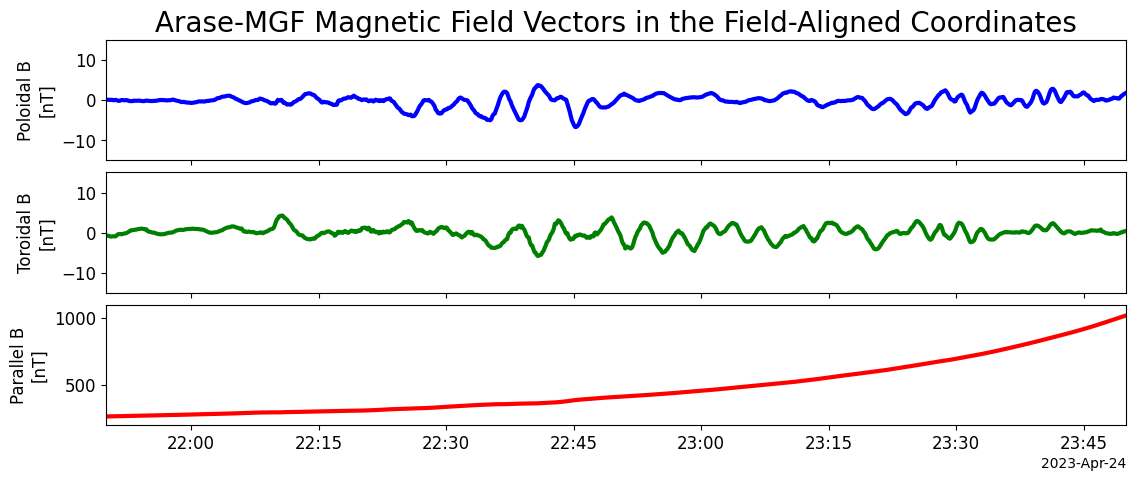

In [50]:
# plot
# setting for plot
tplot_options('title','Arase-MGF Magnetic Field Vectors in the Field-Aligned Coordinates')
options('erg_mgf_l2_mag_8sec_gse_rot','labels',None)
vars = pytplot.split_vec('erg_mgf_l2_mag_8sec_gse_rot') # obtain tplot variables of each component
# x-component
options('erg_mgf_l2_mag_8sec_gse_rot_x','yrange',[-15,15])
options('erg_mgf_l2_mag_8sec_gse_rot_x','ytitle','Poloidal B')
options('erg_mgf_l2_mag_8sec_gse_rot_x','color','blue')
options('erg_mgf_l2_mag_8sec_gse_rot_x','thick',3)
# y-component
options('erg_mgf_l2_mag_8sec_gse_rot_y','yrange',[-15,15])
options('erg_mgf_l2_mag_8sec_gse_rot_y','ytitle','Toroidal B')
options('erg_mgf_l2_mag_8sec_gse_rot_y','color','green')
options('erg_mgf_l2_mag_8sec_gse_rot_y','thick',3)
# z-component
options('erg_mgf_l2_mag_8sec_gse_rot_z','yrange',[200,1100])
options('erg_mgf_l2_mag_8sec_gse_rot_z','ytitle','Parallel B')
options('erg_mgf_l2_mag_8sec_gse_rot_z','color','red')
options('erg_mgf_l2_mag_8sec_gse_rot_z','thick',3)
# plot
tplot(vars)

 - `pytplot.split_vec('var')`: Retruns 1-D data tplot variables broken down from 2-D data

#### 3.4.5. Wave polarization
 - nopfft: number of points for the FFT calculation. Default is 256 points.
 - steplength: step size of each FFT window. Default is nopfft/2.
 - bin_freq: number of points used in averaging in the frequency domain. Default is 3.

In [51]:
# resize the magnetic field data in the field-aligned coordinates
dat  = get_data('erg_mgf_l2_mag_8sec_gse_rot')
time = dat.times
mag  = dat.y
ids  = np.abs(time - pytplot.time_double('2023-04-24/21:00:00')).argmin()
ide  = np.abs(time - pytplot.time_double('2023-04-24/24:00:00')).argmin()
var  = store_data('erg_mag_fac_clip',{'x':time[ids:ide],'y':mag[ids:ide,:]})
#calculate wave polarization
pyspedas.twavpol('erg_mag_fac_clip',nopfft=256,steplength=16,bin_freq=3)

09-Mar-25 03:40:58: wavpol: File sampling frequency=0.1248304167474206Hz
09-Mar-25 03:40:58: n_batches: 1
09-Mar-25 03:40:58: Total number of steps:85
09-Mar-25 03:40:58: Total number of possible FFT in the batch no 0 is:84.0
09-Mar-25 03:40:58: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pyspedas/analysis/twavpol.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  alphax[KK, :] = np.sqrt(ematspec[KK, :, 0, 0])

09-Mar-25 03:40:58: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pyspedas/analysis/twavpol.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  alphacos2x[KK, :] = (np.real(ematspec[KK, :, 0, 1]) /

09-Mar-25 03:40:58: /home/kazuhiro/.local/bin/chsenv/lib/python3.10/site-packages/pyspedas/analysis/twavpol.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  alphasin2x[KK, :] = (-np.imag(ematspec[KK, :, 0, 1]) /

09-Mar-25 03:40:58: /home/kazuhiro/.

1

09-Mar-25 03:41:00: erg_mag_fac_clip_powspec contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.


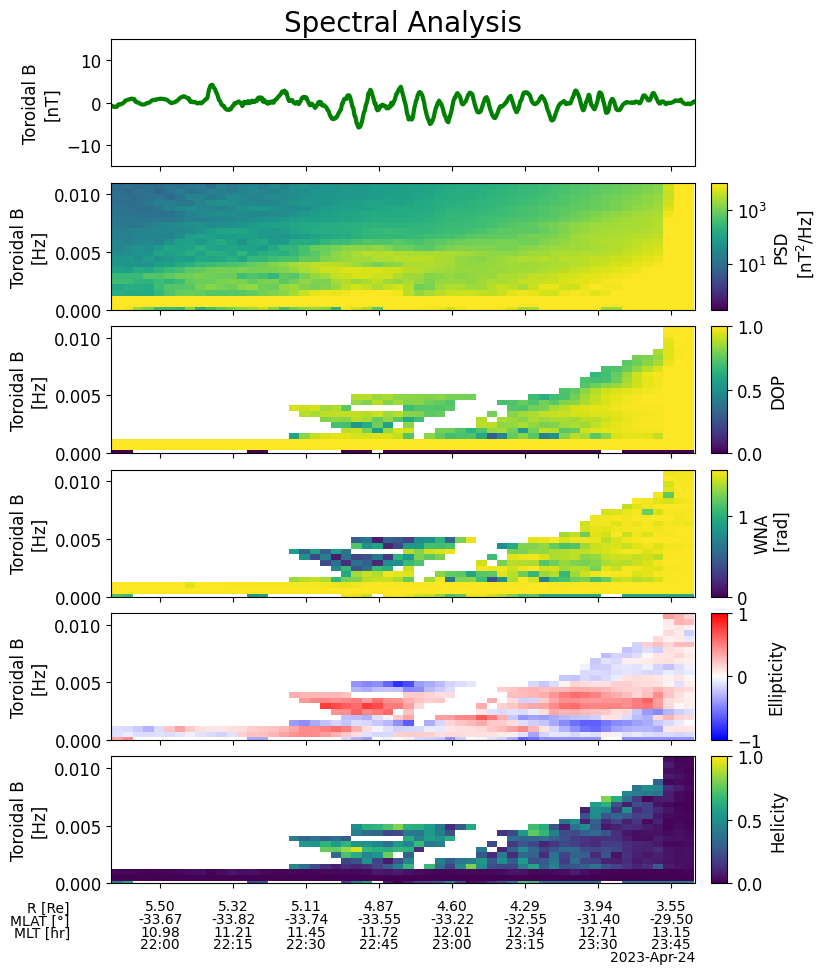

In [52]:
from ergpyspedas.util import tplot_vl
import matplotlib.pyplot as plt
# settings for plot
# hide lower wave power
pwr = get_data('erg_mag_fac_clip_powspec')
dop = get_data('erg_mag_fac_clip_degpol')
wna = get_data('erg_mag_fac_clip_waveangle')
ell = get_data('erg_mag_fac_clip_elliptict')
hel = get_data('erg_mag_fac_clip_helict')
time = pwr.times
ff  = pwr.v
pwr = pwr.y
dop = dop.y
wna = wna.y
ell = ell.y
hel = hel.y
# substitute NaN (np.nan) for low wave power (< 2000 nT^2/Hz)
dop2 = np.where(pwr < 2.e3, np.nan, dop)
wna2 = np.where(pwr < 2.e3, np.nan, wna)
ell2 = np.where(pwr < 2.e3, np.nan, ell)
hel2 = np.where(pwr < 2.e3, np.nan, hel)
# create tplot variable
store_data('dop',data={'x':time,'y':dop2,'v':ff})
store_data('wna',data={'x':time,'y':wna2,'v':ff})
store_data('ell',data={'x':time,'y':ell2,'v':ff})
store_data('hel',data={'x':time,'y':hel2,'v':ff})
# power
options('erg_mag_fac_clip_powspec','yrange',[0.0,0.011])
options('erg_mag_fac_clip_powspec','zrange',[2.e-1,1.e4])
options('erg_mag_fac_clip_powspec','zlog',1)
options('erg_mag_fac_clip_powspec','colormap','viridis')
options('erg_mag_fac_clip_powspec','ytitle','Toroidal B')
options('erg_mag_fac_clip_powspec','ysubtitle','[Hz]')
options('erg_mag_fac_clip_powspec','ztitle','PSD')
options('erg_mag_fac_clip_powspec','zsubtitle','[nT^2/Hz]')
# degree of polarization
options('dop','spec',1)
options('dop','yrange',[0,0.011])
options('dop','zrange',[0,1])
options('dop','zlog',0)
options('dop','colormap','viridis')
options('dop','ytitle','Toroidal B')
options('dop','ysubtitle','[Hz]')
options('dop','ztitle','DOP')
options('dop','zsubtitle','')
# wave normal angle (vs B0)
options('wna','spec',1)
options('wna','yrange',[0.0,0.011])
options('wna','zrange',[0,np.pi/2])
options('wna','zlog',0)
options('wna','colormap','viridis')
options('wna','ytitle','Toroidal B')
options('wna','ysubtitle','[Hz]')
options('wna','ztitle','WNA')
options('wna','zsubtitle','[rad]')
# ellipticity
options('ell','spec',1)
options('ell','yrange',[0.0,0.011])
options('ell','zrange',[-1.0,1.0])
options('ell','zlog',0)
options('ell','colormap','bwr')
options('ell','ytitle','Toroidal B')
options('ell','ysubtitle','[Hz]')
options('ell','ztitle','Ellipticity')
options('ell','zsubtitle','')
# helicity
options('hel','spec',1)
options('hel','yrange',[0.0,0.011])
options('hel','zrange',[0.0,1.0])
options('hel','zlog',0)
options('hel','colormap','viridis')
options('hel','ytitle','Toroidal B')
options('hel','ysubtitle','[Hz]')
options('hel','ztitle','Helicity')
options('hel','zsubtitle','')
# setting for plot_vl
var_label = pytplot.split_vec('erg_orb_l2_pos_rmlatmlt')
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_x', 'ytitle', 'R [Re]' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'MLAT [\N{degree sign}]' ) #\N{degree sign} is the symbol of degree
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT [hr]' )
fig       = plt.figure(figsize=(8,12))
tplot_options('title','Spectral Analysis')
tplot_options('vertical_spacing',0.14)
# plot
plot = tplot_vl(['erg_mgf_l2_mag_8sec_gse_rot_y','erg_mag_fac_clip_powspec','dop','wna','ell','hel'],var_label=var_label,fig=fig)
# show tplot variables
# tplot_names()

---
### 3.5. Plot with Matplotlib

Matoplotlib is one of the most popular library for visualization of data (https://matplotlib.org/) . You can go to the [last subsection](#3.5.5.-Plot-of-OMNI-image-and-POES19-orbit-on-a-map) if you are familiar with Matplotlib.

Using Matplotlib, you can plot data that do not fit to `pytplot.tplot` (spacecraft orbit, for example). Matplotlib provides two interfaces to plot vectors/arrays: one is easy and simple (pyplot interface), and the other is more object-oriented and more flexible (object-oriented interface).

#### 3.5.1. Line plot

For detailed setting of plot, object-oriented programing is needed. An example of a line plot is shown below.

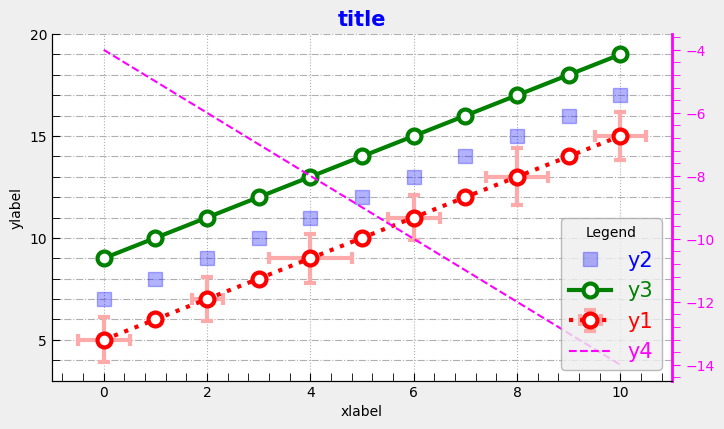

In [53]:
# import necessary moludes
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator, AutoMinorLocator #module for setting of tick intervals
# create sample data with linspace function of Numpy
x  = np.linspace(0,10,11) #11 element array from 0 to 10 [0,1,2,...,10]
y1 = np.linspace(5,15,11) #11 element array from 5 to 15 [5,6,7,...,15]
y2 = np.linspace(7,17,11) #11 element array from 7 to 17 [7,8,9,...,17]
y3 = np.linspace(9,19,11) #11 element array from 9 to 19 [9,10,11,...,19]
y4 = 1.0 - y1
xerr = [0.5,0.5,0.3,0.6,0.8,0.3,0.5,0.8,0.6,0.8,0.5]
yerr = [1.1,1.3,1.1,1.2,1.2,1.3,1.1,1.3,1.4,1.1,1.2]
# Create figure object (#fig, ax = plt.subplots() is also accepted.). The figure object allocates a plot region.
fig = plt.figure(figsize=(8,4.5),facecolor="#efefef")
# The axes object displays the actual data, titles, and labels.
ax1 = fig.add_subplot(1,1,1)
# plot data
ax1.errorbar(x,y1,xerr=xerr,yerr=yerr,
             marker='o',markersize=10,markerfacecolor='white',markeredgecolor='red',markeredgewidth=3,
             color='red',lw=3,label='y1',ls=':',
             ecolor='#ffaaaa',capsize=4,capthick=3,errorevery=2) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
ax1.plot(x,y2,'s',label='y2',color='blue',lw=3,alpha=0.3,markersize=10)
ax1.plot(x,y3,marker='o',markersize=10,markerfacecolor='white',markeredgecolor='green',markeredgewidth=3,
         color='green',lw=3,label='y3')
# modify the general setting of axes
ax1.set_title('title',size=15,weight='black',color='blue')
ax1.spines[['top','right']].set_visible(False)
# x-axis
ax1.set_xlabel('xlabel')
ax1.set_xlim(-1,11)
ax1.xaxis.set_major_locator(MultipleLocator(2.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.grid(which='major',linestyle=':') #which = 'major', 'minor', 'both'
# y-axis
ax1.set_ylabel('ylabel')
ax1.set_ylim(3,20)
ax1.yaxis.set_major_locator(MultipleLocator(5.0))
ax1.yaxis.set_minor_locator(MultipleLocator(1.0))
ax1.yaxis.grid(which='both',linestyle='-.') #which = 'major', 'minor', 'both'
# other settings
ax1.tick_params(axis='both',which='both',length=6,direction='in') #direction = 'out', 'in', 'inout', which = 'major', 'minor', 'both'
# add the second plot with the common x-axis and different y-axis
ax2 = ax1.twinx()
ax2.plot(x,y4,label='y4',ls='--',color='magenta')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax2.legend(handler1+handler2, label1+label2,
           fontsize=15,facecolor='#eeeeee',edgecolor='#aaaaaa',labelcolor=['blue','green','red','magenta'],
           title='Legend',title_fontsize=10,loc='lower right')
ax2.yaxis.set_minor_locator(MultipleLocator(0.4))
ax2.tick_params(axis='y',which='both',length=6,direction='out',color='magenta',labelcolor='magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_linewidth(2)
#plot
plt.show()
# save as figure (savefig supports emf, eps, jpeg, jpg, pdf, png, ps, raw, rgba, svg, svgz, tif, tiff)
fig.savefig('test.png',dpi=300)

#### 3.5.2. Contour plot
Matplotlib provides `pclolormesh` to draw a color contour (heat map) with a non-regular rectangular grid. For a regular grid, `imshow` is faster than `pcolormesh`.

Other functions/classes used here are
 - `contour`: plot/add line contour.
 - `colorbar`: add colorbar to the color contour.
 - `matplotlib.colors.Normalize`: A class which, when called, maps values within the interval [`vmin`, `vmax`] linearly to the interval [0.0, 1.0]. 
 - `matplotlib.colors.LogNorm`: Normalize a given value to the 0-1 range on a log scale.

xx1 (5, 8) yy1 (5, 8) zz1 (5, 8)
xx2 (6, 9) yy2 (6, 9) zz2 (5, 8)


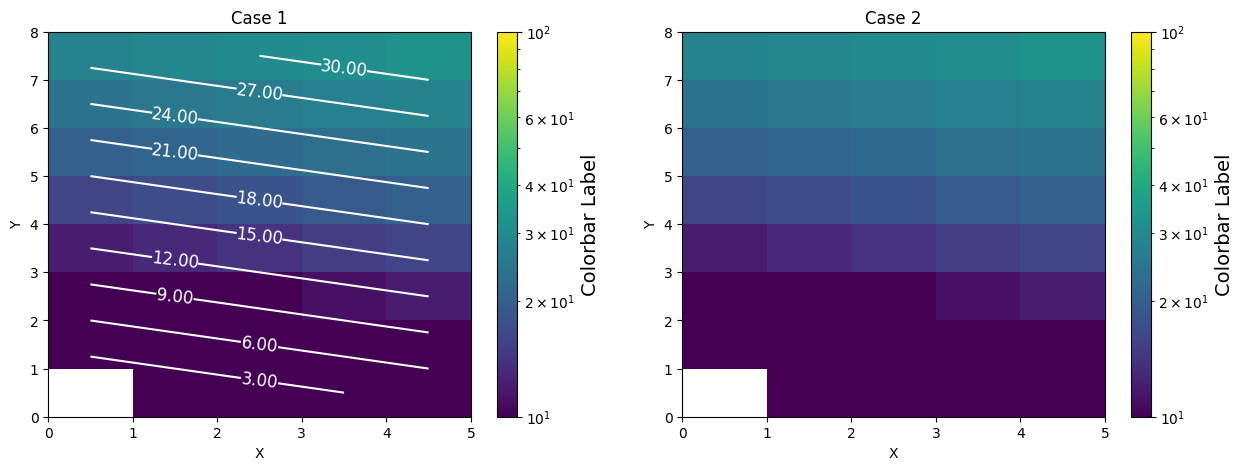

In [54]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize # for color range of contour (linear scale)
from matplotlib.colors import LogNorm   # for color range of contour (logarithmic scale)
#---------------------------------------------------------
# create sample data
# (case 1) xx1 and yy2 are the position at the center of each cell
xx1, yy1 = np.mgrid[:5,:8]
zz1 = xx1 + yy1*4
xx1 = xx1 + 0.5
yy1 = yy1 + 0.5
# (case 2) xx2 and yy2 are the position at the edge of each cell
xx2, yy2 = np.mgrid[:6,:9]
zz2 = zz1
# confirm the sample data
print('xx1',xx1.shape,'yy1',yy1.shape,'zz1',zz1.shape)
print('xx2',xx2.shape,'yy2',yy2.shape,'zz2',zz2.shape)
# color contour
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1) # set the panel to the left
ax2 = fig.add_subplot(1,2,2) # set the panel to the right 
#---------------------------------------------------------
# (case 1 [left panel])
# cmap: name of colormap, norm: normalization method (matplotlib.colors.Normalize or matplotlib.colors.LogNorm), vmin: minimum value, vmax: maximum value of contour line
mappable1 = ax1.pcolormesh(xx1,yy1,zz1,cmap='viridis',norm=LogNorm(vmin=1.e1,vmax=1.e2))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Case 1')
# line contour
# the fourth argument specifies the interval of contour line, vmin: minimum value, vmax: maximum value of contour line
lc1 = ax1.contour(xx1,yy1,zz1,10,vmin=0,vmax=40,colors=['white'])
lc1.clabel(fmt='%.2f',fontsize=12) #%.2f = display two decimal place
# set colorbar. mappable argument is required for object-oriented programing 
br1 = fig.colorbar(mappable1,orientation='vertical',ax=ax1) #orientation = 'vertical' or 'horizontal'
br1.set_label('Colorbar Label',fontsize=14)
#-----------------------------------------------------------
# (case 2 [right panel])
# cmap: name of colormap, norm: normalization method (matplotlib.colors.Normalize or matplotlib.colors.LogNorm), vmin: minimum value, vmax: maximum value of contour line
mappable2 = ax2.pcolormesh(xx2,yy2,zz2,cmap='viridis',norm=LogNorm(vmin=1.e1,vmax=1.e2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Case 2')
# contour does not fit to case 2 
# set colorbar. mappable argument is required for object-oriented programing 
br2 = fig.colorbar(mappable2,orientation='vertical',ax=ax2) #orientation = 'vertical' or 'horizontal'
br2.set_label('Colorbar Label',fontsize=14)
# plot
plt.show()

#### 3.5.3. Polar plot
Using `subplot_kw={'projection':'polar'}` in `subplots`, you can draw a picture in the polar coordinates.

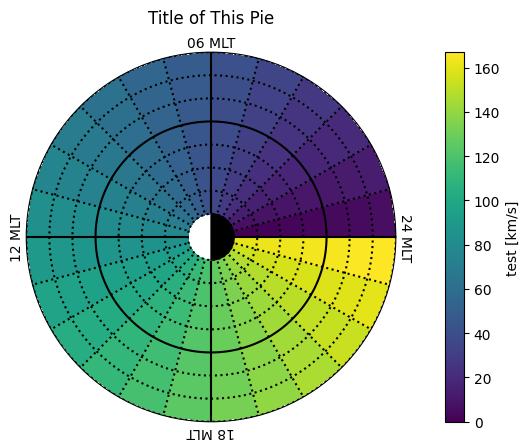

In [55]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
# set figure object
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
# create test data
theta    = (np.linspace(0.5/24,1.0-0.5/24,24))*2*np.pi # len(theta) should be len(zz[0,:])+1
r        = np.linspace(1.0,7.0,7)+0.5                  # len(r) should be len(zz[:,0])+1
xx, yy   = np.mgrid[:7,:24]
zz       = xx + yy*7 
# plot
mappable = ax.pcolor(theta,r,zz,shading='auto',vmin=0,vmax=167)
bar      = fig.colorbar(mappable,ax=ax,pad=0.1,label='test [km/s]') #pad = right-side shift of color bar position
# supress automatical tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# supress automatical grids
ax.grid(False)
# add MLT labels
ax.text( 90*np.pi/180,8.4,'06 MLT',fontsize=10,ha='center',va='center', color='black')
ax.text(180*np.pi/180,8.4,'12 MLT',fontsize=10,ha='center',va='center',color='black',rotation= 90)
ax.text(270*np.pi/180,8.4,'18 MLT',fontsize=10,ha='center',va='center',color='black',rotation=180)
ax.text(360*np.pi/180,8.4,'24 MLT',fontsize=10,ha='center',va='center',color='black',rotation=-90)
ax.set_title('Title of This Pie\n')
# add grid
for i in range(24):
    if i % 6 == 0:
        linestyle = '-'
    else:
        linestyle = ':'
    ax.plot([15*i*np.pi/180,15*i*np.pi/180],[1.1,8],color='black',linestyle=linestyle)
for i in range(9):
    theta = np.linspace(0,2,180)*np.pi
    r     = theta * 0 + i
    if i == 5:
        linestyle = '-'
    else:
        linestyle = ':'
    ax.plot(theta,r,color='black',linestyle=linestyle)
# oplot earth
theta2 = np.linspace(-np.pi/2, np.pi/2, 100)  # 0-180 deg
r = theta2*0 + 1  # radius = 1
ax.fill(theta2, r, color='black', alpha=1.0)  # fill the semicircle

#### 3.5.4. Plot Earth
`matplotlib.pyplot.fill` plots filled polygons like IDL/polyfill-procedure.

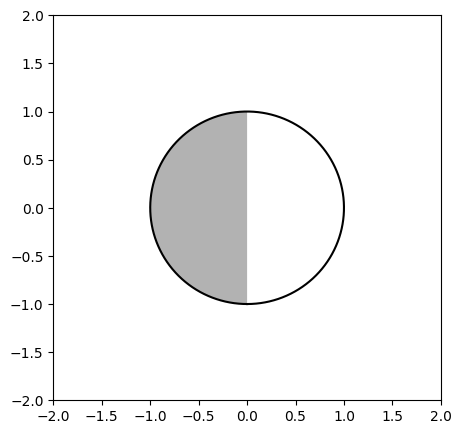

In [56]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
#
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1)
#
ntheta = 360*3 
theta  = (np.linspace(0,360,ntheta)/180 - 1.0/2.0) * np.pi #degree to radian
x1     = np.cos(theta)
y1     = np.sin(theta) 
x2     = np.cos(theta)
x2[0:ntheta//2] = 0 #// means truncation division
ax.fill(x1, y1, 'white', x2, y1, 'black',alpha=0.3) #multiple polygons
ax.plot(x1, y1, color='black')
ax.axis([-2.0, 2.0, -2.0, 2.0])
plt.show()

#### 3.5.5. Plot of OMNI image and POES19 orbit on a map
This is another example of the contour plot on a map. The example plots a conjugated observation by OMTI and POES-19 in [Section 2.3.3.](#2.3.3.-OMTI-(ground-optical-imager)) using `cartopy` for plotting a map.
 - cartopy: a Python package for projection maps and other geospatial data analysis (https://scitools.org.uk/cartopy/docs/latest/).
 - CRS: Coordinate Referenece System

Defaulting to user installation because normal site-packages is not writeable
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
array size of omti_dat: (36, 512, 512)


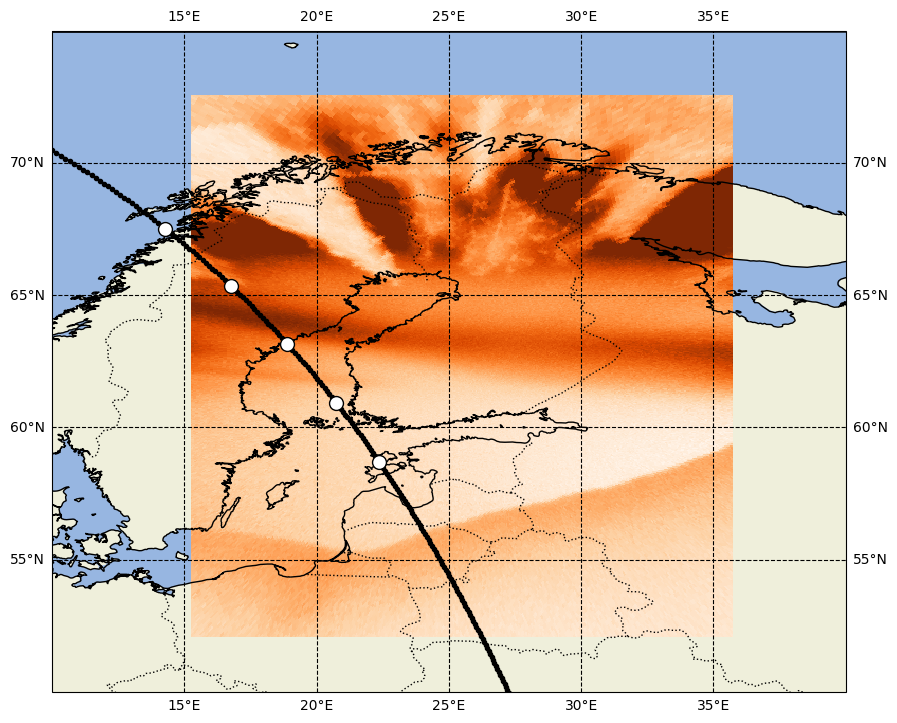

In [57]:
# install and import necessary package and modules
!pip install cartopy
import numpy as np
import cartopy
import cartopy.crs as crs
import cartopy.feature as feature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import Normalize #for color range of contour
#----------------------------------------------------------------------------
# get data
noaa_glon = pytplot.get_data(prefix+'lon')                                  # namedtuple of POSE19's footprint longitude in deg
noaa_glat = pytplot.get_data(prefix+'lat')                                  # namedtuple of POSE19's footprint latitude in deg
noaa_time = noaa_glon.times                                                 # numpy.ndarray of time label of POES19 (float64)
omti_dat  = pytplot.get_data('omti_asi_'+site+'_'+wl+'_image_abs_gmap_400') # namedtuple of OMNI intensity in Rayleigh
omti_time = omti_dat.times                                                  # numpy.ndarray of time label of OMTI (float64)
omti_att  = pytplot.get_data('omti_asi_'+site+'_'+wl+'_image_abs_gmap_400',metadata=True) #dictionary including grid information
# get coordinates of grids of OMTI image data
omti_glon = omti_att['pos'][0]                    # numpy.ndarray of GLON grid
omti_glat = omti_att['pos'][1]                    # numpy.ndarray of GLAT grid
print('array size of omti_dat:',omti_dat.y.shape) # confirm array size of intensity data
# search index for plot
time_plot = pytplot.time_double('2024-01-01/18:30:00') # time for plot (float)
idx_noaa  = np.abs(noaa_time - time_plot).argmin()     # index of POES19 data
idx_omti  = np.abs(omti_time - time_plot).argmin()     # index of OMTI data
# resphape the intensity data
omti_int  = np.transpose(omti_dat.y[idx_omti,:,:])     # [36 x 512(glat) x 512(glon)] ==> [512(glon) x 512(glat)]
#-----------------------------------------------------------------------------
# make plot
fig = plt.figure(figsize=(294/25.4,210/25.4))             # create figur object. figsize sets the size of figure (unit: inch)
# equirectangular projection (plate carree)
# other projection methods are like crs.NorthPolarStereo(), crs.LambertConformal, crs.Miller, crs.Mollweide, ...  
ax  = fig.add_subplot((0.1,0.1,0.8,0.8),projection=crs.PlateCarree()) #create axes object. The first tuple is the plot range.
#settings for axis
ax.set_extent([10,40,50,75],crs=crs.PlateCarree())        # set plot range [west,east,south,north] and projection type (crs)
ax.coastlines(resolution='10m',color='black',linewidth=1) # set coast line: resolution = resolution of the coast line ('10m','50m','110m')
ax.add_feature(feature.LAND)                              # color in land
ax.add_feature(feature.OCEAN)                             # color in of cean
ax.add_feature(feature.BORDERS,linestyle=':')             #add dotted border line
# setting for grid
gl = ax.gridlines(crs=crs.PlateCarree(),linestyle='--',color='black',draw_labels=True)
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,5)) #x-axis grid every 5 deg
gl.ylocator = mticker.FixedLocator(np.arange(-180,180,5)) #y-axis grid every 5 deg
# overplot color contour
ax.pcolormesh(omti_glon, omti_glat, omti_int, cmap='Oranges', norm=Normalize(vmin=0, vmax=500), transform=crs.PlateCarree()) #cmap: name of color map
# add POES19 orbit around 18:30 UT
ax.plot(noaa_glon.y[idx_noaa-600:idx_noaa+600],noaa_glat.y[idx_noaa-600:idx_noaa+600],
           transform=crs.PlateCarree(),marker='.',color='black')
# add large circles at 1-minute intervals
ax.plot(noaa_glon.y[idx_noaa],noaa_glat.y[idx_noaa],'o',transform=crs.PlateCarree(),color='white',markeredgecolor='black',markersize=10)
ax.plot(noaa_glon.y[idx_noaa+20*1],noaa_glat.y[idx_noaa+20*1],'o',transform=crs.PlateCarree(),color='white',markeredgecolor='black',markersize=10)
ax.plot(noaa_glon.y[idx_noaa+20*2],noaa_glat.y[idx_noaa+20*2],'o',transform=crs.PlateCarree(),color='white',markeredgecolor='black',markersize=10)
ax.plot(noaa_glon.y[idx_noaa-20*1],noaa_glat.y[idx_noaa-20*1],'o',transform=crs.PlateCarree(),color='white',markeredgecolor='black',markersize=10)
ax.plot(noaa_glon.y[idx_noaa-20*2],noaa_glat.y[idx_noaa-20*2],'o',transform=crs.PlateCarree(),color='white',markeredgecolor='black',markersize=10)

 - `numpy.argmin`: Retruns the index of the minimum value

---
## 4. Reproduction of figures of EMIC waves in Jun et al. (2025GRL, accepted)

Arase-MGF provides 64/128/256-Hz data, making it possible to analyze electromagnetic ion cyclotron (EMIC) waves. For the high-frequency (>20 Hz) EMIC waves observed by Arase during 23:55-23:59 UT on May 11 (Figure 3 of Jun et al. (2025)),

### Exercise 1
 
 Plot the orbit of the Arase satellite on a X$\mathrm{_{SM}}$-Y$\mathrm{_{SM}}$ plane for May 11.
 Also, overplot the orbit for the timing of the high-frequency EMIC wave (23:55:45-23:59:45 UT on May 11).

### Exercise 2

 - From the 128-Hz data of MGF, calculate the frequency spectra of the wave polarization for 23:55:45-23:59:45 UT on May 11 by using `pyspedas.fac_matrix_make`, `pyspedas.tvector_rotate` and `pyspedas.wavepol`.
 - Plot following seven panels and overplot He+ and O+ gyrofrequencies in magenta dashed lines over each panel:
     1. magnitude of the magnetic field,
     2. cold electron density,
     3. dynamic power spectra of the 64-Hz magnetic field in the perpendicular direction,
     4. dynamic power spectra of the 64-Hz magnetic field in the parallel direction,
     5. degree of polarization,
     6. ellipticity,
     7. wave normal angle. 
 - $q$: $1.602\times10^{-19}$ [C], $m_{\mathrm{H+}}$: $1.673\times10^{-27}$ [kg]

---
## Appendix

### Conversion from mGSE to GSE
The waveform data obtained by Van Allen Probes/EFW are provided in the mGSE coordinates ([PDF of the definition of mGSE](https://www.space.umn.edu/wp-content/uploads/2013/11/MGSE_definition_RBSP_11_2013.pdf)). In this coordinate system, X direction is defined as the direction of the SC spin-axis. This indicates that the data of the spin-axis direction are needed for the conversion. 

Unfortunately, PySPEDAS does not provide any tools to convert from mGSE to other common coordinates.
IDL/SPEDAS provides `rbsp_load_spice_kernels.pro`, `rbsp_load_spice_metakernel.pro`, and `rbsp_mgse2gse.pro`.

- [rbsp_load_spice_kernels.pro](https://themis.ssl.berkeley.edu/socware/spedas_6_0/idl/general/missions/rbsp/spacecraft/rbsp_load_spice_kernels.pro)
- [rbsp_load_spice_metakernel.pro](https://themis.ssl.berkeley.edu/socware/spedas_6_0/idl/general/missions/rbsp/spacecraft/rbsp_load_spice_metakernel.pro)
- [rbsp_mgse2gse.pro](https://themis.ssl.berkeley.edu/socware/spedas_6_1/idl/general/missions/rbsp/efw/rbsp_mgse2gse.pro)


Here a sample of the conversion from mGSE to GSE using `Spiceypy` is demonstrated. `Spiceypy` is a package of a Python wrapper of [SPICE  Toolkit](https://naif.jpl.nasa.gov/naif/). Documents on `Spiceypy` are shown below:
- https://spiceypy.readthedocs.io/en/stable/
- https://github.com/AndrewAnnex/SpiceyPy


In [60]:
# install Spiceypy
!pip3 install spiceypy

Defaulting to user installation because normal site-packages is not writeable
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^


In [76]:
# import necessary modules
import pyspedas
import numpy as np
import spiceypy as spice
import matplotlib.pyplot as plt
from pyspedas.rbsp import efw, emfisis
from pytplot import tplot, tplot_options, options, tplot_names, tinterp, timespan, time_string, time_double, timebar
from pyspedas import get_data, store_data, del_data, time_ephemeris

In [77]:
# load EFW and EMFISIS data
trange_efw = ['2014-01-28','2014-01-29']
efw(probe='a',trange=trange_efw,level='l3')
emfisis(probe='a',trange=trange_efw,level='l3',coord='gse')
# interpolation of the B-field with the E-field
tinterp('efield_in_corotation_frame_spinfit_mgse','Mag') # Note that the order of inputs: tinterp(var1,var2), var2 is interpolated with var1
# get data
mag  = get_data('efield_in_corotation_frame_spinfit_mgse_tinterp') #B[time x XYZ in GSE]
ele  = get_data('efield_in_corotation_frame_spinfit_mgse')
time = ele.times

09-Mar-25 03:48:06: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2014/
09-Mar-25 03:48:07: File is current: rbsp_data/rbspa/l3/efw/2014/rbspa_efw-l3_20140128_v04.cdf
09-Mar-25 03:48:07: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable vsvy_vagv_LABL_1, skipping
09-Mar-25 03:48:08: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/gse/2014/
09-Mar-25 03:48:08: File is current: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/gse/2014/rbsp-a_magnetometer_4sec-gse_emfisis-l3_20140128_v1.3.3.cdf


For Linux and WSL2 users, you can download SPICE Kernels using `wget` command. `curl -O` can be used for Mac OS.
 - `-N`: an option for checking the update of the target file. If the current file loaded in a local directory is the latest version, the download process will be skipped.
 
 In the next step, we show an example of loading necessary SPICE Kernels by the hand. Actually, these files are downloaded when using `rbsp_load_spice_kernels.pro`. However, the spin-axis direction also can be obtained from the tplot variable of `spinaxis_gse` in the CDF files.  <span style='color: red;'>I recommend using the tplot variable `spinaxis_gse` instead of calculating the unit vector of W-antenna direction `wgse` from the SPICE data.</span>

In [ ]:
# download necessary kernels using wget (for Linux&WSL2) or curl -O (for Mac)
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/frame_kernel/rbspa_fk_2014_050.tf
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/teams/spice/fk/rbsp_general011.tf
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/teams/spice/pck/pck00010.tpc
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/teams/spice/ik/rbspa_rps_v000.ti
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/teams/spice/ik/rbspa_rbspice_v001.ti
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/planetary_ephemeris/de421.bsp
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/leap_second_kernel/naif0012.tls
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/operations_sclk_kernel/rbspa_sclk_2567.tsc
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/ephemerides/rbspa_2012_243_2018_182_01.deph.bsp
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/ephemerides/rbspa_2015_305_2018_191_03.deph.bsp
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/ephemerides/rbspa_2018_182_2019_291_01.deph.bsp
!wget -N http://themis.ssl.berkeley.edu/data/rbsp/MOC_data_products/RBSPA/attitude_history_full/rbspa_2014_009_2014_039_01.dah.bc

- `rbspa_fk_2014_050.tf`, `rbsp_general011.tf`: FK (referene frame specifications)
- `pck00010.tpc`: PCK (target body size, shape, and orientation)
- `rbspa_rps_v000.ti`, `rbspa_rbspice_v001.ti`: IK (instrument field-of-view size, shape, and orientation), RPS = Relativistic Proton Spectrometer
- `naif0012.tls`: LSK (leapseconds tabulation)
- `rbspa_sclk_2567.tsc`: SCLK (spacecraft clock coefficients)
- `rbspa_yyyy_doy_yyyy_doy_vv.deph.bsp`: SPK? (space vehicle or taget body trajectory (ephemeris))
- `rbspa_yyyy_doy_yyyy_doy_vv.dah.bc`: CK? (orientation of space vehicle or any articulating structure on it)

Next, the SPICE data are loaded with `spice.furnsh`:

In [78]:
# check Spiceypy
print(spice.tkvrsn('TOOLKIT'))
# read kernel files
spice.furnsh('rbspa_fk_2014_050.tf')
spice.furnsh('rbsp_general011.tf')
spice.furnsh('pck00010.tpc')
spice.furnsh('rbspa_rps_v000.ti')
spice.furnsh('rbspa_rbspice_v001.ti')
spice.furnsh('de421.bsp')
spice.furnsh('naif0012.tls')
spice.furnsh('rbspa_sclk_2567.tsc')
spice.furnsh('rbspa_2012_243_2018_182_01.deph.bsp')
spice.furnsh('rbspa_2015_305_2018_191_03.deph.bsp')
spice.furnsh('rbspa_2018_182_2019_291_01.deph.bsp')
spice.furnsh('rbspa_2014_009_2014_039_01.dah.bc')

CSPICE_N0067


According to the convesion procedure `rbsp_mgse2gse.pro`, the conversion from mGSE to GSE can be conducted by using EFW/W-antenna direction (~spin-axis direction). Frist, I show an example of calulation of the spin-axis direction, but the result is identical to the tplot variable `spinaxis_gse`.

In [79]:
# set time range of W-antenna directions in ephemeris time
utc = ['2014-01-28T00:00:00.000000','2014-01-29T00:00:00.000000']
et  = spice.str2et(utc)
# check ephemeris time
print(et)

[4.44139267e+08 4.44225667e+08]


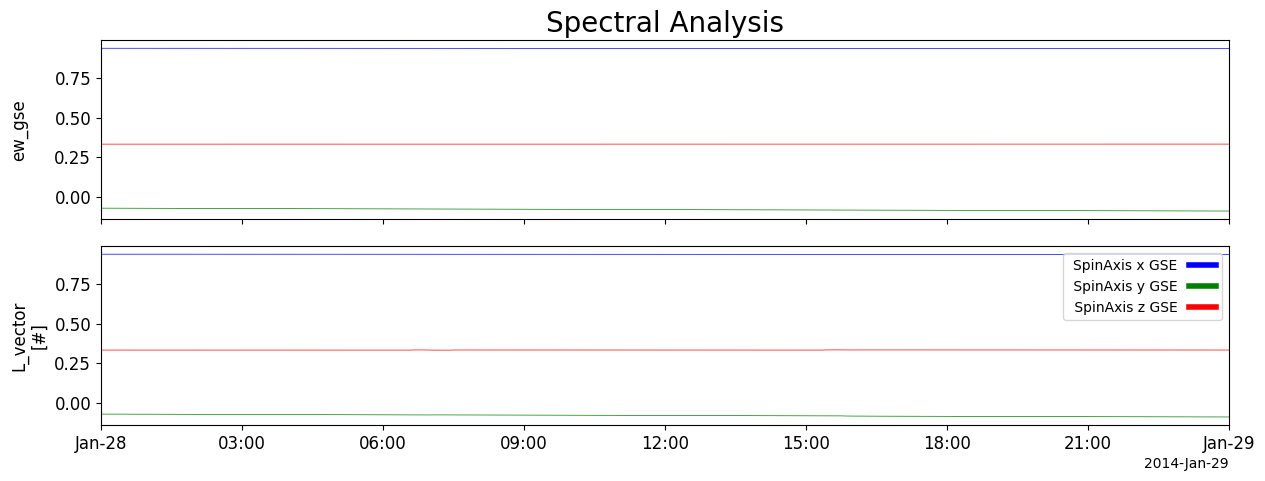

In [80]:
# w-antenna (spin-axis) direction
wgse      = np.zeros([2,3],dtype='float32')
pxform    = spice.pxform('RBSPa_SCIENCE','GSE',et[0])
wgse[0,:] = pxform[:,2]
pxform    = spice.pxform('RBSPa_SCIENCE','GSE',et[1])
wgse[1,:] = pxform[:,2]
# interpolation of wgse with the time labels of the EFW data
time_et = spice.str2et(time_string(time,fmt='%Y-%m-%dT%H:%M:%S.%f')) #should be ephemeris time
wx      = np.interp(time_et,et,wgse[:,0]) #numpy.interp(Xinterp, Xoriginal, Yoriginal)
wy      = np.interp(time_et,et,wgse[:,1])
wz      = np.interp(time_et,et,wgse[:,2])
wgse    = np.transpose(np.stack([wx,wy,wz]))
# creat tplot variable of direction of W-antenna
store_data('ew_gse',data={'x':time,'y':wgse})
# plot
timespan('2014-01-28',1)
tplot(['ew_gse','spinaxis_gse'])

You can find the result of calculation is identical to the tplot variable of `spinaxis_gse`.
Next calculation steps are like follows:
 1. Calculate the B-field in mGSE using `wgse`
 2. Calculate Ex(mGSE) assuming E$\cdot$B = 0 in mGSE and create E(mGSE) with three components
 3. Convert the E-field from mGSE to GSE using `wgse`
 
<span style='color: red;'>Because the EFW data loaded by PySPEDAS includes calculated the electric field `efield_in_corotation_frame_spinfit_edotb_mgse` with three components calculated from E$\cdot$B = 0, you can actually skip the steps 1 and 2.</span>

09-Mar-25 03:48:22: Bz/Bx is currently not in pytplot.
09-Mar-25 03:48:22: By/Bx is currently not in pytplot.


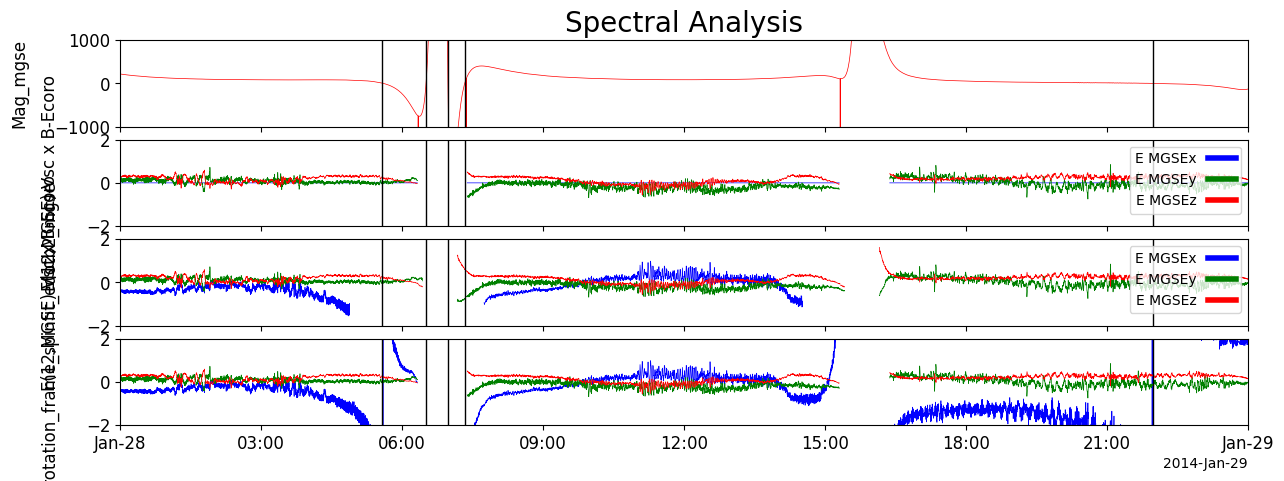

In [81]:
#preparing angles
p = np.arctan2(wy.astype(np.float64),wx)
cosp = np.cos(p)
sint = wx/cosp
sinp = wy/sint
cost = wz.astype(np.float64)
# conversion of the magnetic field from GSE to mGSE
vx1 =  cosp*mag.y[:,0] + sinp*mag.y[:,1]
vy1 = -sinp*mag.y[:,0] + cosp*mag.y[:,1]
vz1 =  mag.y[:,2]
vx2 =  sint*vx1 + cost*vz1
vy2 =  vy1
vz2 = -cost*vx1 + sint*vz1
#create tplot variable of B(mGSE)
store_data('Mag_mgse',data={'x':time,'y':np.transpose(np.stack([vx2,vy2,vz2]))})
pyspedas.split_vec('Mag_mgse')
# calculate Ex(mGSE) from E*B = 0
Ex = -1 * (ele.y[:,1]*vy2 + ele.y[:,2]*vz2)/vx2
y  = np.transpose(np.stack([Ex,ele.y[:,1],ele.y[:,2]]))
store_data('efield_in_corotation_frame_spinfit_edotb2_mgse',data={'x':time,'y':y})
yrange = [-2,2]
options('Mag_mgse_x','yrange',[-1000,1000])
options('Mag_mgse_x','color','red')
options('efield_in_corotation_frame_spinfit_mgse','yrange',yrange)
options('efield_in_corotation_frame_spinfit_edotb2_mgse','yrange',yrange)
options('efield_in_corotation_frame_spinfit_edotb_mgse','yrange',yrange)
options('Bz/Bx','yrange',[-4,4])
options('By/Bx','yrange',[-4,4])
timespan('2014-01-28/00:00:00',24,keyword='hours')
timebar('2014-01-28/05:35:00')
timebar('2014-01-28/06:31:00')
timebar('2014-01-28/06:58:00')
timebar('2014-01-28/07:20:00')
timebar('2014-01-28/21:59:00')
tplot(['Mag_mgse_x',
       'efield_in_corotation_frame_spinfit_mgse',
       'efield_in_corotation_frame_spinfit_edotb_mgse',
       'efield_in_corotation_frame_spinfit_edotb2_mgse'])

You may notice that the tplot variable `efield_in_corotation_frame_spinfit_edotb_mgse` is also the electric field with three components calculated from E$\cdot$B = 0. 

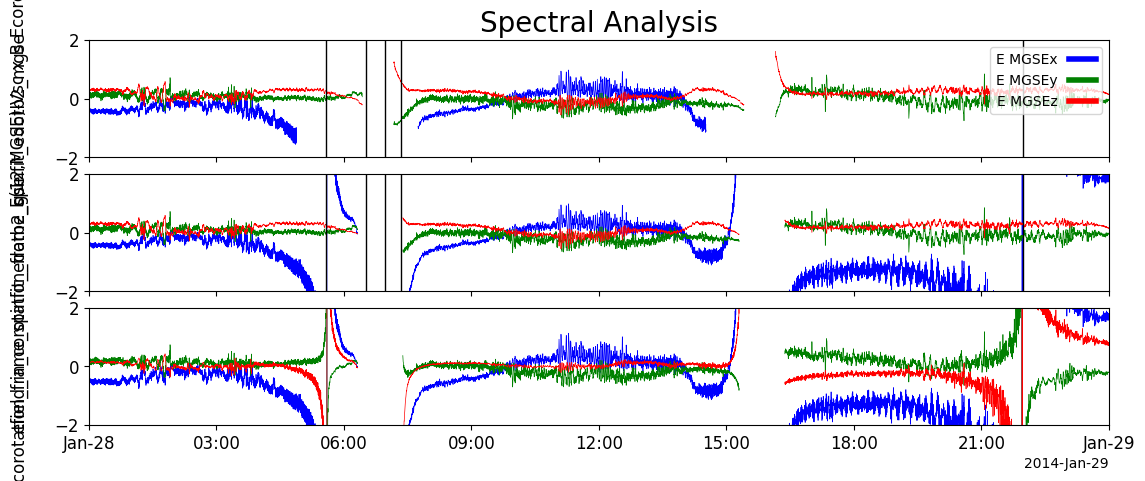

In [68]:
# Conversion of the electric field from mGSE to GSE
ele = get_data('efield_in_corotation_frame_spinfit_edotb2_mgse')
vx1 = sint*ele.y[:,0] - cost*ele.y[:,2]
vz1 = cost*ele.y[:,0] + sint*ele.y[:,2]
vy1 = ele.y[:,1]
vx2 = cosp*vx1 + sinp*vy1
vy2 = sinp*vx1 + cosp*vy1
vz2 = vz1
# create tplot variable of E(GSE)
store_data('efield_in_corotation_frame_spinfit_edotb2_gse',data={'x':time,'y':np.transpose(np.stack([vx2,vy2,vz2]))})
# plot
options('efield_in_corotation_frame_spinfit_edotb2_gse','yrange',[-2,2])
tplot(['efield_in_corotation_frame_spinfit_edotb_mgse',
       'efield_in_corotation_frame_spinfit_edotb2_mgse',
       'efield_in_corotation_frame_spinfit_edotb2_gse'])
#Because the apogee of RBSP-A is on the dayside in this period, the differene between mGSE and GSE is not so large...

### Plot with Pyplot interface

The example below shows an simple way to plot numpy ndarray using `matplotlib.pyplot`. Here we also use `Numpy`, which is a library for numerical computing and working with multi-dimensional arrays.

In [69]:
import matplotlib.pyplot as plt # short cut for matplotlib.pyplot
import numpy as np              # short cut for numpy

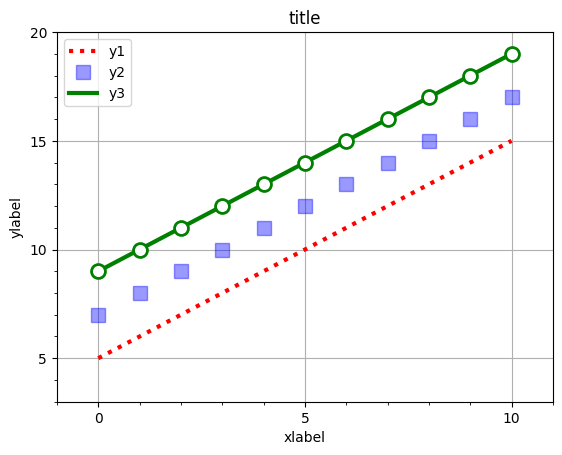

In [70]:
#----------------------------------------------------------
# create sample data with linspace function
x  = np.linspace(0,10,11) # 11 element array from 0 to 10 [0,1,2,...,10]
y1 = np.linspace(5,15,11) # 11 element array from 5 to 15 [5,6,7,...,15]
y2 = np.linspace(7,17,11) # 11 element array from 7 to 17 [7,8,9,...,17]
y3 = np.linspace(9,19,11) # 11 element array from 9 to 19 [9,10,11,...,19]

#----------------------------------------------------------
#solid line
#options --- label: text shown in legend, c: line color, lw: line width
plt.plot(x,y1,label='y1',c='red',lw=3,ls=':')

# scatter plot
# options --- input for marker: '.=point, 'o'=circle, 's'=square, 'D'=diamond, '^'=triangle, '*'=star, '+=plus, markersize: size of marker
plt.plot(x,y2,'s',label='y2',c='blue',markersize=10,alpha=0.4) #alpha: transparency

# white open circles on a solid line
# options --- markerfacecolor: color inside the marker, markeredgecolor: color at the edge of the marker, markeredgewidth: width of the edge
plt.plot(x,y3,label='y3',c='green',lw=3)
plt.plot(x,y3,'o',markersize=10,markerfacecolor='white',markeredgecolor='green',markeredgewidth=2)

#----------------------------------------------------------
# some other plot settings
plt.title('title')     # set the title at the top
plt.xlabel('xlabel')   # set the title of x-axis
plt.ylabel('ylabel')   # set the title of y-axis
plt.xlim(-1,11)        # set the plot range of x-axis
plt.ylim( 3,20)        # set the plot range of y-axis
plt.xticks([ 0, 5,10]) # set x and y tick values
plt.yticks([ 5,10,15,20])
plt.minorticks_on()    # set minor ticks
plt.grid()             # set x and y grids
plt.legend()           # set legend
plt.show()             # plot again

### Tips of Jupyter Notebook
 - **comment out all lines in a cell**<br>
    Select all lines and then `ctrl`+`\`